In [1]:
from astropy.io import fits
from astropy import units, constants
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import corner
from voigt_fit_lib import *
import os
import pickle

Load in the files

In [2]:
rootdir = '/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/'

First, the FUV files

In [3]:
spec_fits_fuv = fits.open(rootdir + 'FUV/PG1522+101_FUV_wavecal_new.fits')
lsf_fits_fuv = fits.open(rootdir + 'FUV/PG1522_COS_FUV_wavcal2022_lsf_ZQ.fits')

Then, the NUV files

In [4]:
spec_fits_nuv = fits.open(rootdir + 'G185M/PG1522+101_NUV_wavecal_new.fits')
lsf_fits_nuv = fits.open(rootdir + 'G185M/PG1522_COS_NUV_wavcal2022_lsf.fits')

Then, the STIS files

In [5]:
spec_fits_stis = fits.open(rootdir + 'STIS/PG1522+101_E230M_new.fits')
lsf_fits_stis = fits.open(rootdir + 'STIS/PG1522_STIS_NUV_wavcal2022_lsf.fits')

Finally, HIRES files

In [6]:
spec_fits_hires = fits.open(rootdir + 'HIRES/PG1522+101_HIRES.fits')
lsf_fits_hires = fits.open(rootdir + 'HIRES/PG1522_HIRES_wavcal2023_lsf.fits')

Compile a list of the spectra, continuum nodes, and IDs for all detectors

In [7]:
spec_fits_list = [spec_fits_fuv, spec_fits_nuv, spec_fits_stis, spec_fits_hires]
lsf_fits_list = [lsf_fits_fuv, lsf_fits_nuv, lsf_fits_stis, lsf_fits_hires]

Systemic redshift

In [8]:
z_sys = 1.09454462

# HI

## HI 1215 (STIS)

In [9]:
hi_1215_stis = ion_transition('HI', 1215, 'H', z_sys, 'STIS')

In [10]:
hi_1215_stis.grab_ion_transition_info()

In [11]:
hi_1215_stis.grab_ion_transition_spec(spec_fits_list, masks=[[120,300]])

In [12]:
hi_1215_stis.cont_norm_flux(v_abs_range=[-70,90], degree=1)

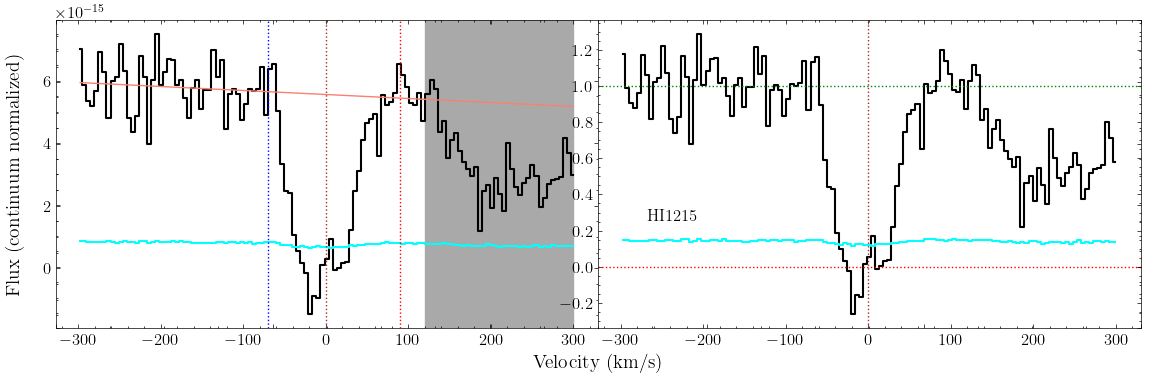

In [13]:
fig, axes = hi_1215_stis.plot_ion_transition_spec_cont()

In [14]:
hi_1215_stis.get_EW_total(-70,90)

Integration window: [-70, 90]
EW, 1sig: 359, 15
EW-3sig: 45


In [15]:
hi_1215_stis.grab_ion_transition_lsf(lsf_fits_list)

In [16]:
hi_1215_stis.init_ion_transition(init_values = np.array([[14,10, -20], [14,10, 8], [13.2,40,27]]), 
                             lsf_convolve = True)

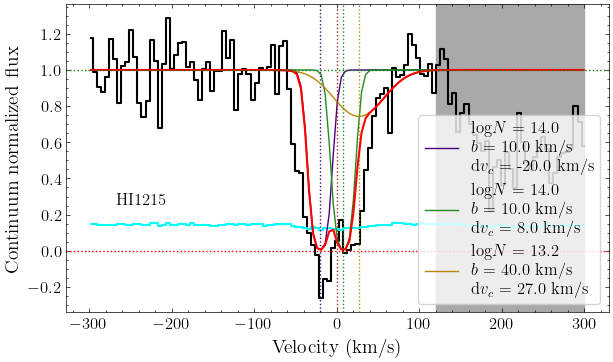

In [17]:
fig, ax = hi_1215_stis.plot_ion_transition_init_fit()

In [18]:
hi_1215_stis.fit_ion_transition()

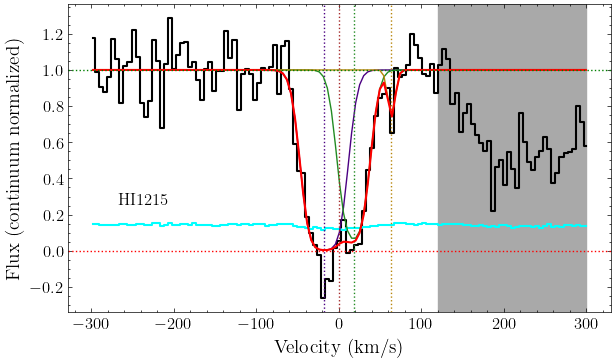

In [19]:
fig, ax = hi_1215_stis.plot_ion_transition_best_fit(legend=False)

## HI 1025 (STIS)

In [20]:
hi_1025_stis = ion_transition('HI', 1025, 'H', z_sys, 'STIS')

In [21]:
hi_1025_stis.grab_ion_transition_info()

In [22]:
hi_1025_stis.grab_ion_transition_spec(spec_fits_list)

In [23]:
hi_1025_stis.cont_norm_flux(v_abs_range=[-70,70], degree=1)

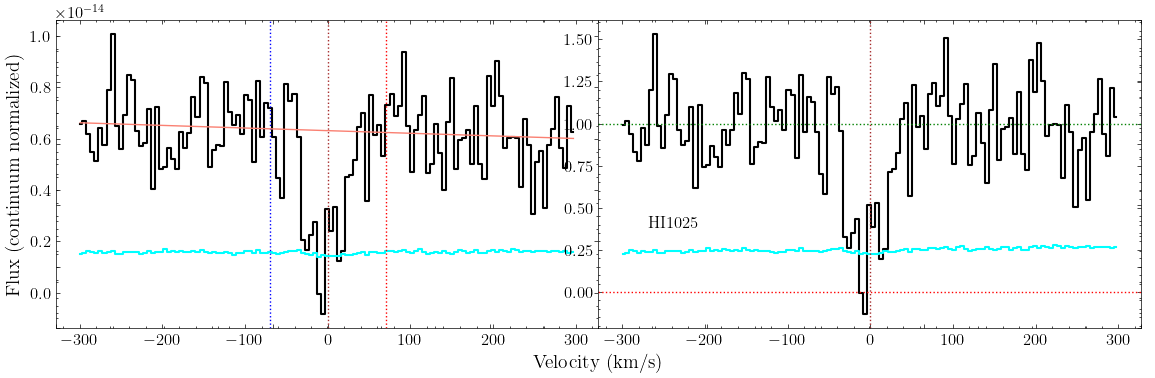

In [24]:
fig, axes = hi_1025_stis.plot_ion_transition_spec_cont()

In [25]:
hi_1025_stis.get_EW_total(-70,70)

Integration window: [-70, 70]
EW, 1sig: 145, 21
EW-3sig: 64


In [26]:
hi_1025_stis.grab_ion_transition_lsf(lsf_fits_list)

In [27]:
hi_1025_stis.init_ion_transition(init_values = np.array([[14.65,25, 0]]), 
                             lsf_convolve = True)

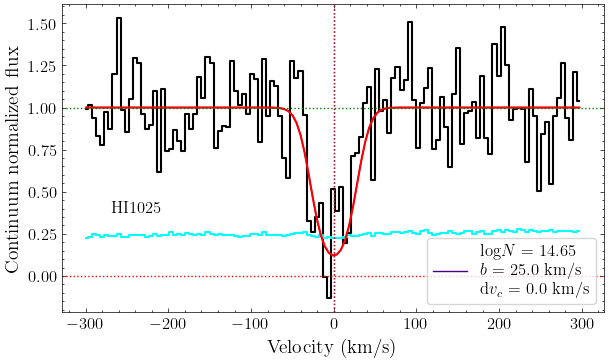

In [28]:
fig, ax = hi_1025_stis.plot_ion_transition_init_fit()

In [29]:
hi_1025_stis.fit_ion_transition()

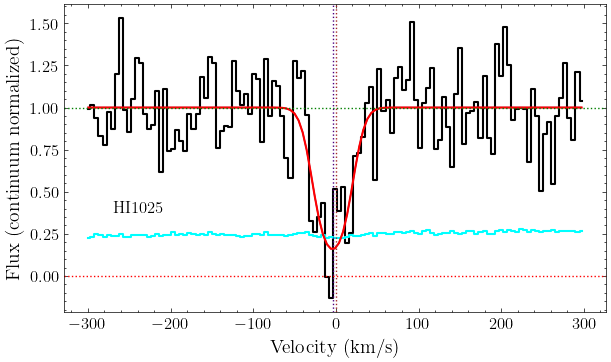

In [30]:
fig, ax = hi_1025_stis.plot_ion_transition_best_fit(legend=False)

## HI ion

In [31]:
hi = ion(z_sys, 'HI', [hi_1215_stis, hi_1025_stis])

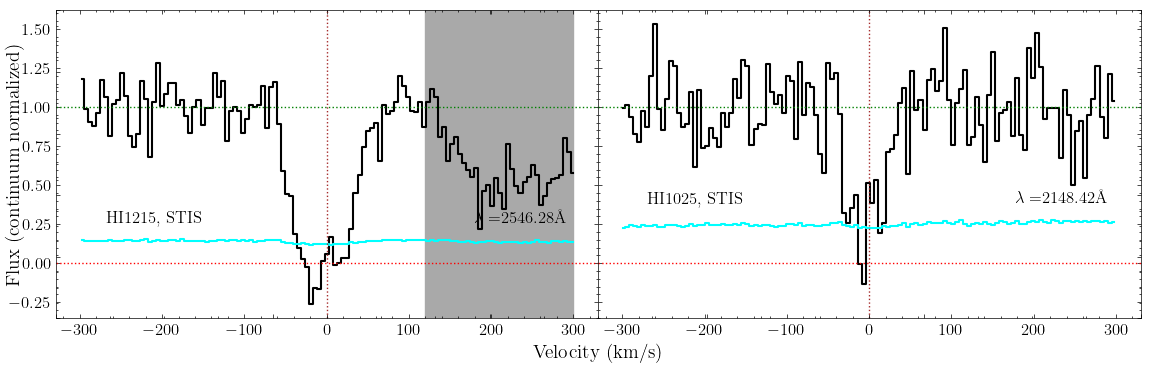

In [32]:
fig, axes = hi.plot_ion()

In [33]:
hi.init_ion([[[14,10, -20], [14,10, 20], [13,40,40]],
            [[14,10, -20], [14,10, 20], [13,40,40]]])

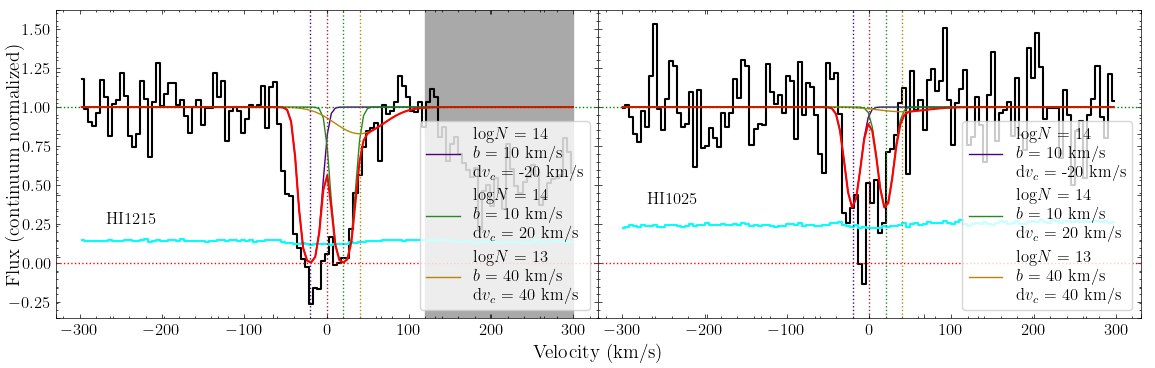

In [34]:
fig, axes = hi.plot_ion_init_fit()

In [35]:
hi.fit_ion(tie_params_list=[['it1c1_logN', 'it2c1_logN'], # Tie logN for c1
                            ['it1c1_b', 'it2c1_b'], # Tie b for c1
                            ['it1c1_dv_c', 'it2c1_dv_c'], # Tie dv_c for c1 
                            ['it1c2_logN', 'it2c2_logN'], # Tie logN for c1
                            ['it1c2_b', 'it2c2_b'], # Tie b for c1
                            ['it1c2_dv_c', 'it2c2_dv_c'], # Tie dv_c for c1 
                            ['it1c3_logN', 'it2c3_logN'], # Tie logN for c1
                            ['it1c3_b', 'it2c3_b'], # Tie b for c1
                            ['it1c3_dv_c', 'it2c3_dv_c'], # Tie dv_c for c1 
                           ],
          lower_bounds_dict = {'it1c3_b':20})

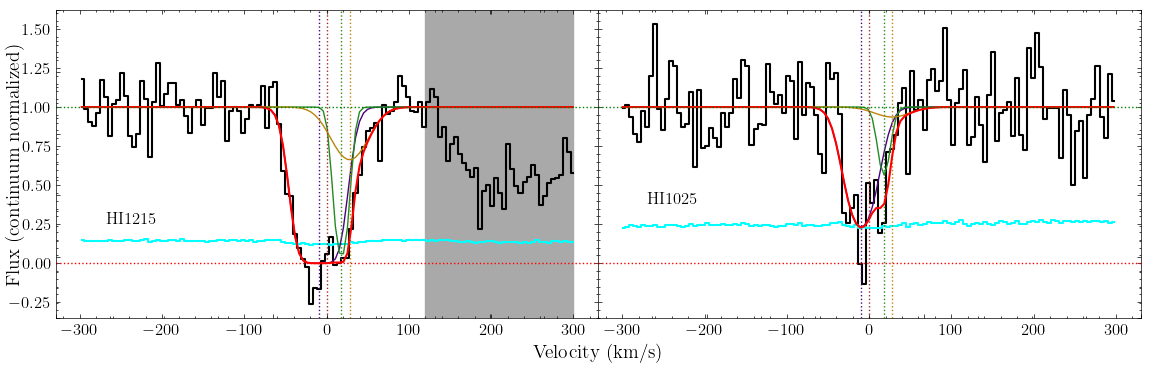

In [36]:
fig, axes = hi.plot_ion_best_fit(legend=False)

In [37]:
#hi.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-6, n_steps=8000)
#hi.fit_ion_emcee(load=True, loaddir=rootdir)

In [38]:
#fig, axes = hi.plot_samples()

In [39]:
#hi.plot_corner()

# CIII

## CIII 977 (STIS)

In [40]:
ciii_977_stis = ion_transition('CIII', 977, 'C', z_sys, 'STIS')

In [41]:
ciii_977_stis.grab_ion_transition_info()

In [42]:
ciii_977_stis.grab_ion_transition_spec(spec_fits_list)

In [43]:
ciii_977_stis.cont_norm_flux(v_abs_range=[-150,100], degree=1)

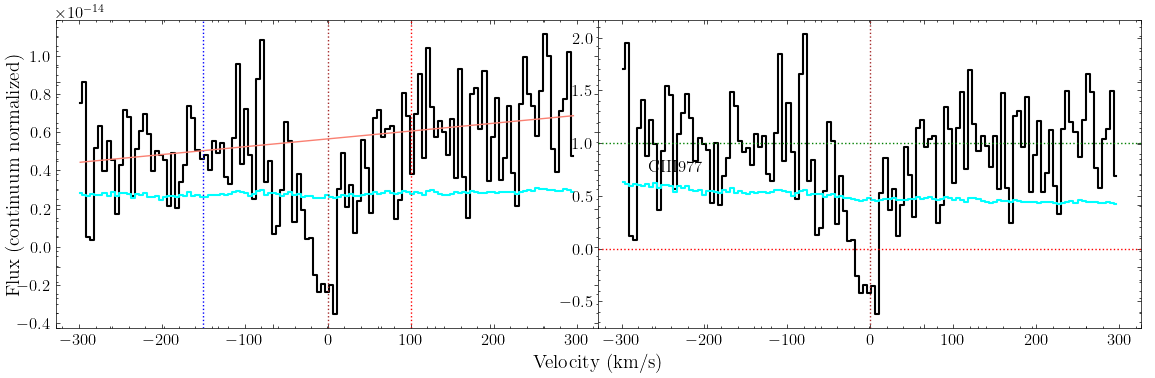

In [44]:
fig, ax = ciii_977_stis.plot_ion_transition_spec_cont()

In [45]:
ciii_977_stis.get_EW_total(-150,100)

Integration window: [-150, 100]
EW, 1sig: 282, 56
EW-3sig: 167


In [46]:
ciii_977_stis.grab_ion_transition_lsf(lsf_fits_list)

In [47]:
ciii_977_stis.init_ion_transition(init_values = np.array([[12.96, 17, 0]]), 
                             lsf_convolve = True)

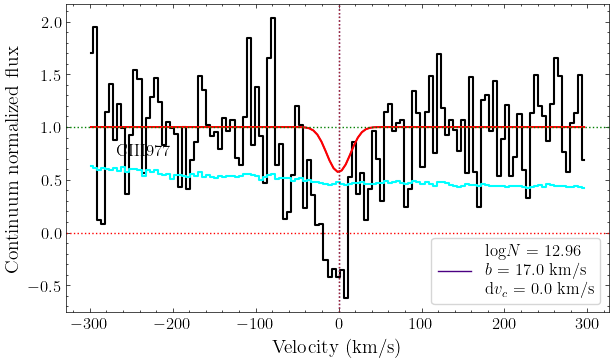

In [48]:
fig, ax = ciii_977_stis.plot_ion_transition_init_fit()

In [49]:
ciii_977_stis.fit_ion_transition()

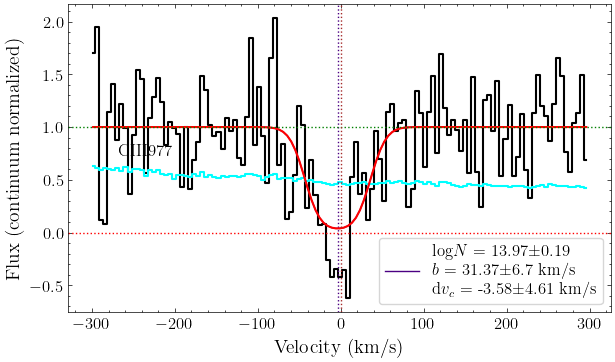

In [50]:
fig, ax = ciii_977_stis.plot_ion_transition_best_fit()

## CIII ion

In [51]:
ciii = ion(z_sys, 'CIII', [ciii_977_stis])

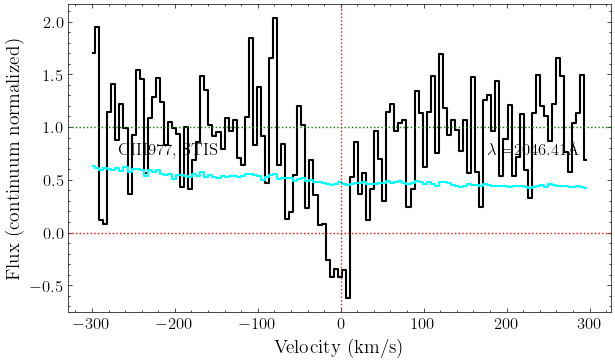

In [52]:
fig, axes = ciii.plot_ion()

In [53]:
ciii.init_ion([ciii_977_stis.best_values])
#ciii.init_ion(np.array([[13.03, 5, 0]]))

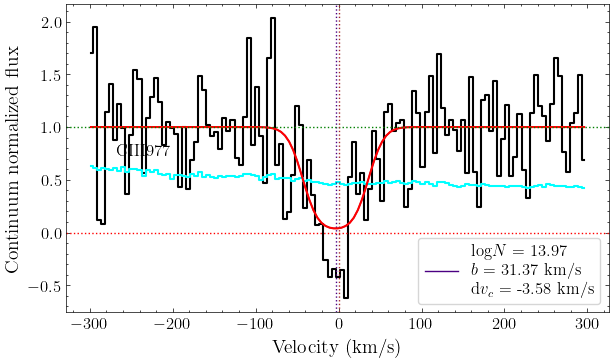

In [54]:
fig, axes = ciii.plot_ion_init_fit()

In [55]:
ciii.fit_ion()

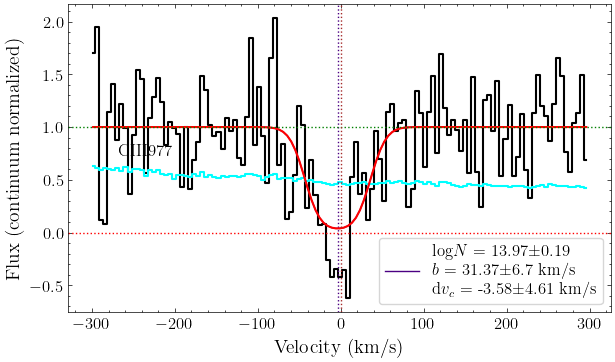

In [56]:
fig, axes = ciii.plot_ion_best_fit()

# CIV

## CIV 1548 (HIRES)

In [57]:
civ_1548_hires = ion_transition('CIV', 1548, 'C', z_sys, 'HIRES')

In [58]:
civ_1548_hires.grab_ion_transition_info()

In [59]:
civ_1548_hires.grab_ion_transition_spec(spec_fits_list)

In [60]:
civ_1548_hires.cont_norm_flux(v_abs_range=[-50,50], degree=1)

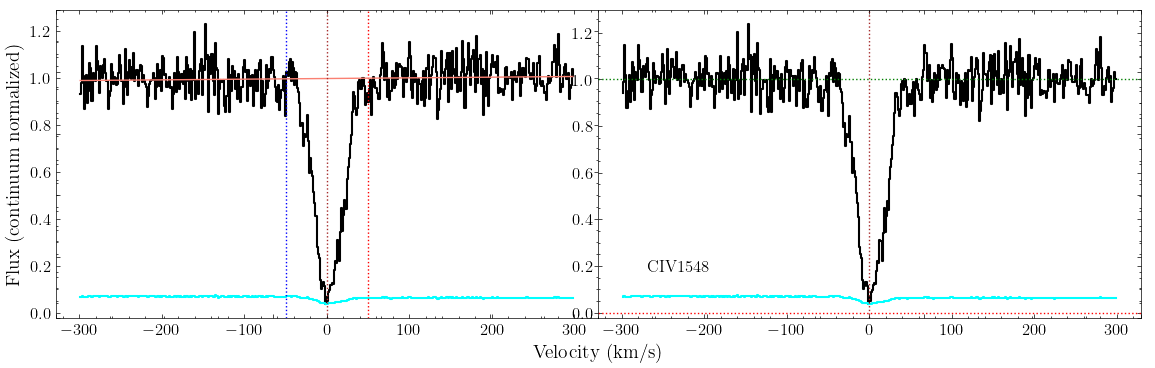

In [61]:
fig, ax = civ_1548_hires.plot_ion_transition_spec_cont()

In [62]:
civ_1548_hires.get_EW_total(-50,50)

Integration window: [-50, 50]
EW, 1sig: 199, 3
EW-3sig: 10


In [63]:
civ_1548_hires.grab_ion_transition_lsf(lsf_fits_list)

In [64]:
civ_1548_hires.init_ion_transition(init_values = np.array([[13.8, 18, 0], [13.5, 18, 15],]), 
                             lsf_convolve = True)

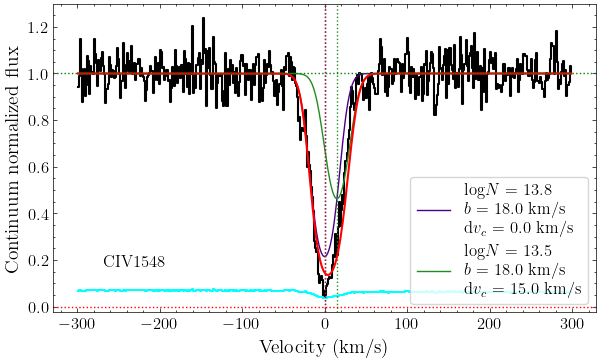

In [65]:
fig, ax = civ_1548_hires.plot_ion_transition_init_fit()

In [66]:
civ_1548_hires.fit_ion_transition()

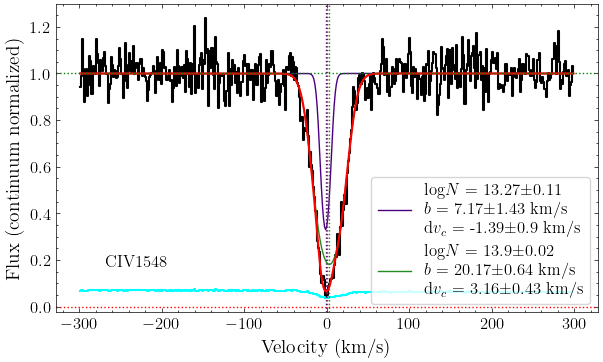

In [67]:
fig, ax = civ_1548_hires.plot_ion_transition_best_fit()

## CIV 1550 (HIRES)

In [68]:
civ_1550_hires = ion_transition('CIV', 1550, 'C', z_sys, 'HIRES')

In [69]:
civ_1550_hires.grab_ion_transition_info()

In [70]:
civ_1550_hires.grab_ion_transition_spec(spec_fits_list, v_range=[-300,300], masks=[[-300,-280]])

In [71]:
civ_1550_hires.cont_norm_flux(v_abs_range=[-40,55], degree=1)

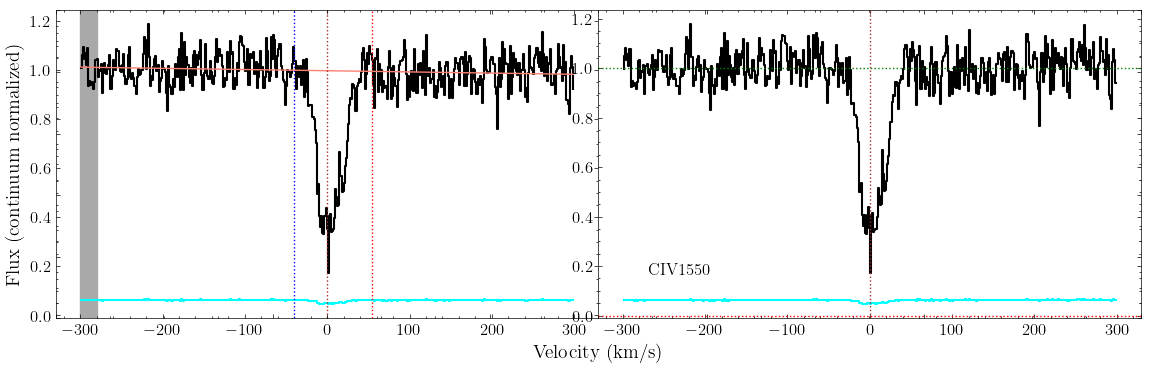

In [72]:
fig, ax = civ_1550_hires.plot_ion_transition_spec_cont()

In [73]:
civ_1550_hires.get_EW_total(-40,55)

Integration window: [-40, 55]
EW, 1sig: 123, 3
EW-3sig: 10


In [74]:
civ_1550_hires.grab_ion_transition_lsf(lsf_fits_list)

In [75]:
civ_1550_hires.init_ion_transition(init_values = np.array([[13.91, 18, 0],[13.5, 25, 10]]), 
                             lsf_convolve = True)

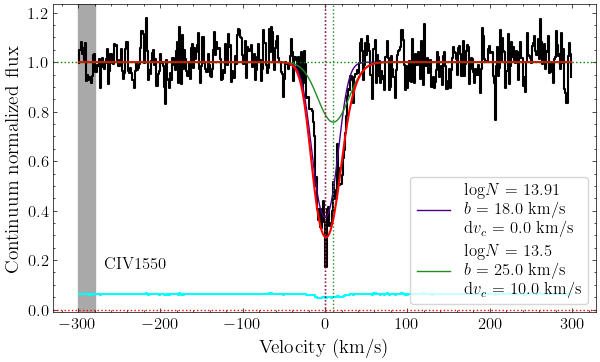

In [76]:
fig, ax = civ_1550_hires.plot_ion_transition_init_fit()

In [77]:
civ_1550_hires.fit_ion_transition()

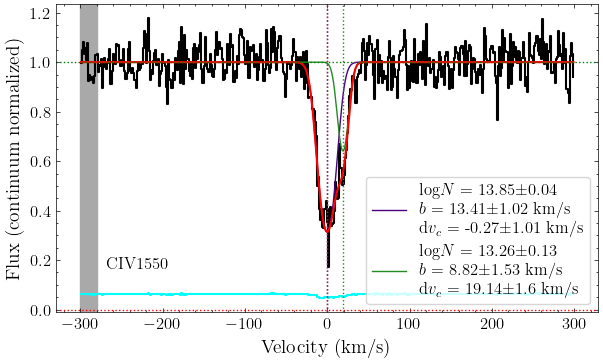

In [78]:
fig, ax = civ_1550_hires.plot_ion_transition_best_fit()

## CIV ion

In [79]:
civ = ion(z_sys, 'CIV', [civ_1548_hires, civ_1550_hires])

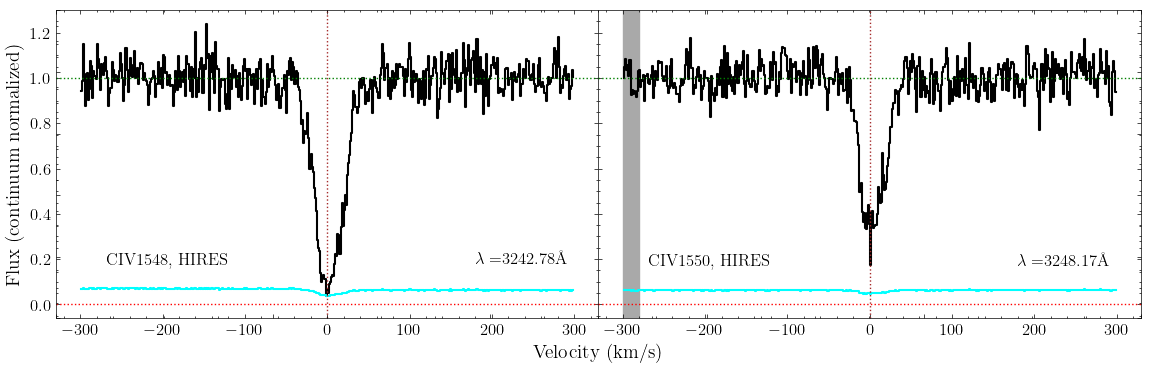

In [80]:
fig, axes = civ.plot_ion()

In [81]:
civ.init_ion([civ_1550_hires.best_values, civ_1550_hires.best_values])

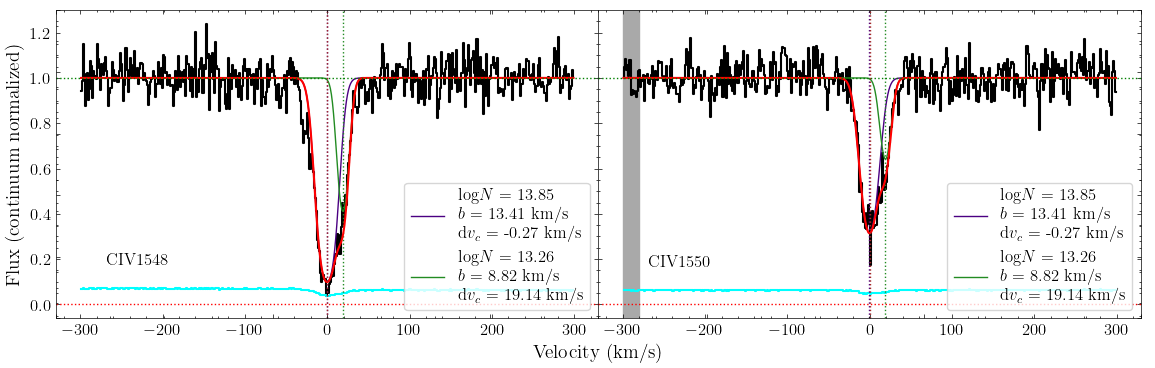

In [82]:
fig, axes = civ.plot_ion_init_fit()

In [83]:
civ.fit_ion(tie_params_list = [['it1c1_logN', 'it2c1_logN'],
                               ['it1c1_b', 'it2c1_b'],
                               ['it1c1_dv_c', 'it2c1_dv_c'],
                              ['it1c2_logN', 'it2c2_logN'],
                               ['it1c2_b', 'it2c2_b'],
                               ['it1c2_dv_c', 'it2c2_dv_c']
                              ])

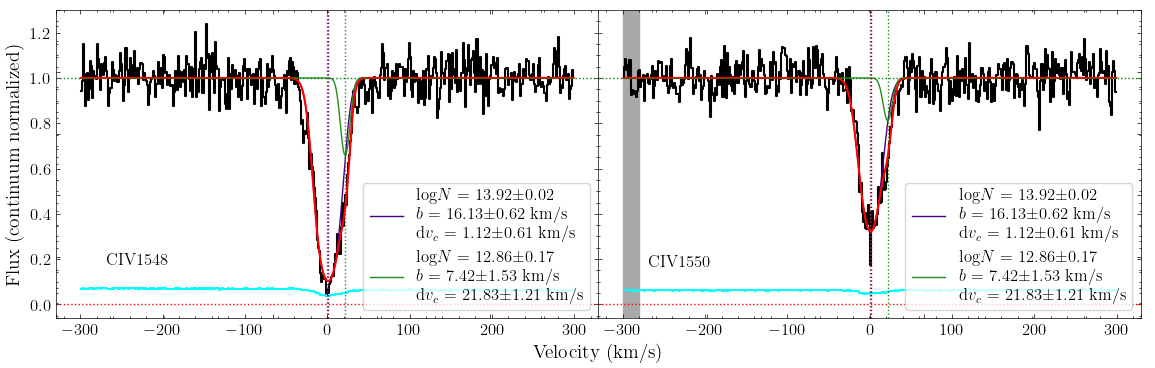

In [84]:
fig, axes = civ.plot_ion_best_fit()

In [85]:
#civ.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-7, n_steps=8000)
#civ.fit_ion_emcee(load=True, loaddir=rootdir)

In [86]:
#fig, axes = civ.plot_samples()

In [87]:
#civ.plot_corner()

# NIV

## NIV 765
Get NIV 765 from COS FUV

In [88]:
niv_765_fuv = ion_transition('NIV', 765, 'N', z_sys, 'FUV')

In [89]:
niv_765_fuv.grab_ion_transition_info()

In [90]:
niv_765_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-195],[195,300]])

In [91]:
niv_765_fuv.cont_norm_flux(v_abs_range=[-60,60], degree=1)

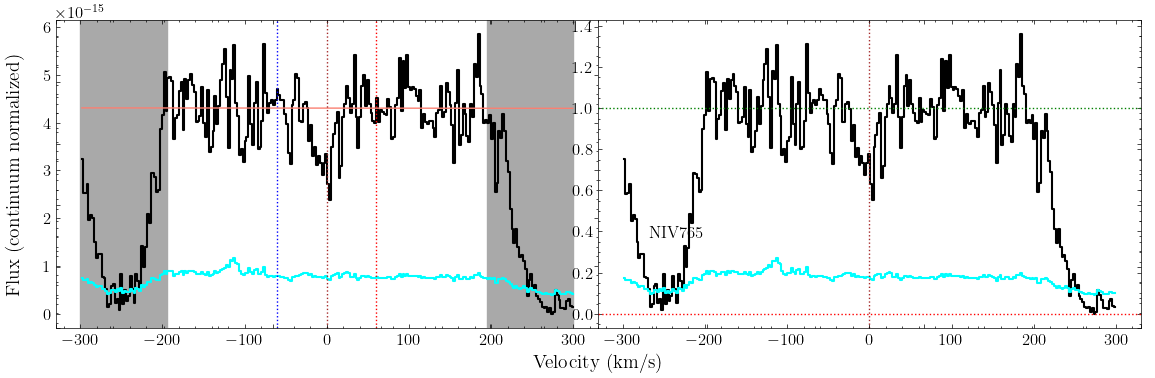

In [92]:
fig, ax = niv_765_fuv.plot_ion_transition_spec_cont()

In [93]:
niv_765_fuv.get_EW_total(-60,60)

Integration window: [-60, 60]
EW, 1sig: 22, 8
EW-3sig: 23


In [94]:
niv_765_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [95]:
niv_765_fuv.init_ion_transition(init_values = np.array([[12.96, 17, 0]]), 
                             lsf_convolve = True)

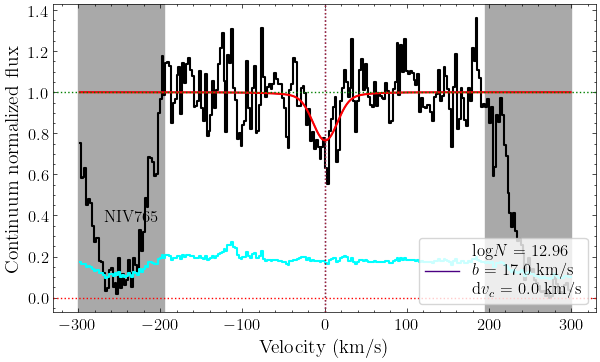

In [96]:
fig, ax = niv_765_fuv.plot_ion_transition_init_fit()

In [97]:
niv_765_fuv.fit_ion_transition()

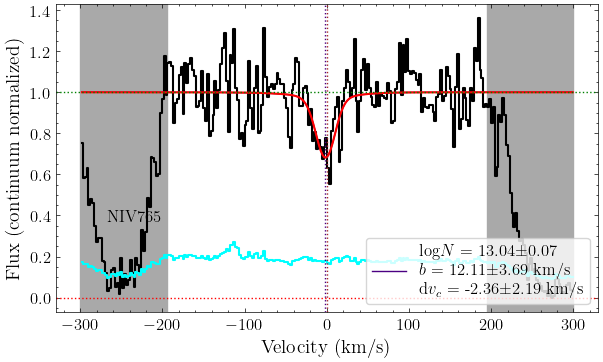

In [98]:
fig, ax = niv_765_fuv.plot_ion_transition_best_fit()

## NIV ion
Now compile the NIV ion

In [99]:
niv = ion(z_sys, 'NIV', [niv_765_fuv])

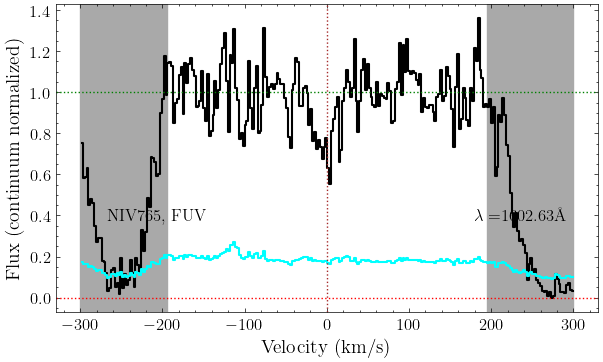

In [100]:
fig, axes = niv.plot_ion()

In [101]:
niv.init_ion([niv_765_fuv.best_values])
#niv.init_ion(np.array([[13.03, 5, 0]]))

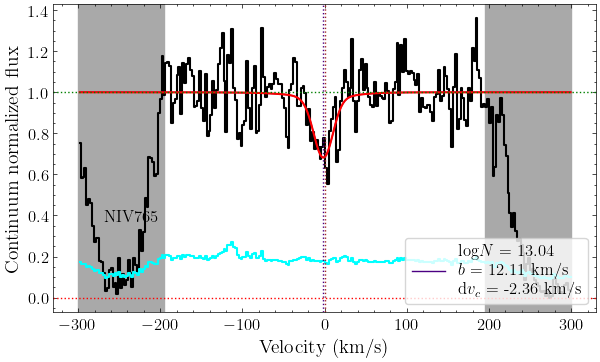

In [102]:
fig, axes = niv.plot_ion_init_fit()

In [103]:
niv.fit_ion(lower_bounds_dict={('it1c1_logN'):12.,('it1c1_b'):5.,('it1c1_dv_c'):-20.},
            upper_bounds_dict={('it1c1_logN'):13.3,('it1c1_b'):40.,('it1c1_dv_c'):25.})

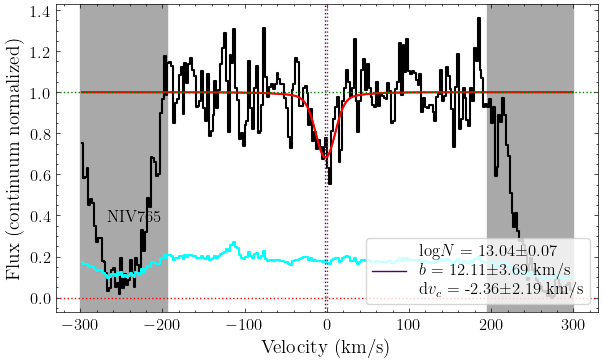

In [104]:
fig, axes = niv.plot_ion_best_fit()

In [105]:
#niv.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-8, n_steps=6000)
#niv.fit_ion_emcee(load=True, loaddir=rootdir)

In [106]:
#fig, axes = niv.plot_samples()

In [107]:
#niv.plot_corner()

# OIII

## OIII 702
Get OIII 702 from COS FUV

In [108]:
oiii_702_fuv = ion_transition('OIII', 702, 'O', z_sys, 'FUV')

In [109]:
oiii_702_fuv.grab_ion_transition_info()

In [110]:
oiii_702_fuv.grab_ion_transition_spec(spec_fits_list)

In [111]:
oiii_702_fuv.cont_norm_flux(v_abs_range=[-55,55], degree=1)

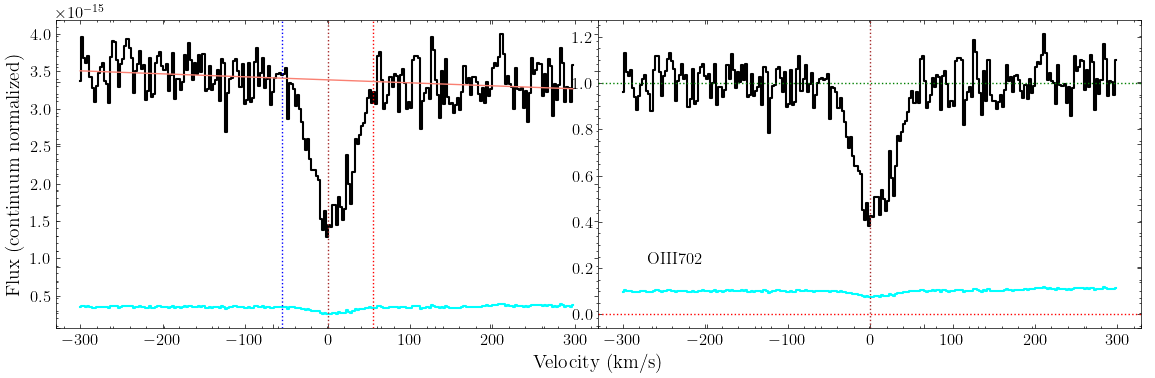

In [112]:
fig, ax = oiii_702_fuv.plot_ion_transition_spec_cont()

In [113]:
oiii_702_fuv.get_EW_total(-55,55)

Integration window: [-55, 55]
EW, 1sig: 76, 3
EW-3sig: 10


In [114]:
oiii_702_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [115]:
oiii_702_fuv.init_ion_transition(init_values = np.array([[14.23, 18, 0], [14.23, 18, 20]]), 
                             lsf_convolve = True)

#oiii_702_fuv.init_multi_voigt(init_values = np.array([[14.2, 12, 0]]), 
#                             lsf_convolve = True)

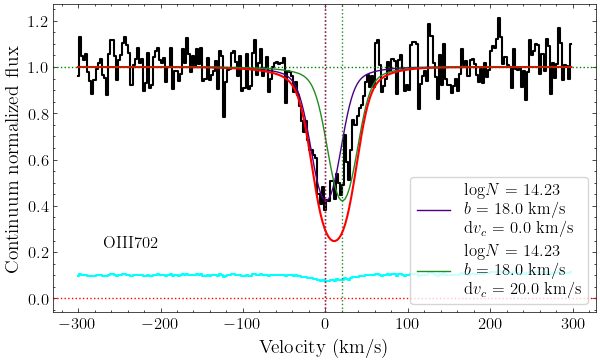

In [116]:
fig, ax = oiii_702_fuv.plot_ion_transition_init_fit()

In [117]:
oiii_702_fuv.fit_ion_transition()

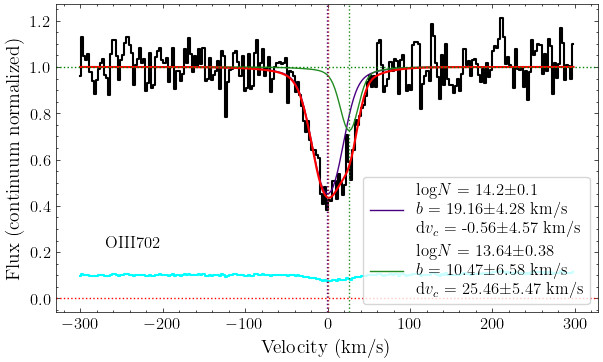

In [118]:
fig, ax = oiii_702_fuv.plot_ion_transition_best_fit()

## OIII 832
Get OIII 832 from COS FUV

In [119]:
oiii_832_fuv = ion_transition('OIII', 832, 'O', z_sys, 'FUV')

In [120]:
oiii_832_fuv.grab_ion_transition_info()

In [121]:
oiii_832_fuv.grab_ion_transition_spec(spec_fits_list)

In [122]:
oiii_832_fuv.cont_norm_flux(v_abs_range=[-65,65], degree=2)

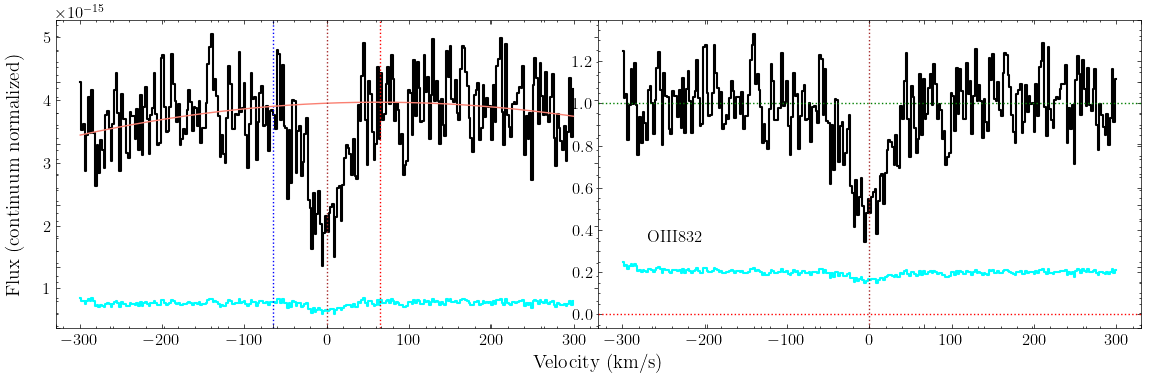

In [123]:
fig, ax = oiii_832_fuv.plot_ion_transition_spec_cont()

In [124]:
oiii_832_fuv.get_EW_total(-65,65)

Integration window: [-65, 65]
EW, 1sig: 78, 8
EW-3sig: 25


In [125]:
oiii_832_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [126]:
oiii_832_fuv.init_ion_transition(init_values = oiii_702_fuv.best_values, 
                             lsf_convolve = True)

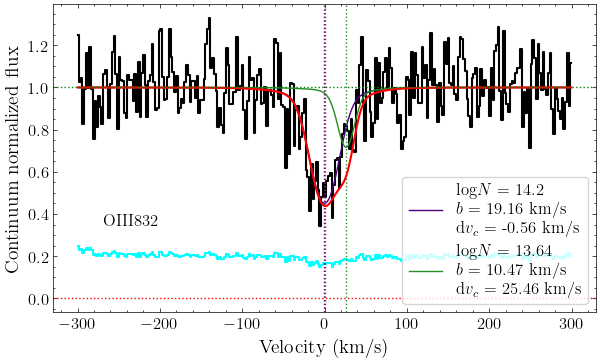

In [127]:
fig, ax = oiii_832_fuv.plot_ion_transition_init_fit()

In [128]:
oiii_832_fuv.fit_ion_transition()

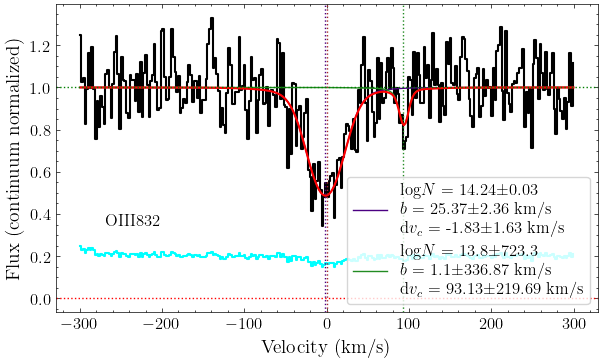

In [129]:
fig, ax = oiii_832_fuv.plot_ion_transition_best_fit()

## OIII ion

In [130]:
oiii = ion(z_sys, 'OIII', [oiii_702_fuv, oiii_832_fuv])

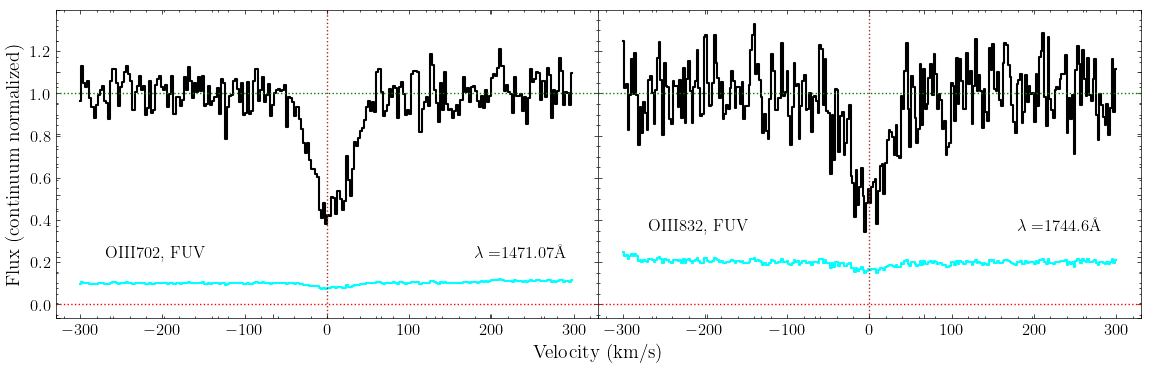

In [131]:
fig, axes = oiii.plot_ion()

In [132]:
oiii.init_ion([oiii_702_fuv.best_values, oiii_702_fuv.best_values])

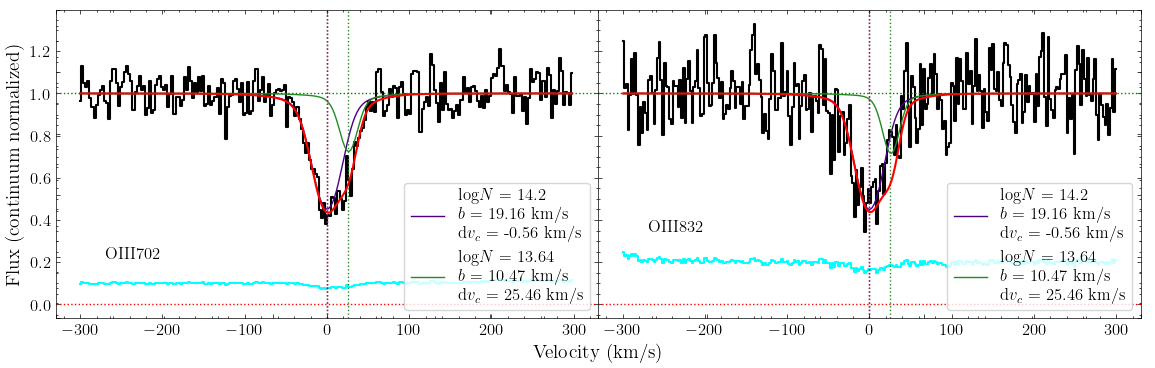

In [133]:
fig, axes = oiii.plot_ion_init_fit()

In [134]:
oiii.fit_ion(tie_params_list = [['it1c1_logN', 'it2c1_logN'],
                                ['it1c1_b', 'it2c1_b'],
                                ['it1c1_dv_c', 'it2c1_dv_c'],
                               ['it1c2_logN', 'it2c2_logN'],
                                ['it1c2_b', 'it2c2_b'],
                                ['it1c2_dv_c', 'it2c2_dv_c']])

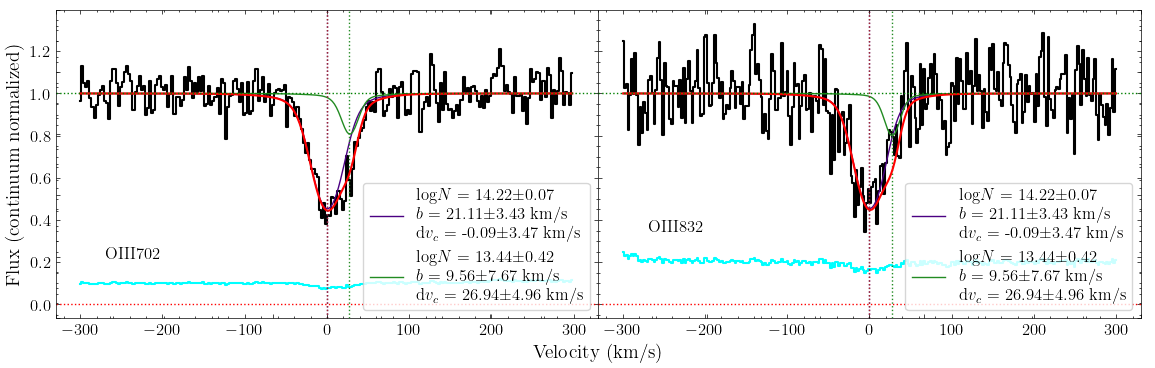

In [135]:
fig, axes = oiii.plot_ion_best_fit()

In [136]:
#oiii.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-7, n_steps=6000)
#oiii.fit_ion_emcee(load=True, loaddir=rootdir)

In [137]:
#fig, axes = oiii.plot_samples()

In [138]:
#oiii.plot_corner()

# OIV

## OIV 553

Begin with OIV 553 in COS FUV

In [139]:
oiv_553_fuv = ion_transition('OIV', 553, 'O', z_sys, 'FUV')

In [140]:
oiv_553_fuv.grab_ion_transition_info()

In [141]:
oiv_553_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-150]])

In [142]:
oiv_553_fuv.cont_norm_flux(v_abs_range=[-90,70], degree=1)

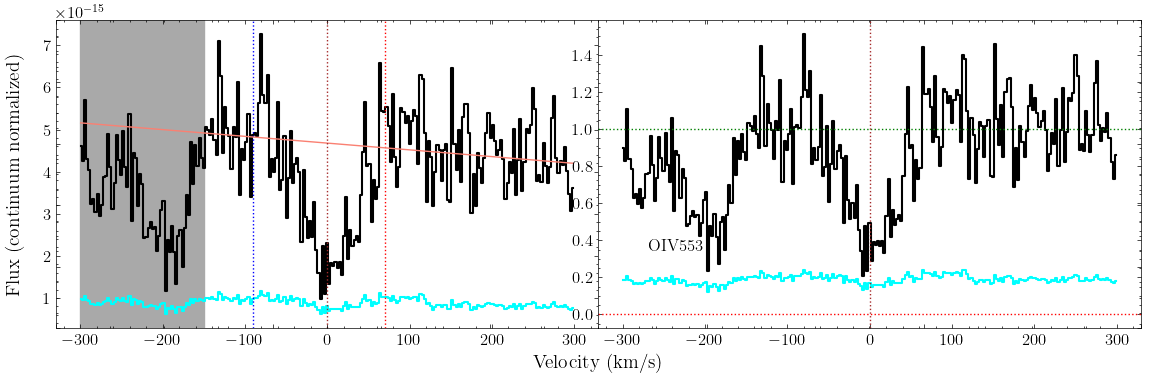

In [143]:
fig, ax = oiv_553_fuv.plot_ion_transition_spec_cont()

In [144]:
oiv_553_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [145]:
oiv_553_fuv.init_ion_transition(init_values = np.array([[14.69, 13, 0], [14, 9, 20]]), 
                             lsf_convolve = True)

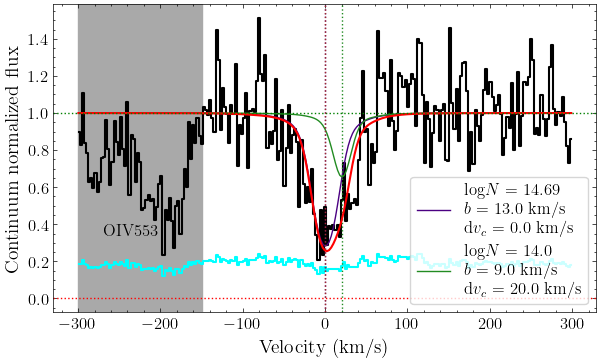

In [146]:
fig, ax = oiv_553_fuv.plot_ion_transition_init_fit()

In [147]:
oiv_553_fuv.fit_ion_transition()

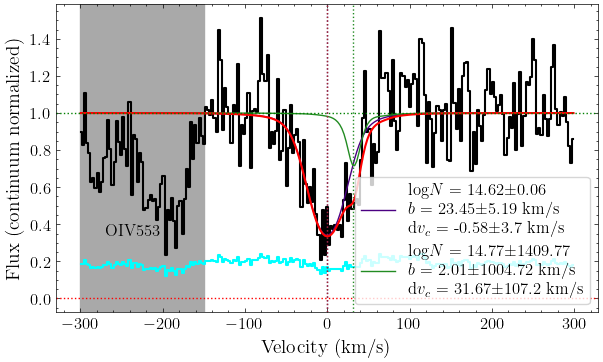

In [148]:
fig, ax = oiv_553_fuv.plot_ion_transition_best_fit()

## OIV 554

Next, do OIV 554 in COS FUV

In [149]:
oiv_554_fuv = ion_transition('OIV', 554, 'O', z_sys, 'FUV')

In [150]:
oiv_554_fuv.grab_ion_transition_info()

In [151]:
oiv_554_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[180,290]])

In [152]:
oiv_554_fuv.cont_norm_flux(v_abs_range=[-70,55], degree=1)

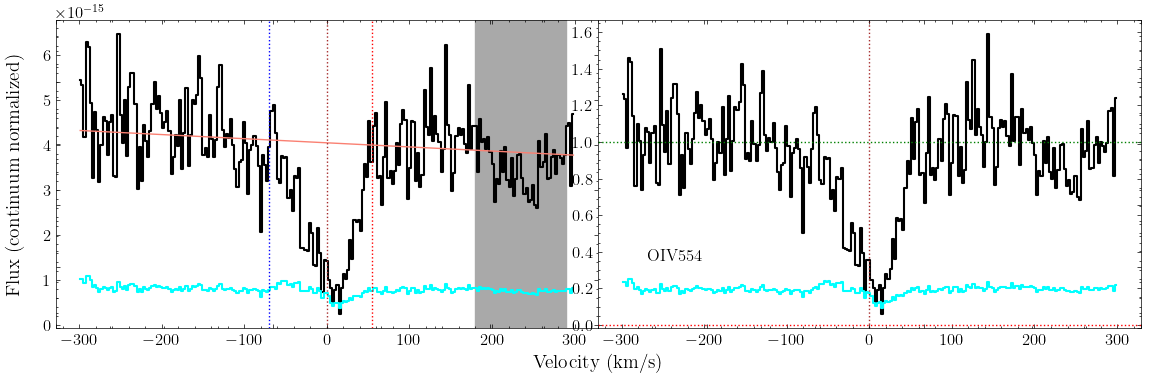

In [153]:
fig, ax = oiv_554_fuv.plot_ion_transition_spec_cont()

In [154]:
oiv_554_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [155]:
oiv_554_fuv.init_ion_transition(init_values = [[14.1, 25, -20],[18, 3, 6]], 
                             lsf_convolve = True)

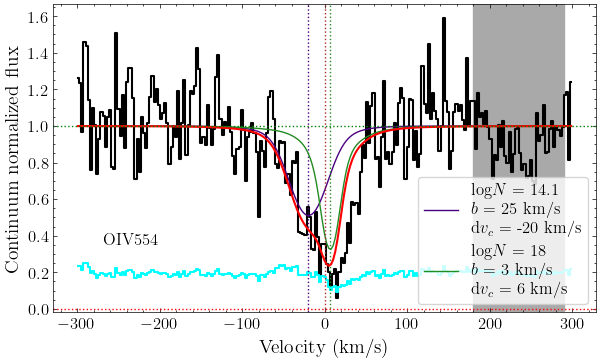

In [156]:
fig, ax = oiv_554_fuv.plot_ion_transition_init_fit()

In [157]:
oiv_554_fuv.fit_ion_transition()

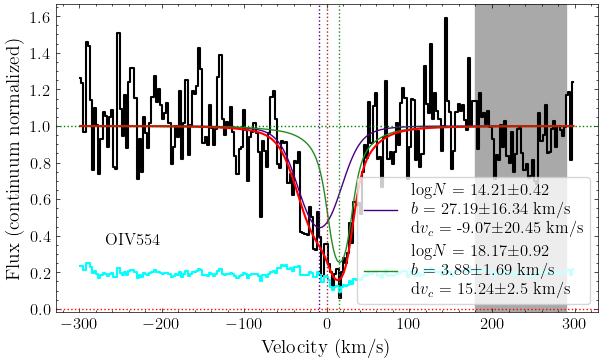

In [158]:
fig, ax = oiv_554_fuv.plot_ion_transition_best_fit()

## OIV 608

Next, OIV 608

In [159]:
oiv_608_fuv = ion_transition('OIV', 608, 'O', z_sys, 'FUV')

In [160]:
oiv_608_fuv.grab_ion_transition_info()

In [161]:
oiv_608_fuv.grab_ion_transition_spec(spec_fits_list)

In [162]:
oiv_608_fuv.cont_norm_flux(v_abs_range=[-50,50], degree=1)

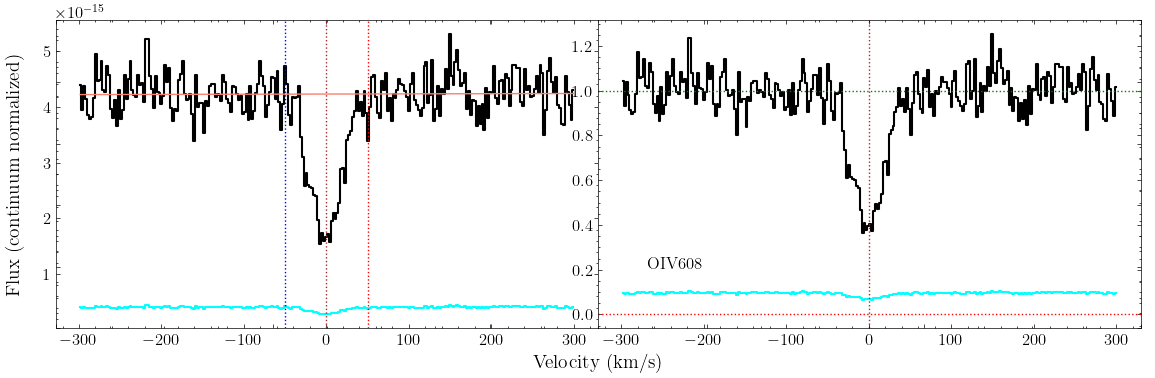

In [163]:
fig, ax = oiv_608_fuv.plot_ion_transition_spec_cont()

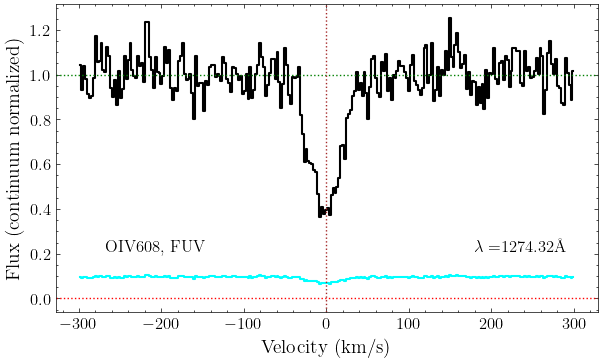

In [164]:
fig, ax = oiv_608_fuv.plot_ion_transition_spec()

In [165]:
oiv_608_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [166]:
oiv_608_fuv.init_ion_transition(init_values = oiv_554_fuv.best_values, 
                             lsf_convolve = True)

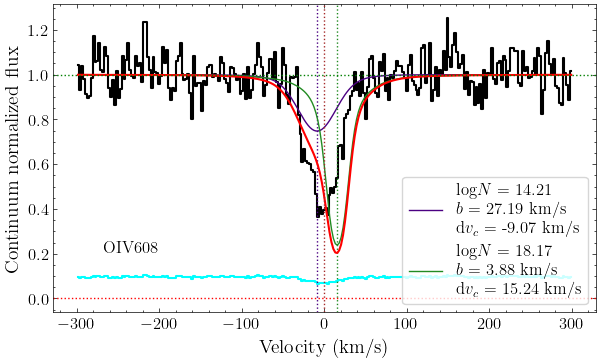

In [167]:
fig, ax = oiv_608_fuv.plot_ion_transition_init_fit()

In [168]:
oiv_608_fuv.fit_ion_transition()

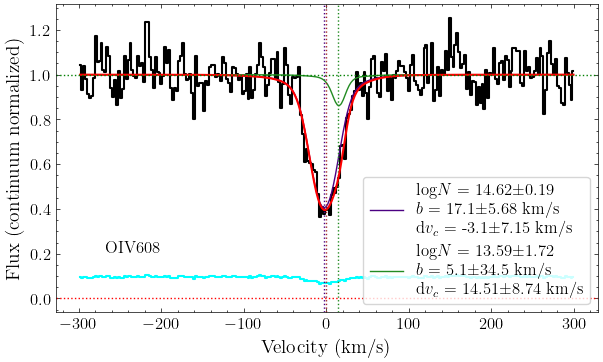

In [169]:
fig, ax = oiv_608_fuv.plot_ion_transition_best_fit()

## OIV 787

Finally, OIV 787

In [170]:
oiv_787_fuv = ion_transition('OIV', 787, 'O', z_sys, 'FUV')

In [171]:
oiv_787_fuv.grab_ion_transition_info()

In [172]:
oiv_787_fuv.grab_ion_transition_spec(spec_fits_list)

In [173]:
oiv_787_fuv.cont_norm_flux(v_abs_range=[-55,80], degree=1)

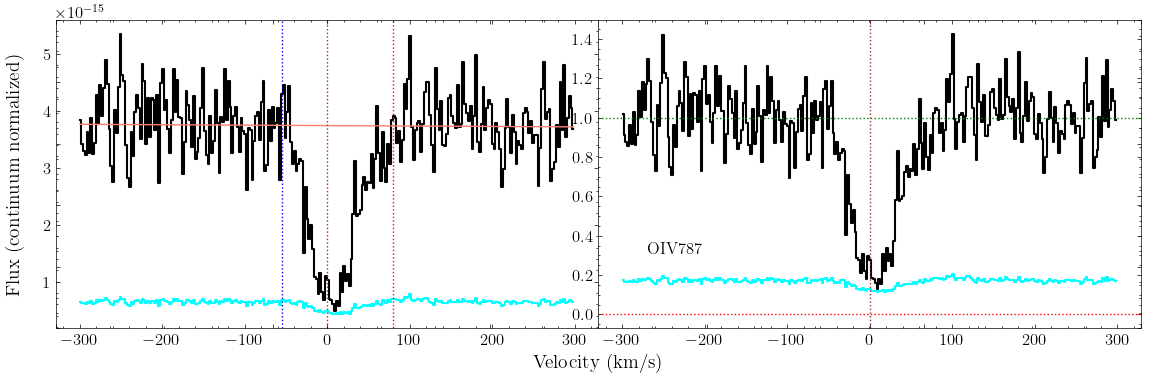

In [174]:
fig, ax = oiv_787_fuv.plot_ion_transition_spec_cont()

In [175]:
oiv_787_fuv.get_EW_total(-55,80)

Integration window: [-55, 80]
EW, 1sig: 141, 7
EW-3sig: 20


In [176]:
oiv_787_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [177]:
oiv_787_fuv.init_ion_transition(init_values = [[14.81, 16.6, 0], [13.86, 13, -15]], 
                             lsf_convolve = True)

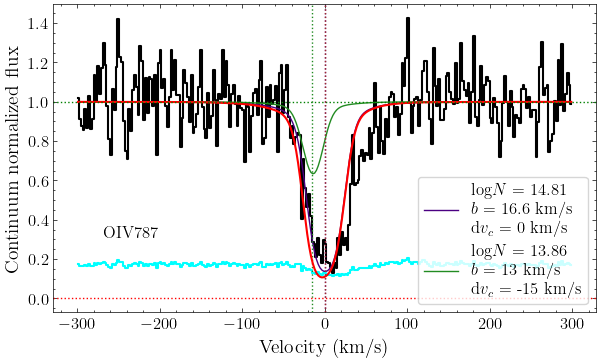

In [178]:
fig, ax = oiv_787_fuv.plot_ion_transition_init_fit()

In [179]:
oiv_787_fuv.fit_ion_transition()

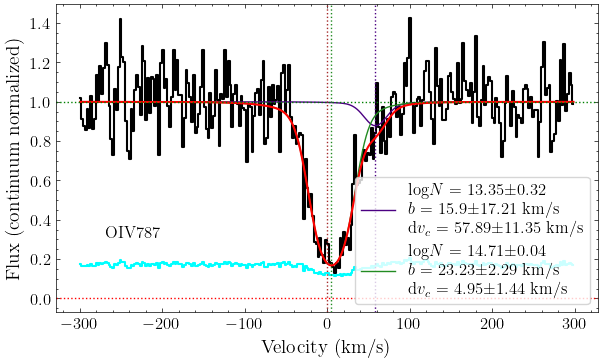

In [180]:
fig, ax = oiv_787_fuv.plot_ion_transition_best_fit()

## OIV ion

Compile the OIV ion

In [181]:
oiv = ion(z_sys, 'OIV', [oiv_787_fuv])

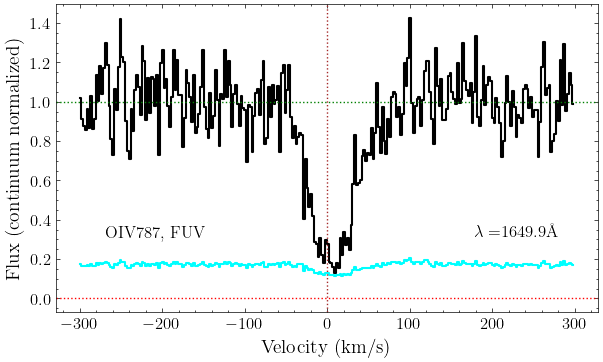

In [182]:
fig, axes = oiv.plot_ion()

In [183]:
oiv.init_ion([[[14.71,20,0],[14.20,10,20]]],
              #[[14.71,20,0],[14.20,10,20]],],
            )

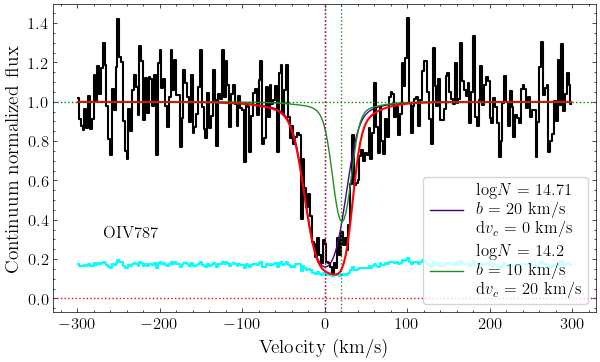

In [184]:
fig, axes = oiv.plot_ion_init_fit(n_cols=2)

In [185]:
oiv.fit_ion()

#oiv.fit_ion(tie_params_list = [['it1c1_logN', 'it2c1_logN'],
#                               ['it1c1_b', 'it2c1_b'],
#                               ['it1c1_dv_c', 'it2c1_dv_c'],
#                               ['it1c2_logN', 'it2c2_logN'],
#                               ['it1c2_b', 'it2c2_b'],
#                               ['it1c2_dv_c', 'it2c2_dv_c']
#                              ])

#oiv.fit_ion(lower_bounds_shared = {(0,0):13.5, (0,1):12, (0,2):-40,
#                                   (1,0):13.9, (1,1):5, (1,2):-10},
#           upper_bounds_shared = {(0,0):14.25, (0,1):37, (0,2):-15,
#                                   (1,0):14.5, (1,1):25, (1,2):10})#

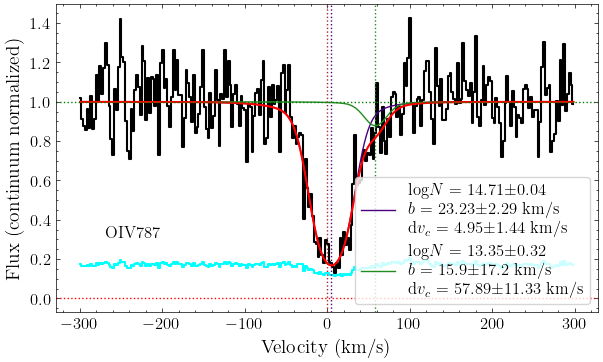

In [186]:
fig, axes = oiv.plot_ion_best_fit(n_cols=2)

In [187]:
#oiv.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-8, n_steps=6000)
#oiv.fit_ion_emcee(load=True, loaddir=rootdir)

In [188]:
#fig, axes = oiv.plot_samples()

In [189]:
#oiv.plot_corner()

# HI + CIII + CIV + NIV + OIII + OIV ($T, b_{NT}$)

In [190]:
hi_ciii_civ_niv_oiii_oiv_TNT = ion_suite(z_sys, 'HI+CIII+CIV+NIV+OIII+OIV-TNT', [hi, ciii, civ, niv, oiii, oiv])

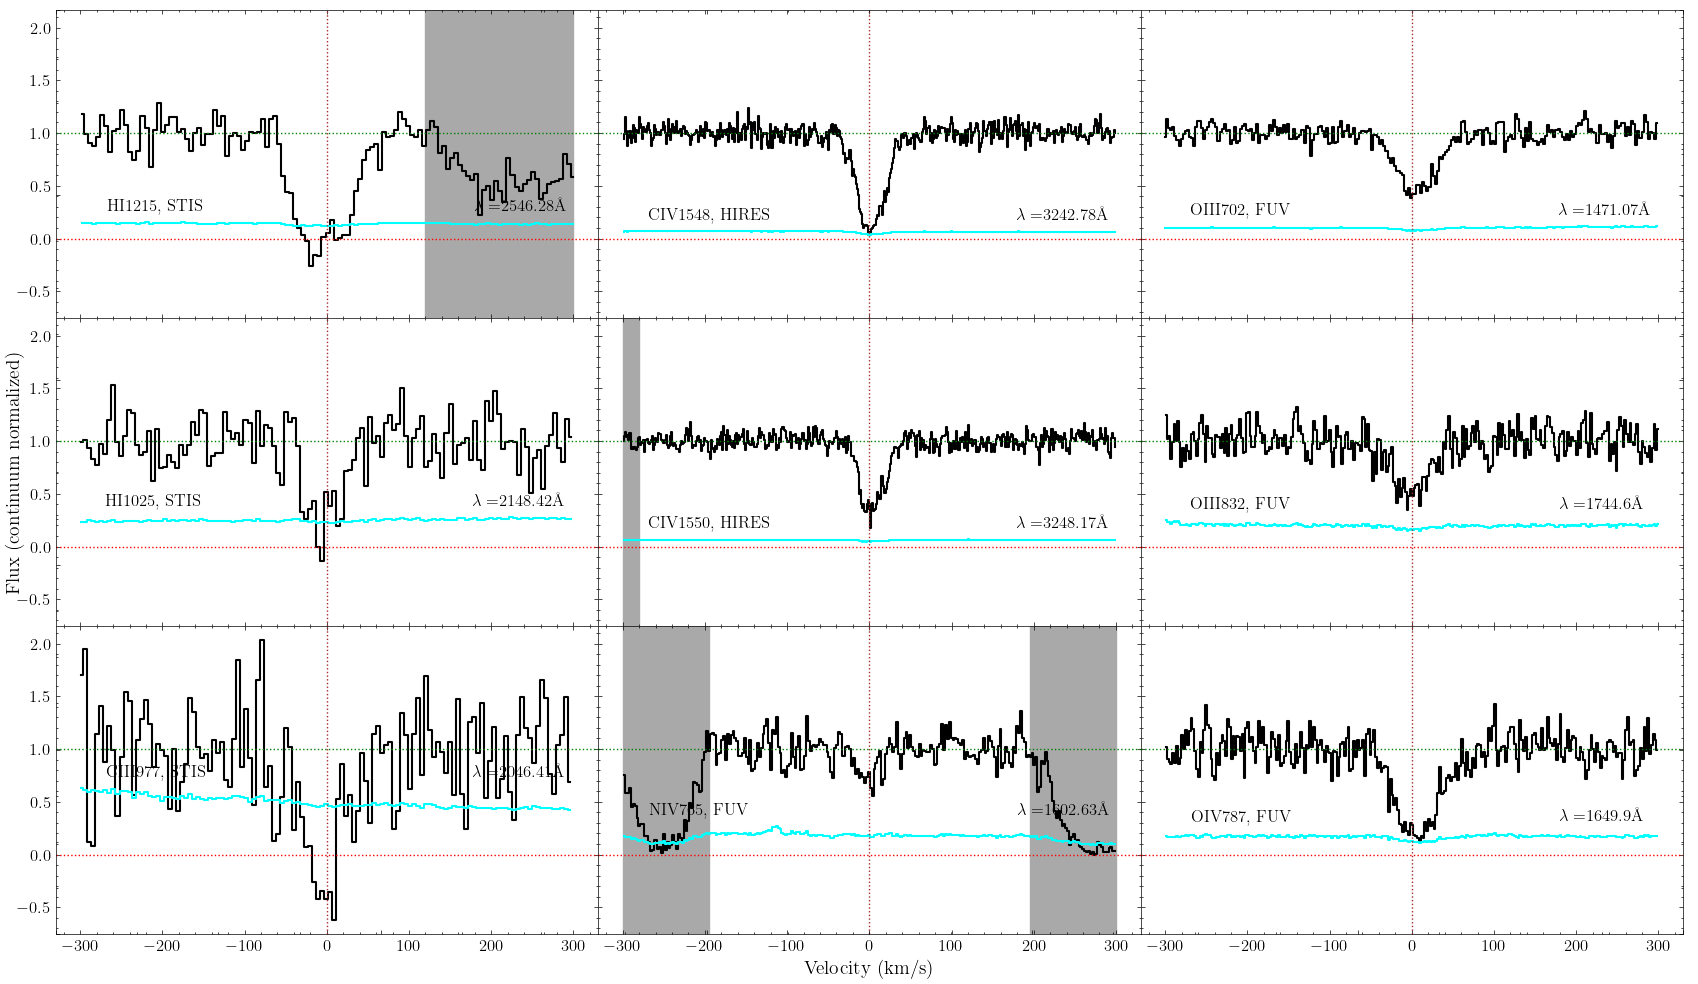

In [191]:
fig, axes = hi_ciii_civ_niv_oiii_oiv_TNT.plot_ion_suite(n_cols=3)

In [192]:
hi_ciii_civ_niv_oiii_oiv_TNT.init_ion_suite([
                                [[14.40, 4.1, 14.50, 0], [13.70, 4.1, 9.88, 21.]], # HI
                                [[14.40, 4.1, 14.50, 0], [13.70, 4.1, 9.88, 21.]],
                                [[13.89, 4.1, 14.50, 0]], # CIII
                                [[13.89, 4.1, 14.50, 0], [13.11, 4.1, 9.88, 21.]], # CIV
                                [[13.89, 4.1, 14.50, 0], [13.11, 4.1, 9.88, 21.]], # CIV
                                [[13.04, 4.1, 14.50, 0]], # NIV
                                [[13.89, 4.1, 14.50, 0], [13.11, 4.1, 9.88, 21.]],
                                [[14.17, 4.1, 14.50, 0], [13.69, 4.1, 9.88, 21.]], # OIII
                                [[14.17, 4.1, 14.50, 0], [13.69, 4.1, 9.88, 21.]],
                                [[14.71, 4.1, 14.50, 0], [14.21, 4.1, 9.88, 21.]], # OIV
                                #[[14.71, 4.39, 12.01, 0], [14.08, 4.8, 5, 23.]]
                                   ])

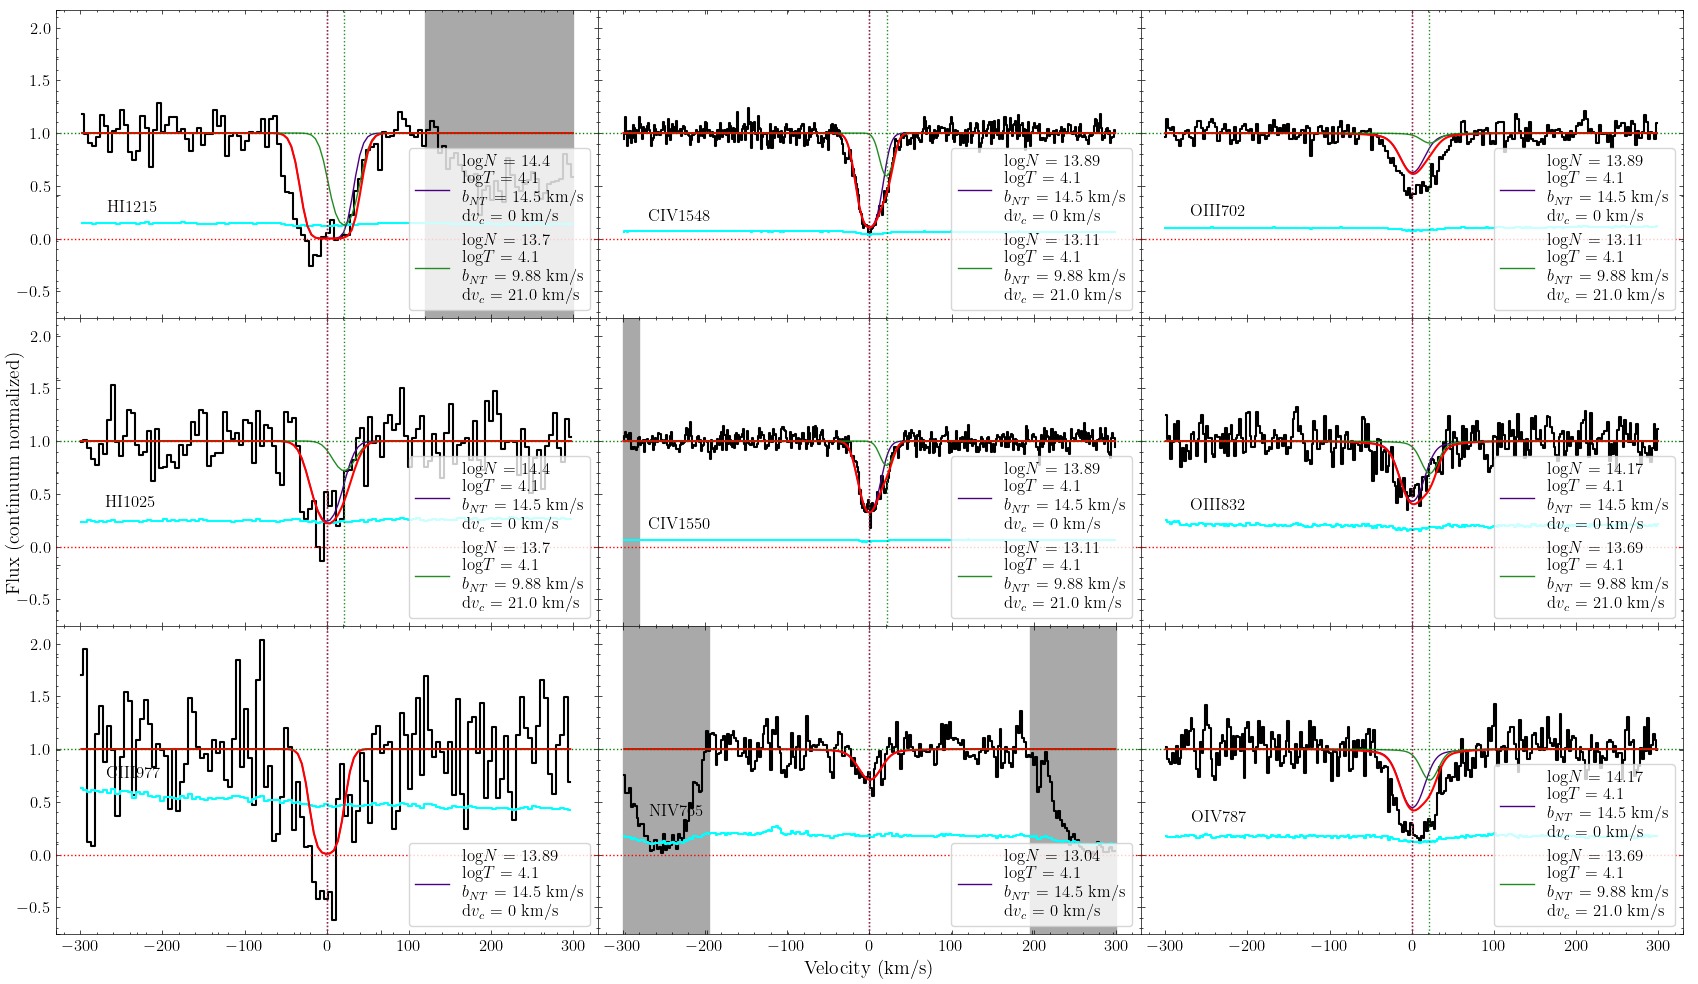

In [193]:
fig, axes = hi_ciii_civ_niv_oiii_oiv_TNT.plot_ion_suite_init_fit(n_cols=3)

In [194]:
hi_ciii_civ_niv_oiii_oiv_TNT.fit_ion_suite(tie_params_list=[
    ['it1c1_logN', 'it2c1_logN'], # Tie logN for HI c1
    ['it1c2_logN', 'it2c2_logN'], # Tie logN for HI c2
    ['it4c1_logN', 'it5c1_logN'], # Tie logN for CIV c1
    ['it4c2_logN', 'it5c2_logN'], # Tie logN for CIV c2
    ['it7c1_logN', 'it8c1_logN'], # Tie logN for OIII c1
    ['it7c2_logN', 'it8c2_logN'], # Tie logN for OIII c2
    ['it1c1_logT', 'it2c1_logT'], # Tie all logT together, c1 (HI, CIV, OIII, OIV)
    ['it1c1_logT', 'it3c1_logT'],
    ['it1c1_logT', 'it4c1_logT'],
    ['it1c1_logT', 'it5c1_logT'],
    ['it1c1_logT', 'it6c1_logT'],
    ['it1c1_logT', 'it7c1_logT'],
    ['it1c1_logT', 'it8c1_logT'],
    ['it1c1_logT', 'it9c1_logT'],
    ['it1c1_b_NT', 'it2c1_b_NT'], # Tie all b_NT together, c1 (HI, CIV, OIII, OIV)
    ['it1c1_b_NT', 'it3c1_b_NT'],
    ['it1c1_b_NT', 'it4c1_b_NT'],
    ['it1c1_b_NT', 'it5c1_b_NT'],
    ['it1c1_b_NT', 'it6c1_b_NT'],
    ['it1c1_b_NT', 'it7c1_b_NT'],
    ['it1c1_b_NT', 'it8c1_b_NT'],
    ['it1c1_b_NT', 'it9c1_b_NT'],
    ['it1c2_logT', 'it2c2_logT'], # Tie all logT together, c2 (HI, CIV, NIV, OIII, OIV, OV)
    ['it1c2_logT', 'it4c2_logT'],
    ['it1c2_logT', 'it5c2_logT'],
    ['it1c2_logT', 'it7c2_logT'],
    ['it1c2_logT', 'it8c2_logT'],
    ['it1c2_logT', 'it9c2_logT'],
    ['it1c2_b_NT', 'it2c2_b_NT'], # Tie all b_NT together, c2 (HI, CIV, NIV, OIII, OIV, OV)
    ['it1c2_b_NT', 'it4c2_b_NT'],
    ['it1c2_b_NT', 'it5c2_b_NT'],
    ['it1c2_b_NT', 'it7c2_b_NT'],
    ['it1c2_b_NT', 'it8c2_b_NT'],
    ['it1c2_b_NT', 'it9c2_b_NT'],
    ['it1c1_dv_c', 'it2c1_dv_c'], # Tie all dv_c together, c1 (HI, CIV, OIII, OIV, OV, OVI)
    ['it1c1_dv_c', 'it3c1_dv_c'],
    ['it1c1_dv_c', 'it4c1_dv_c'],
    ['it1c1_dv_c', 'it5c1_dv_c'],
    ['it1c1_dv_c', 'it6c1_dv_c'],
    ['it1c1_dv_c', 'it7c1_dv_c'],
    ['it1c1_dv_c', 'it8c1_dv_c'],
    ['it1c1_dv_c', 'it9c1_dv_c'],
    ['it1c2_dv_c', 'it2c2_dv_c'], # Tie all dv_c together, c2 (HI, CIV, OIII, OIV, OV) and OVI c2
    ['it1c2_dv_c', 'it4c2_dv_c'],
    ['it1c2_dv_c', 'it5c2_dv_c'],
    ['it1c2_dv_c', 'it7c2_dv_c'],
    ['it1c2_dv_c', 'it8c2_dv_c'],
    ['it1c2_dv_c', 'it9c2_dv_c'],
      ], 
    lower_bounds_dict={'it1c2_logN':0, 'it1c2_dv_c':15}, # HI; c2 will be an upper limit so prevent logN from going to -inf, c2 can blend with c1 so prevent it from coming too close to c1
    upper_bounds_dict={'it1c2_dv_c':30}) # c2 can also disappear altogether, so prevent it from going too far

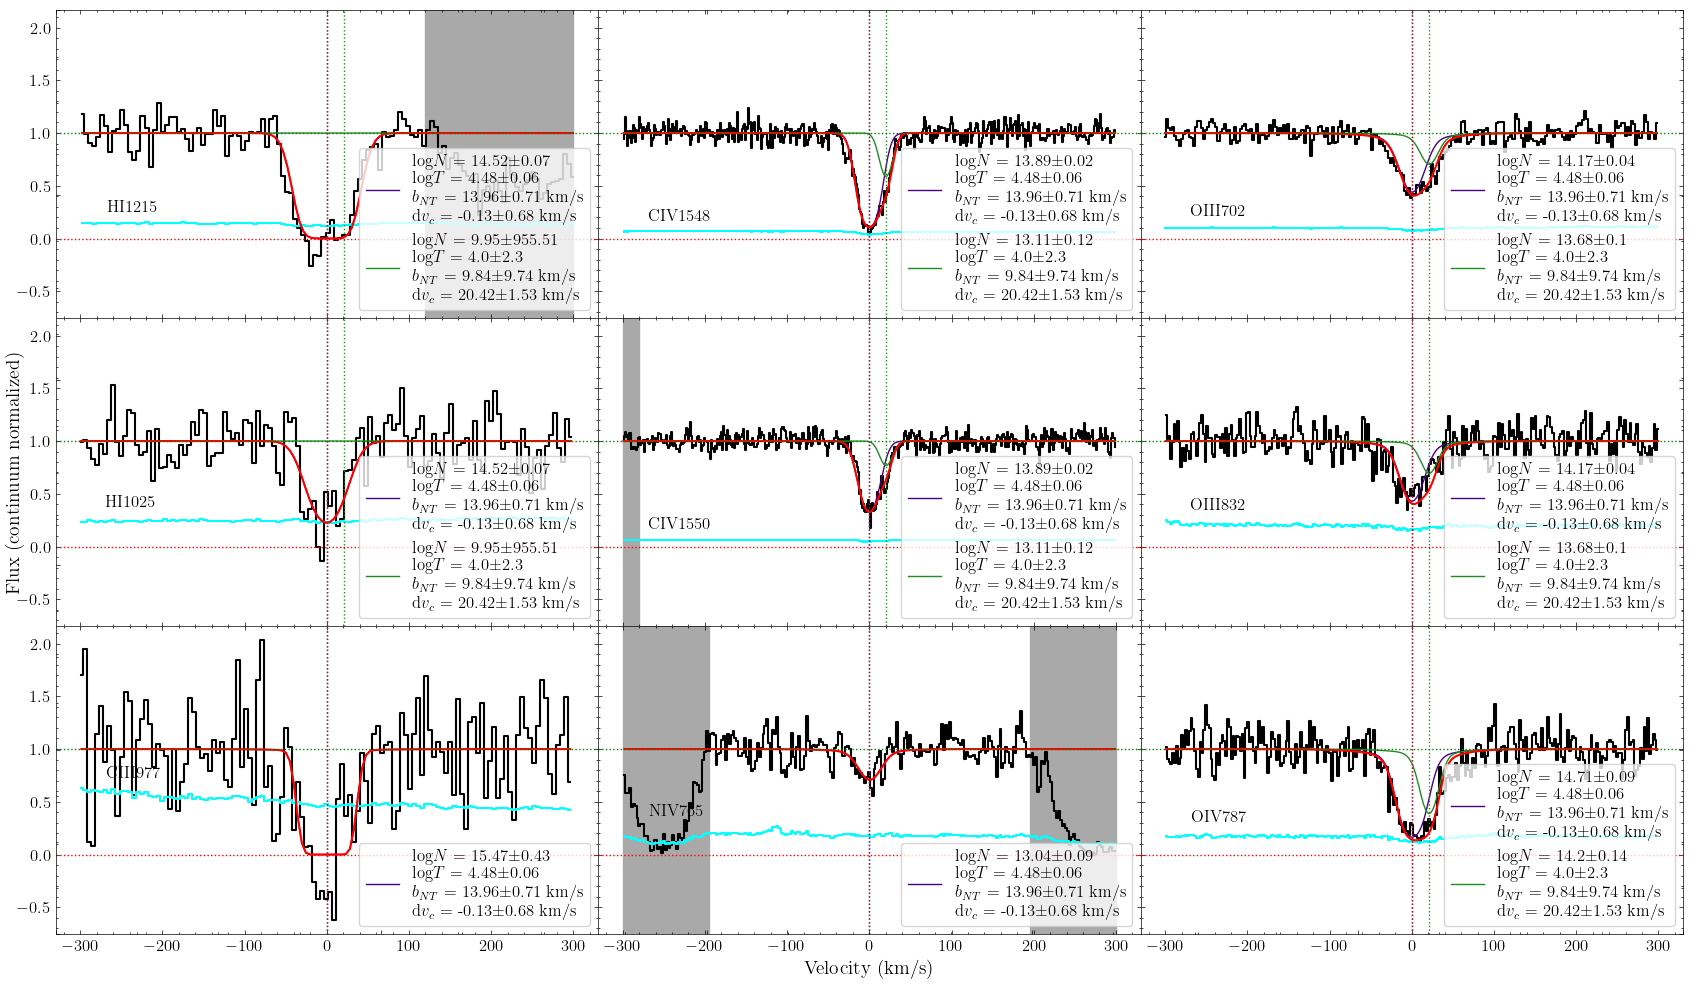

In [195]:
fig, axes = hi_ciii_civ_niv_oiii_oiv_TNT.plot_ion_suite_best_fit(n_cols=3)

In [196]:
#hi_ciii_civ_niv_oiii_oiv_TNT.fit_ion_suite_emcee(loaddir=rootdir, n_walkers=200, n_steps=10000, scale_covar=1e-21)
hi_ciii_civ_niv_oiii_oiv_TNT.fit_ion_suite_emcee(loaddir=rootdir, load=True)

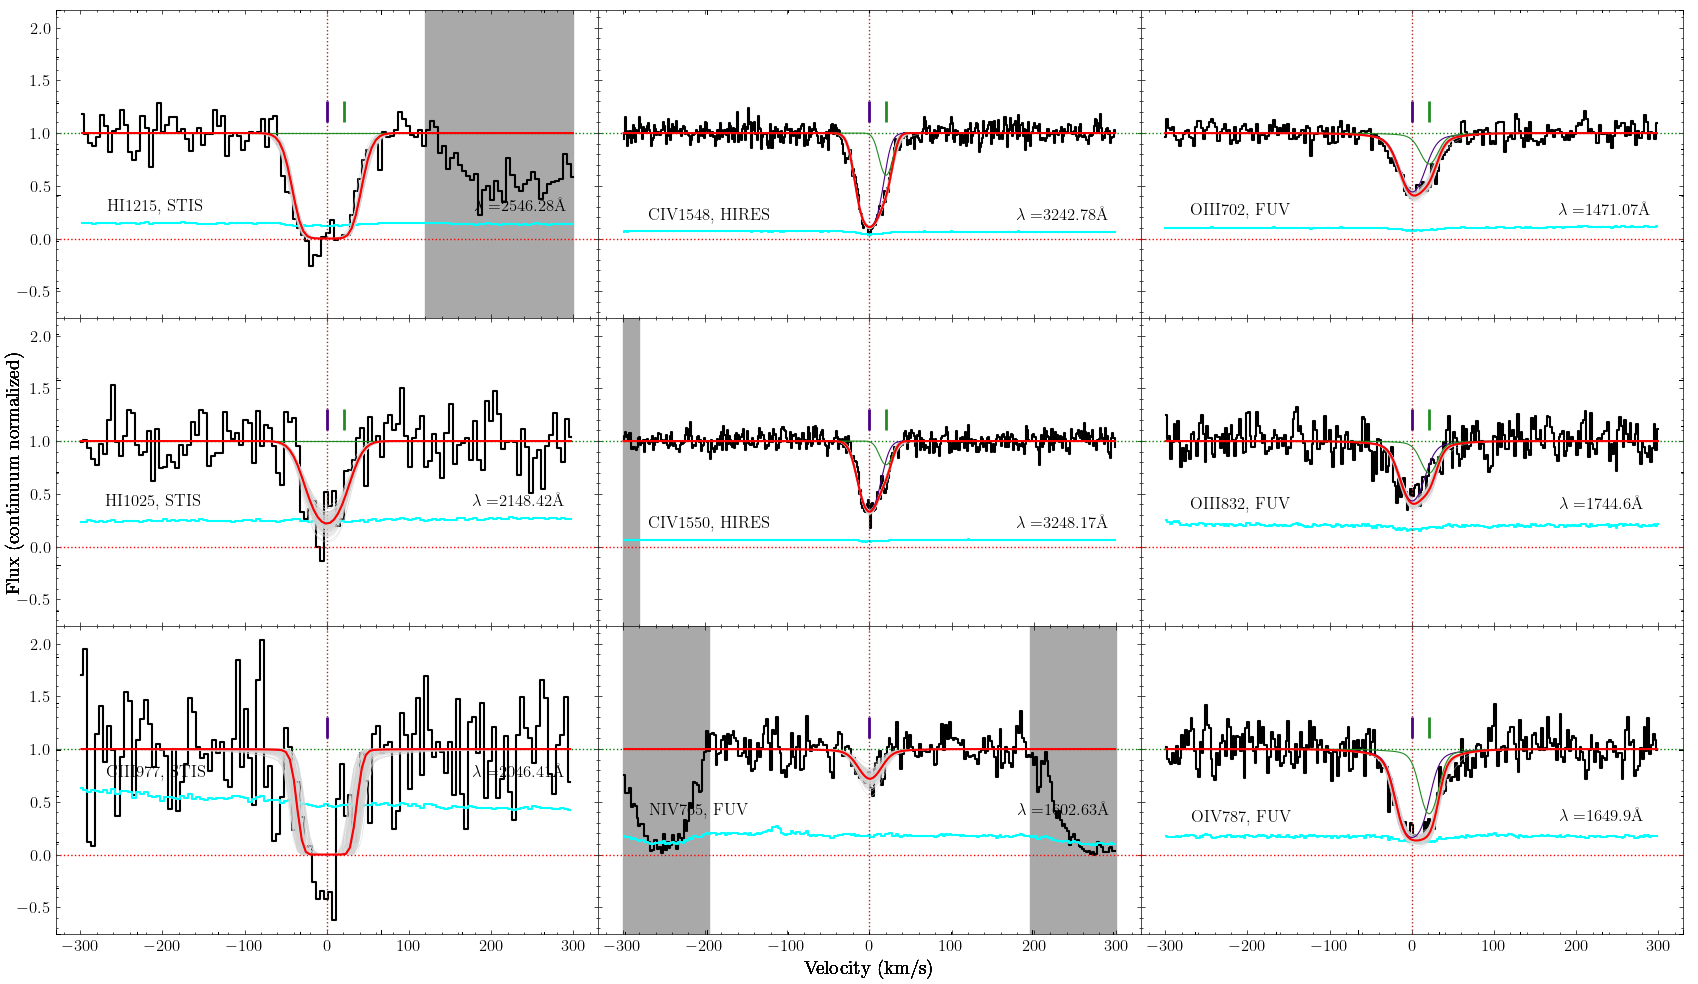

In [197]:
fig, axes = hi_ciii_civ_niv_oiii_oiv_TNT.plot_samples(n_cols=3)

In [198]:
#hi_ciii_civ_niv_oiii_oiv_TNT.plot_corner()

In [199]:
T, pdf, cdf, cdf_inv_interp = log_to_linear_PDF(hi_ciii_civ_niv_oiii_oiv_TNT.result_emcee.flatchain['it1c2_logT'], bins=300)

Text(0, 0.5, 'PDF')

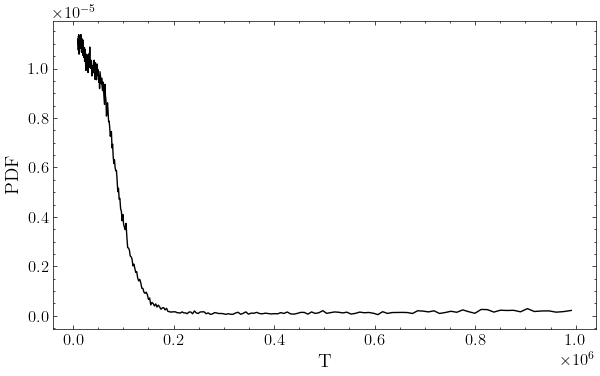

In [200]:
fig, ax = plt.subplots(1, figsize=(7,4))

ax.plot(T, pdf)

ax.set_xlabel('T')
ax.set_ylabel('PDF')

#ax.set_xscale('log')

In [201]:
np.log10(cdf_inv_interp(cdf_1sig))

5.0986185716372665

In [202]:
np.log10(cdf_inv_interp(cdf_3sig))

5.993153618256636

(array([3.40160e+04, 3.44590e+04, 3.39550e+04, 3.45440e+04, 3.55340e+04,
        3.72160e+04, 3.92140e+04, 4.16910e+04, 4.75150e+04, 5.14230e+04,
        5.74320e+04, 6.46670e+04, 7.04110e+04, 8.18720e+04, 9.17510e+04,
        1.01267e+05, 1.09092e+05, 1.14243e+05, 1.14516e+05, 1.10382e+05,
        1.03836e+05, 9.33260e+04, 8.09290e+04, 6.82420e+04, 5.88160e+04,
        4.66700e+04, 3.72980e+04, 2.84470e+04, 2.15340e+04, 1.30100e+04,
        8.77300e+03, 5.35000e+03, 3.51600e+03, 2.21800e+03, 1.38300e+03,
        1.08800e+03, 8.14000e+02, 5.18000e+02, 5.92000e+02, 4.63000e+02,
        5.07000e+02, 4.91000e+02, 4.37000e+02, 4.46000e+02, 3.67000e+02,
        4.48000e+02, 4.98000e+02, 5.68000e+02, 6.92000e+02, 5.54000e+02,
        6.63000e+02, 6.88000e+02, 6.90000e+02, 6.56000e+02, 4.97000e+02,
        4.18000e+02, 6.12000e+02, 6.16000e+02, 4.95000e+02, 4.25000e+02,
        4.92000e+02, 3.22000e+02, 2.43000e+02, 2.14000e+02, 2.69000e+02,
        1.49000e+02, 1.83000e+02, 2.10000e+02, 1.36

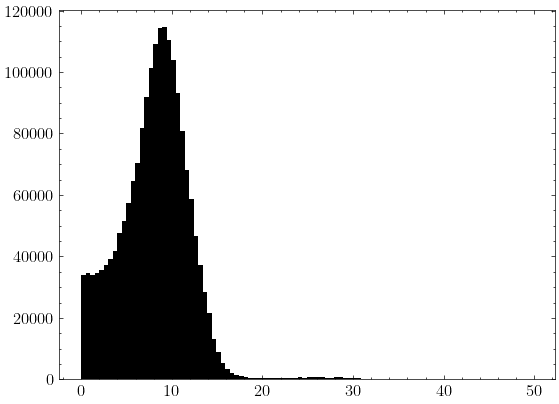

In [203]:
plt.hist(hi_ciii_civ_niv_oiii_oiv_TNT.result_emcee.flatchain['it1c2_b_NT'], bins=100)

In [204]:
np.percentile(hi_ciii_civ_niv_oiii_oiv_TNT.result_emcee.flatchain['it1c2_b_NT'], 100*cdf_1sig)

11.547177996039187

In [205]:
np.percentile(hi_ciii_civ_niv_oiii_oiv_TNT.result_emcee.flatchain['it1c2_b_NT'], 100*cdf_3sig)

41.520740625005374

In [206]:
N, pdf, cdf, cdf_inv_interp = log_to_linear_PDF(hi_ciii_civ_niv_oiii_oiv_TNT.result_emcee.flatchain['it1c2_logN'], bins=250)

Text(0, 0.5, 'PDF')

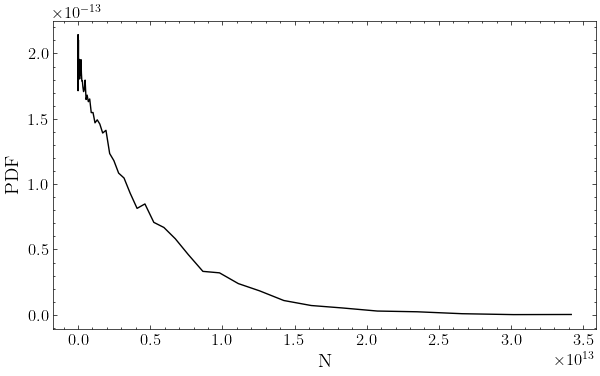

In [207]:
fig, ax = plt.subplots(1, figsize=(7,4))

ax.plot(N, pdf)

#ax.axvline(cdf_inv_interp(0.005), linestyle=':')

ax.set_xlabel('N')
ax.set_ylabel('PDF')

#ax.set_xscale('log')

In [208]:
np.log10(cdf_inv_interp(cdf_3sig)) # 3-sigma for a half Gaussian

13.458943895541877

# OV

## OV 629
Get OV 629 from COS FUV

In [209]:
ov_629_fuv = ion_transition('OV', 629, 'O', z_sys, 'FUV')

In [210]:
ov_629_fuv.grab_ion_transition_info()

In [211]:
ov_629_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-240],[110,250]])

In [212]:
ov_629_fuv.cont_norm_flux(v_abs_range=[-70,70], degree=1)

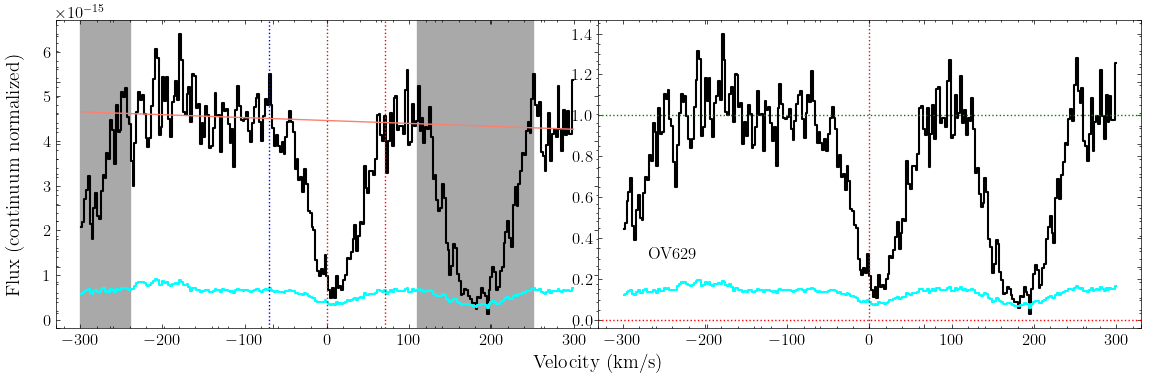

In [213]:
fig, ax = ov_629_fuv.plot_ion_transition_spec_cont()

In [214]:
ov_629_fuv.get_EW_total(-70,70)

Integration window: [-70, 70]
EW, 1sig: 121, 4
EW-3sig: 13


In [215]:
ov_629_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [216]:
ov_629_fuv.init_ion_transition(init_values = np.array([[14., 15.3, 0], [13.6, 10.6, 20]]), 
                             lsf_convolve = True)

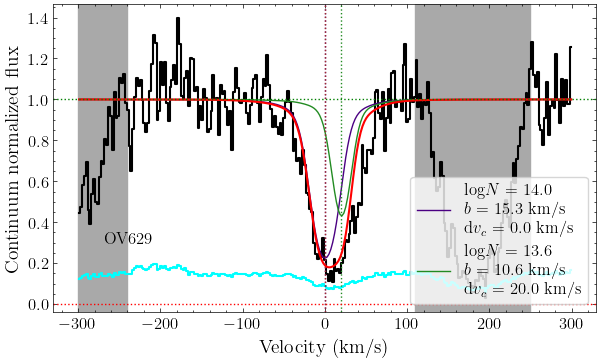

In [217]:
fig, ax = ov_629_fuv.plot_ion_transition_init_fit()

In [218]:
ov_629_fuv.fit_ion_transition()

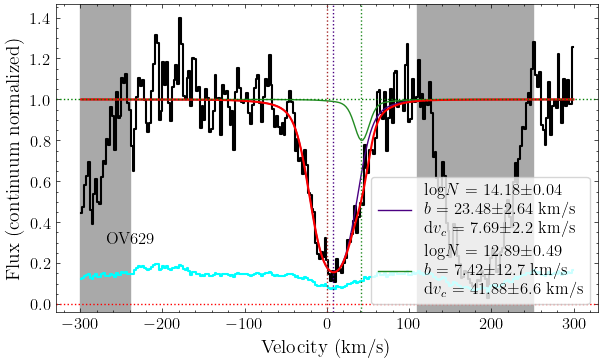

In [219]:
fig, ax = ov_629_fuv.plot_ion_transition_best_fit()

## OV ion

Make the OV ion

In [220]:
ov = ion(z_sys, 'OV', [ov_629_fuv])

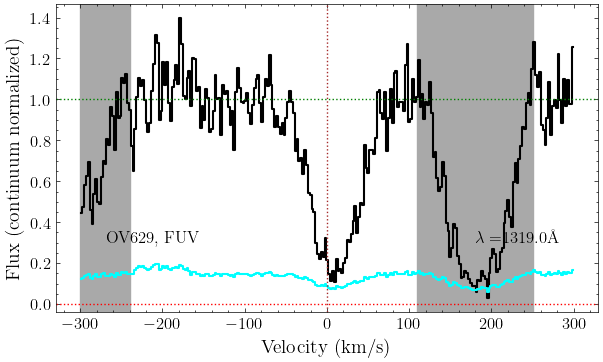

In [221]:
fig, axes = ov.plot_ion()

In [222]:
ov.init_ion([ov_629_fuv.best_values])

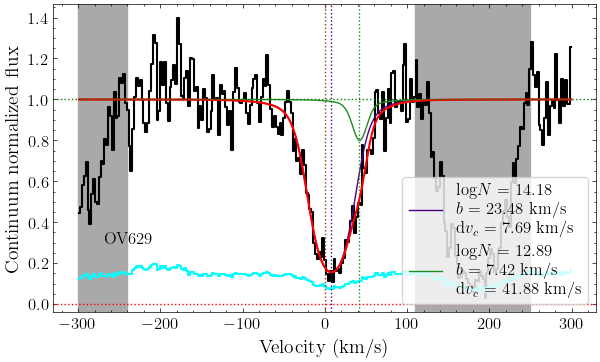

In [223]:
fig, axes = ov.plot_ion_init_fit()

In [224]:
ov.fit_ion()

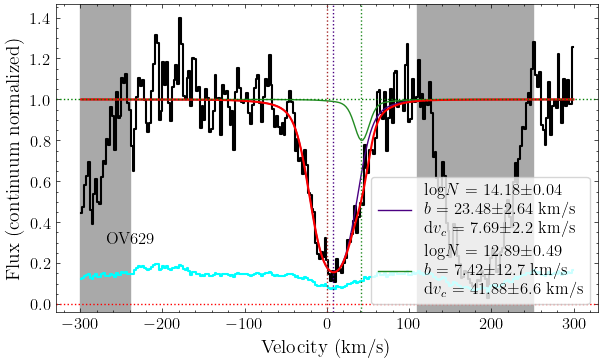

In [225]:
fig, axes = ov.plot_ion_best_fit()

In [226]:
#ov.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-6, n_steps=6000)
#ov.fit_ion_emcee(load=True, loaddir=rootdir)

In [227]:
#fig, axes = ov.plot_samples()

In [228]:
#ov.plot_corner()

# OVI

## OVI 1031 (STIS)
Get OVI 1031 from COS STIS

In [229]:
ovi_1031_stis = ion_transition('OVI', 1031, 'O', z_sys, 'STIS')

In [230]:
ovi_1031_stis.grab_ion_transition_info()

In [231]:
ovi_1031_stis.grab_ion_transition_spec(spec_fits_list, masks=[[-260,-180],[230,300]])

#ovi_1031_stis.grab_ion_transition_spec(spec_fits_list, v_range=[-200,200], masks=[[-200,-170],
#                                                                                  [-31,-17],
#                                                                                  [22,77]])

In [232]:
ovi_1031_stis.cont_norm_flux(v_abs_range=[-25,90], degree=1)

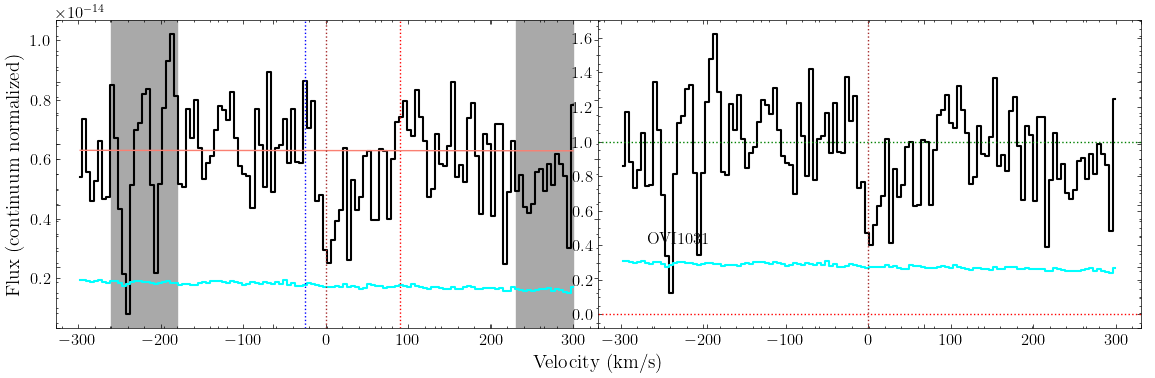

In [233]:
fig, ax = ovi_1031_stis.plot_ion_transition_spec_cont()

In [234]:
ovi_1031_stis.get_EW_total(-25,90)

Integration window: [-25, 90]
EW, 1sig: 82, 22
EW-3sig: 65


In [235]:
ovi_1031_stis.grab_ion_transition_lsf(lsf_fits_list)

In [236]:
ovi_1031_stis.init_ion_transition(init_values = np.array([[14.03, 18, 10]]), 
                             lsf_convolve = True)

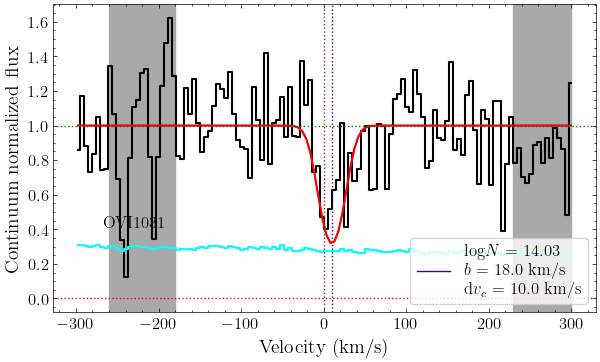

In [237]:
fig, ax = ovi_1031_stis.plot_ion_transition_init_fit()

In [238]:
ovi_1031_stis.fit_ion_transition()

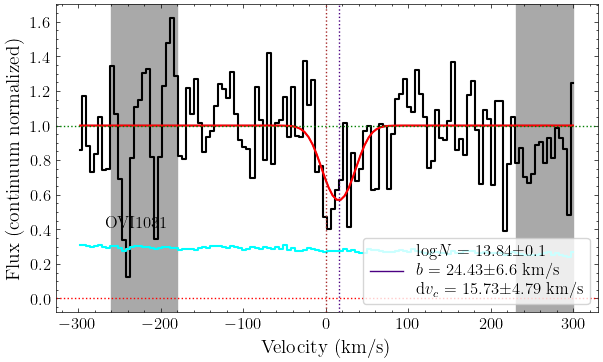

In [239]:
fig, ax = ovi_1031_stis.plot_ion_transition_best_fit()

## OVI ion
Now compile the OVI ion

In [240]:
ovi = ion(z_sys, 'OVI', [ovi_1031_stis])

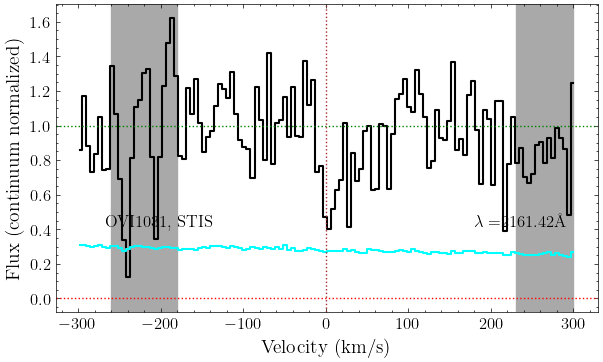

In [241]:
fig, axes = ovi.plot_ion()

In [242]:
ovi.init_ion([[[13.85, 24, 8]]])

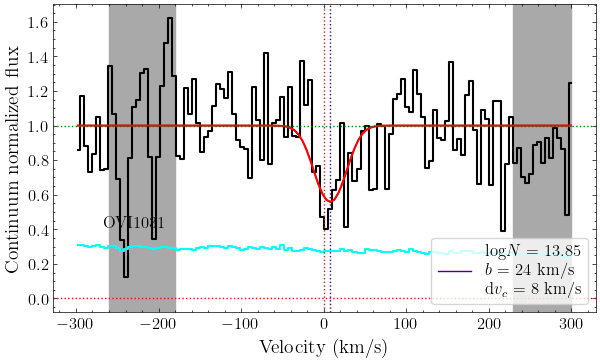

In [243]:
fig, axes = ovi.plot_ion_init_fit()

In [244]:
ovi.fit_ion(fix_params_list = ['it1c1_dv_c'],
             lower_bounds_dict = {'it1c1_logN':13.2, 'it1c1_b':5.},
            upper_bounds_dict = {'it1c1_logN':14.4, 'it1c1_b':140.})

#ovi.fit_ion(tie_params_list = [['it1c1_logN', 'it2c1_logN'],
#                               ['it1c1_b', 'it2c1_b'],
#                               ['it1c1_dv_c', 'it2c1_dv_c']],
#            lower_bounds_dict = {'it1c1_logN':13.2, 'it1c1_b':5., 'it1c1_dv_c':-45},
#           upper_bounds_dict = {'it1c1_logN':14.4, 'it1c1_b':140., 'it1c1_dv_c':45})

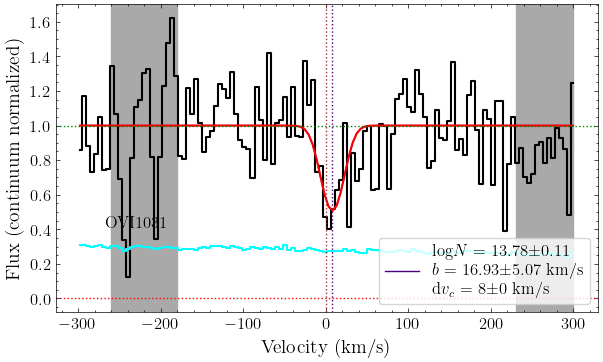

In [245]:
fig, axes = ovi.plot_ion_best_fit()

In [246]:
#ovi.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-8, n_steps=8000)
#ovi.fit_ion_emcee(load=True, loaddir=rootdir)

In [247]:
#fig, axes = ovi.plot_samples()

In [248]:
#ovi.plot_corner()

# OV+OVI

In [249]:
ov_ovi = ion_suite(z_sys, 'OV+OVI', [ov, ovi])

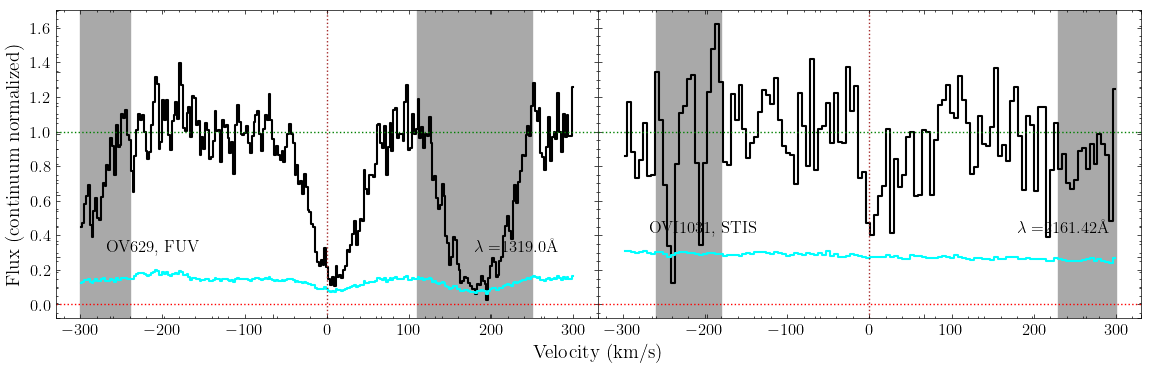

In [250]:
fig, axes = ov_ovi.plot_ion_suite()

In [251]:
ov_ovi.init_ion_suite([
                      [[13.90, 25, 0]],#, [13.10, 10, 21.]], # OV
                      [[13.40, 25, 0]],#, [12.90, 10, 21.]], # OVI
                    ])

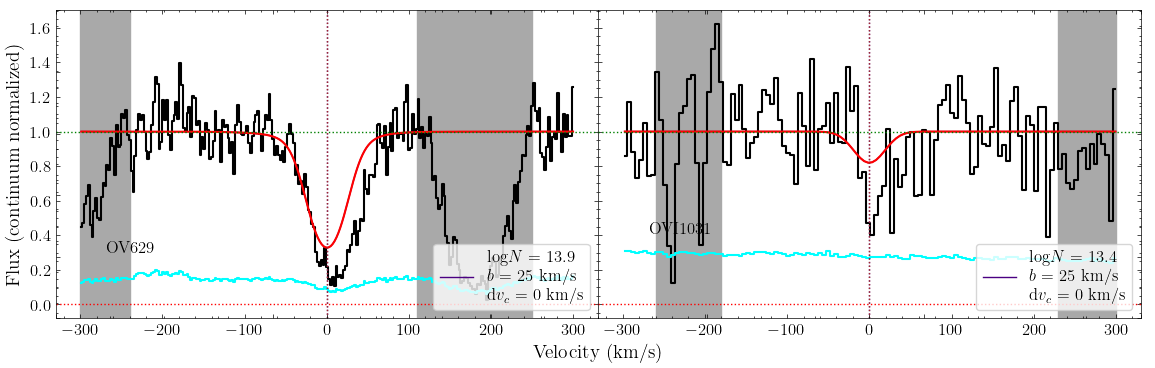

In [252]:
fig, axes = ov_ovi.plot_ion_suite_init_fit()

In [253]:
ov_ovi.fit_ion_suite(tie_params_list=[['it1c1_b', 'it2c1_b'],
                                      ['it1c1_dv_c', 'it2c1_dv_c']],
                    lower_bounds_dict={'it2c1_logN':10})

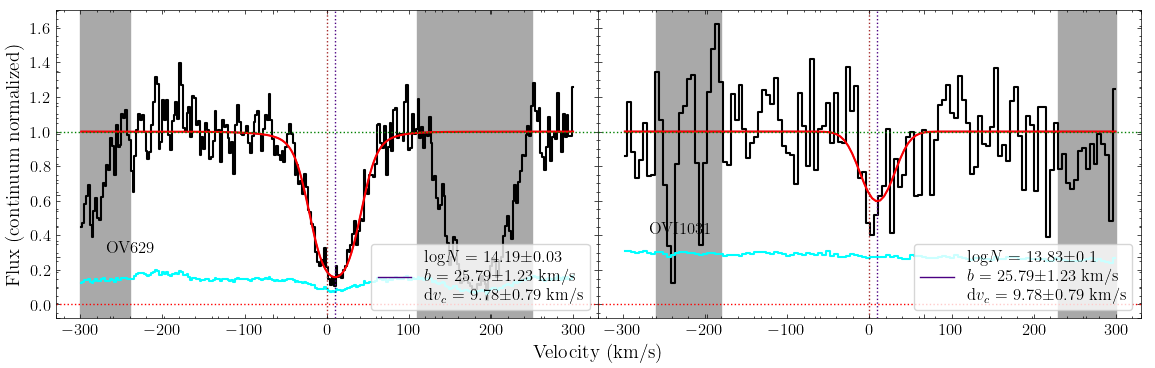

In [254]:
fig, axes = ov_ovi.plot_ion_suite_best_fit()

In [255]:
#ov_ovi.fit_ion_suite_emcee(loaddir=rootdir, n_walkers=200, n_steps=8000, scale_covar=1e-16)
ov_ovi.fit_ion_suite_emcee(loaddir=rootdir, load=True)

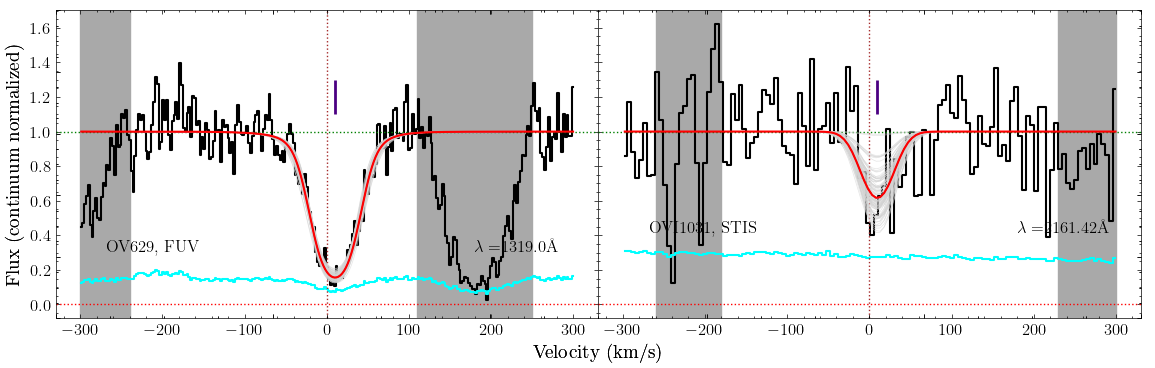

In [256]:
fig, axes = ov_ovi.plot_samples()

In [257]:
#ov_ovi.plot_corner()

# Summary List
Now compile a summary list

In [258]:
summary = ion_summary([hi_ciii_civ_niv_oiii_oiv_TNT, ov_ovi])

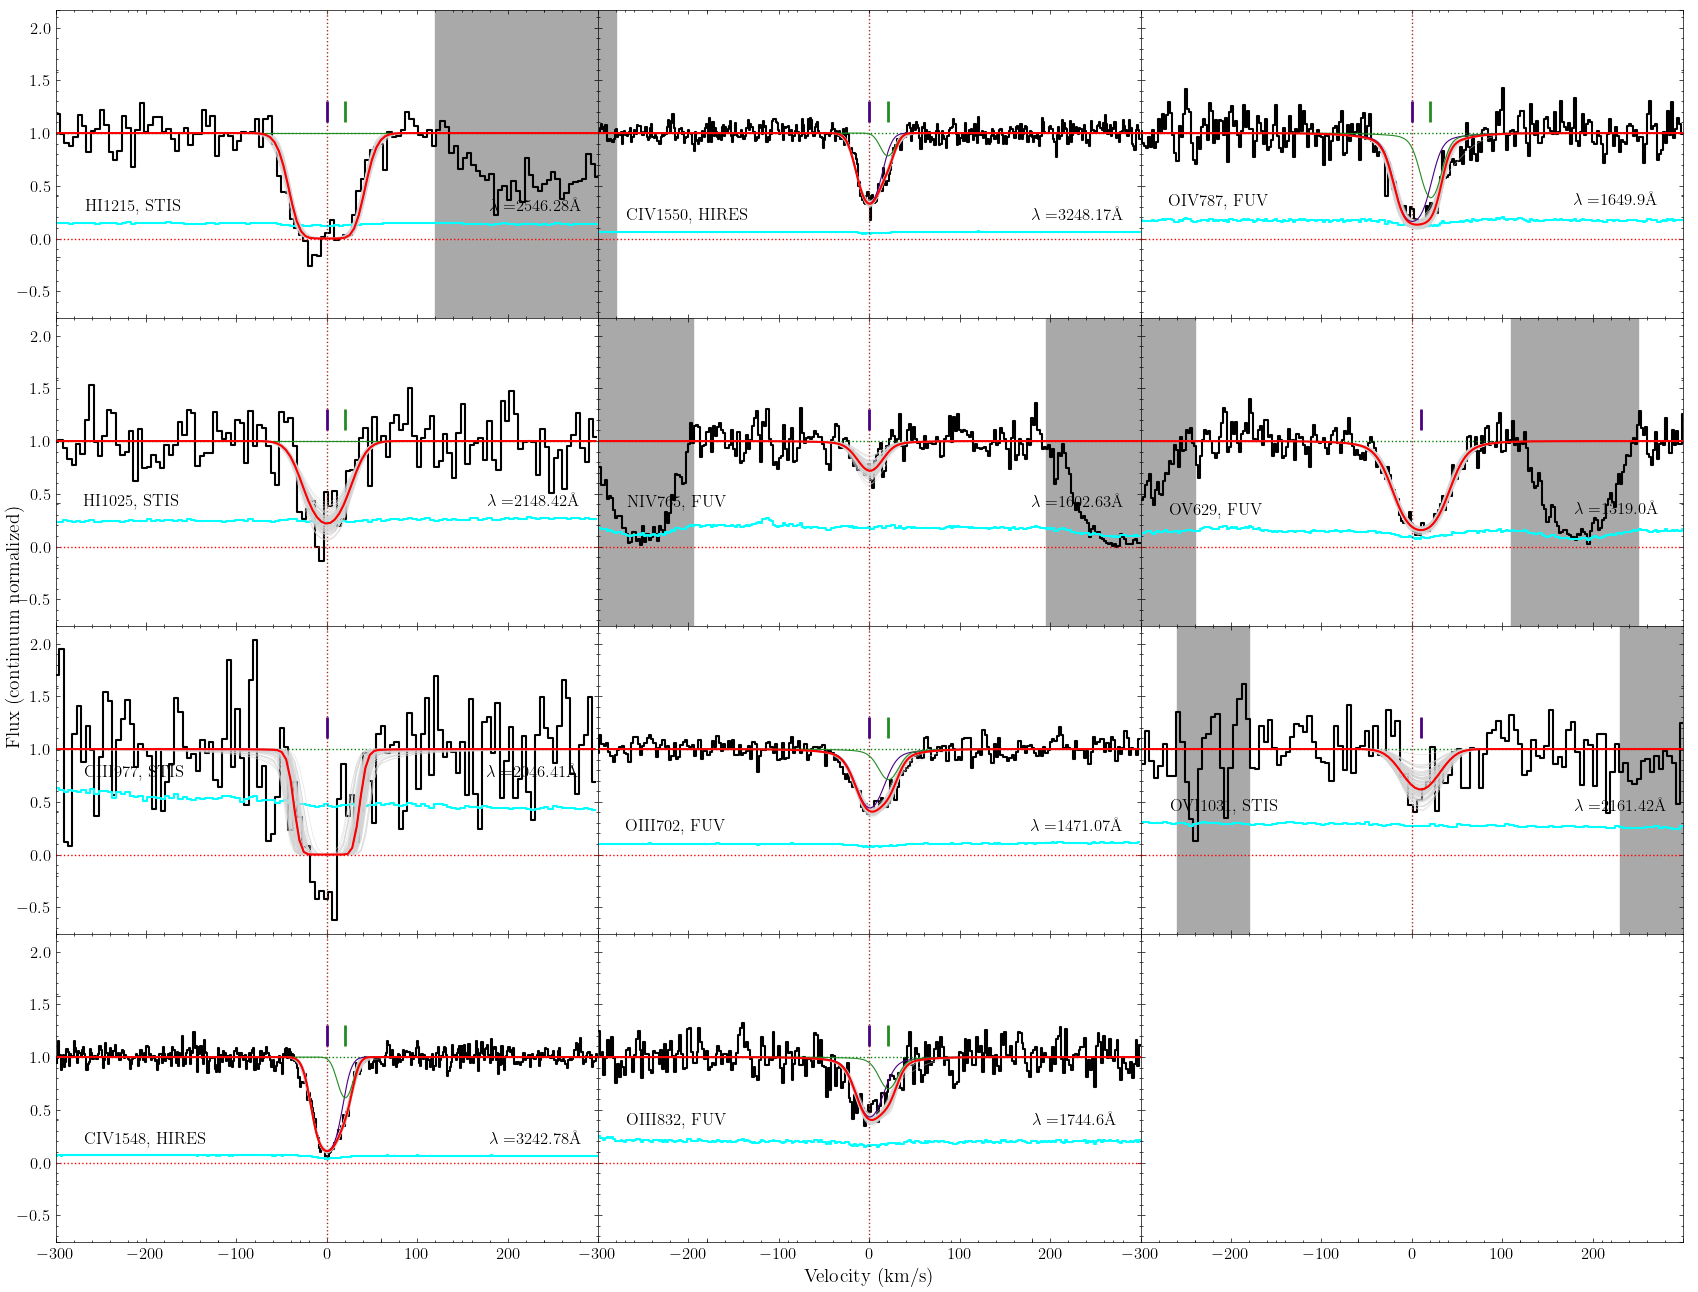

In [259]:
fig, axes = summary.plot_samples(n_cols=3)
axes[0,0].set_xlim(-300,299.9)
plt.savefig(rootdir+'Ions/z={}/z={}_vp.pdf'.format(str(z_sys), str(z_sys).replace('.', '_')), dpi=300)

In [260]:
summary.print_summary()

HI1215
dv_c = 0.0_{-0.8}^{+0.7}, logN = 14.53 \pm 0.08, b = 26.3_{-1.4}^{+1.5}
dv_c = 20.3_{-2.3}^{+1.6}, logN = 6.22 \pm 4.24, b = 24.0_{-5.6}^{+9.9}
HI1025
dv_c = 0.0_{-0.8}^{+0.7}, logN = 14.53 \pm 0.08, b = 26.3_{-1.4}^{+1.5}
dv_c = 20.3_{-2.3}^{+1.6}, logN = 6.22 \pm 4.24, b = 24.0_{-5.6}^{+9.9}
CIII977
dv_c = 0.0_{-0.8}^{+0.7}, logN = 15.34 \pm 0.69, b = 15.6 \pm 0.7
CIV1548
dv_c = 0.0_{-0.8}^{+0.7}, logN = 13.90 \pm 0.03, b = 15.6 \pm 0.7
dv_c = 20.3_{-2.3}^{+1.6}, logN = 13.09 \pm 0.16, b = 11.0_{-2.0}^{+2.4}
CIV1550
dv_c = 0.0_{-0.8}^{+0.7}, logN = 13.90 \pm 0.03, b = 15.6 \pm 0.7
dv_c = 20.3_{-2.3}^{+1.6}, logN = 13.09 \pm 0.16, b = 11.0_{-2.0}^{+2.4}
NIV765
dv_c = 0.0_{-0.8}^{+0.7}, logN = 13.03 \pm 0.11, b = 15.4 \pm 0.7
OIII702
dv_c = 0.0_{-0.8}^{+0.7}, logN = 14.17 \pm 0.05, b = 15.3_{-0.7}^{+0.8}
dv_c = 20.3_{-2.3}^{+1.6}, logN = 13.67 \pm 0.11, b = 10.4_{-2.0}^{+2.5}
OIII832
dv_c = 0.0_{-0.8}^{+0.7}, logN = 14.17 \pm 0.05, b = 15.3_{-0.7}^{+0.8}
dv_c = 20.3_{-2.3}^{+1.6

## Print thermal widths

In [261]:
hi_1215_stis.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c1_logT', 'it1c1_b_NT')

b_T, 1sig: 22.0, -1.9, +1.9
b_T, 3sig: <28.0
b, 1sig: 26.3, -1.4, +1.5


In [262]:
hi_1215_stis.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c2_logT', 'it1c2_b_NT')

b_T, 1sig: 22.1, -6.9, +11.1
b_T, 3sig: <118.8
b, 1sig: 24.0, -5.6, +9.9


(array([1.55319e+05, 1.40735e+05, 1.32156e+05, 1.21496e+05, 1.12510e+05,
        1.03635e+05, 9.52760e+04, 9.08460e+04, 8.48770e+04, 8.14160e+04,
        7.53460e+04, 7.30490e+04, 6.77400e+04, 6.50230e+04, 6.12140e+04,
        5.70710e+04, 5.32020e+04, 4.85220e+04, 4.37240e+04, 3.83750e+04,
        3.31110e+04, 2.87320e+04, 2.33870e+04, 1.93740e+04, 1.65600e+04,
        1.32470e+04, 1.06140e+04, 8.64100e+03, 6.82800e+03, 5.47600e+03,
        4.02700e+03, 3.22900e+03, 2.17400e+03, 1.72200e+03, 1.46000e+03,
        1.01600e+03, 9.89000e+02, 5.36000e+02, 5.41000e+02, 4.10000e+02,
        4.33000e+02, 3.08000e+02, 4.26000e+02, 4.12000e+02, 3.55000e+02,
        4.43000e+02, 2.43000e+02, 2.61000e+02, 2.85000e+02, 2.36000e+02,
        1.77000e+02, 2.02000e+02, 2.83000e+02, 2.20000e+02, 2.51000e+02,
        2.89000e+02, 2.49000e+02, 2.15000e+02, 1.98000e+02, 1.89000e+02,
        2.62000e+02, 2.38000e+02, 1.83000e+02, 2.70000e+02, 2.35000e+02,
        2.93000e+02, 2.35000e+02, 3.06000e+02, 2.27

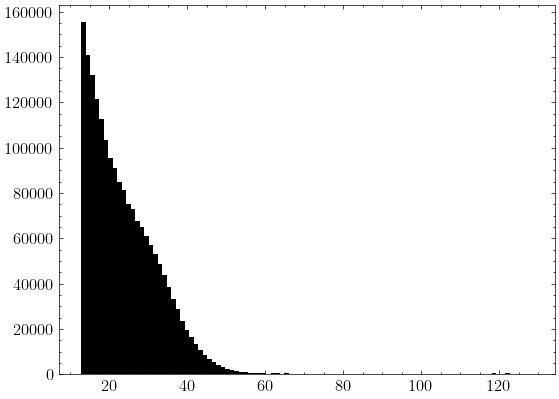

In [263]:
plt.hist(hi_1215_stis.b_T_dist, bins=100)

(array([1.76100e+03, 1.64990e+04, 6.57660e+04, 1.26018e+05, 1.53459e+05,
        1.56643e+05, 1.45354e+05, 1.29154e+05, 1.18322e+05, 1.04685e+05,
        9.86330e+04, 9.17860e+04, 8.20470e+04, 7.60630e+04, 7.13650e+04,
        6.55060e+04, 5.93210e+04, 5.37250e+04, 4.70850e+04, 4.04880e+04,
        3.46320e+04, 2.79650e+04, 2.34570e+04, 1.93480e+04, 1.60160e+04,
        1.28310e+04, 9.93700e+03, 8.17400e+03, 6.09500e+03, 4.93900e+03,
        3.68000e+03, 2.45800e+03, 1.80700e+03, 1.60900e+03, 1.24500e+03,
        1.07600e+03, 7.25000e+02, 7.33000e+02, 6.81000e+02, 7.05000e+02,
        5.67000e+02, 5.89000e+02, 4.57000e+02, 6.43000e+02, 4.14000e+02,
        4.80000e+02, 2.92000e+02, 4.94000e+02, 3.94000e+02, 3.42000e+02,
        2.86000e+02, 2.32000e+02, 2.32000e+02, 3.27000e+02, 2.95000e+02,
        3.55000e+02, 2.87000e+02, 2.87000e+02, 2.35000e+02, 2.12000e+02,
        2.29000e+02, 2.47000e+02, 2.67000e+02, 2.98000e+02, 2.30000e+02,
        3.11000e+02, 1.90000e+02, 2.20000e+02, 3.76

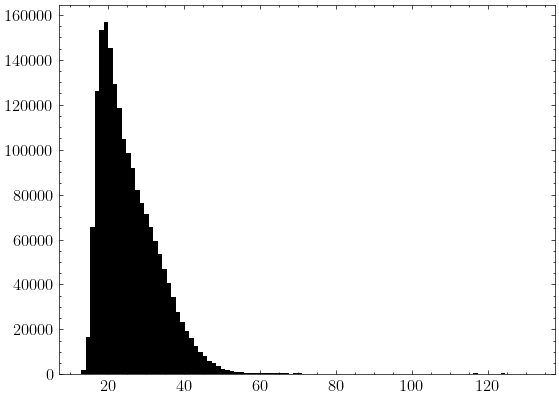

In [264]:
plt.hist(hi_1215_stis.b_dist, bins=100)

In [265]:
ciii_977_stis.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c1_logT', 'it1c1_b_NT')

b_T, 1sig: 6.4, -0.5, +0.6
b_T, 3sig: <8.1
b, 1sig: 15.6, -0.7, +0.7


In [271]:
ciii_977_stis.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c2_logT', 'it1c2_b_NT')

b_T, 1sig: 6.4, -2.0, +3.2
b_T, 3sig: <34.4
b, 1sig: 11.0, -2.0, +2.4


In [274]:
niv_765_fuv.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c1_logT', 'it1c1_b_NT')

b_T, 1sig: 5.9, -0.5, +0.5
b_T, 3sig: <7.5
b, 1sig: 15.4, -0.7, +0.7


In [276]:
niv_765_fuv.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c2_logT', 'it1c2_b_NT')

b_T, 1sig: 5.9, -1.8, +3.0
b_T, 3sig: <31.9
b, 1sig: 10.7, -2.0, +2.5


In [277]:
oiii_702_fuv.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c1_logT', 'it1c1_b_NT')

b_T, 1sig: 5.5, -0.5, +0.5
b_T, 3sig: <7.0
b, 1sig: 15.3, -0.7, +0.8


In [278]:
oiii_702_fuv.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c2_logT', 'it1c2_b_NT')

b_T, 1sig: 5.5, -1.7, +2.8
b_T, 3sig: <29.8
b, 1sig: 10.4, -2.0, +2.5


# HI (re-c2: upper limit)

## HI 1215 (STIS)

In [279]:
hi_1215_stis = ion_transition('HI', 1215, 'H', z_sys, 'STIS')

In [280]:
hi_1215_stis.grab_ion_transition_info()

In [281]:
hi_1215_stis.grab_ion_transition_spec(spec_fits_list, masks=[[120,300]])

In [282]:
hi_1215_stis.cont_norm_flux(v_abs_range=[-70,90], degree=1)

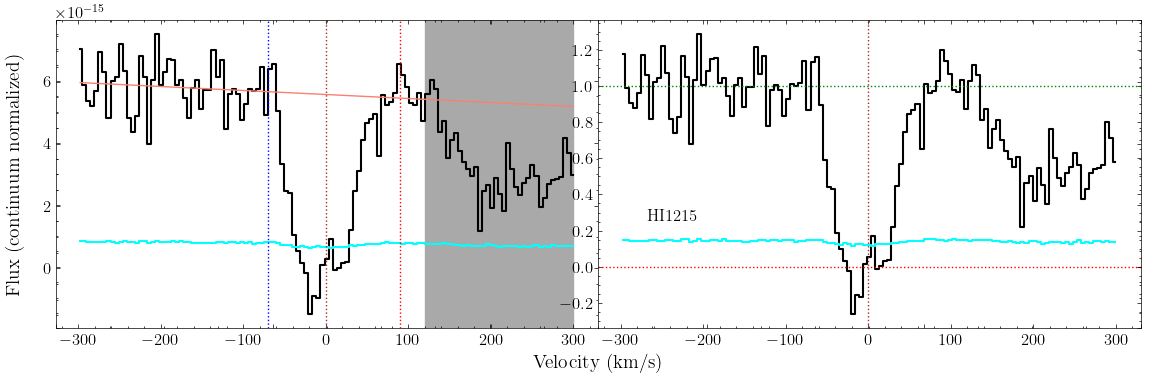

In [283]:
fig, axes = hi_1215_stis.plot_ion_transition_spec_cont()

In [284]:
hi_1215_stis.grab_ion_transition_lsf(lsf_fits_list)

In [285]:
hi_1215_stis.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c2_logT', 'it1c2_b_NT')

b_T, 1sig: 22.1, -6.9, +11.1
b_T, 3sig: <118.8
b, 1sig: 24.0, -5.6, +9.9


(array([1017661.,  686019.,  163394.,   14719.,    4672.,    2748.,
           2615.,    2622.,    3037.,    2513.]),
 array([ 12.88959984,  24.74805673,  36.60651362,  48.4649705 ,
         60.32342739,  72.18188428,  84.04034116,  95.89879805,
        107.75725493, 119.61571182, 131.47416871]),
 <BarContainer object of 10 artists>)

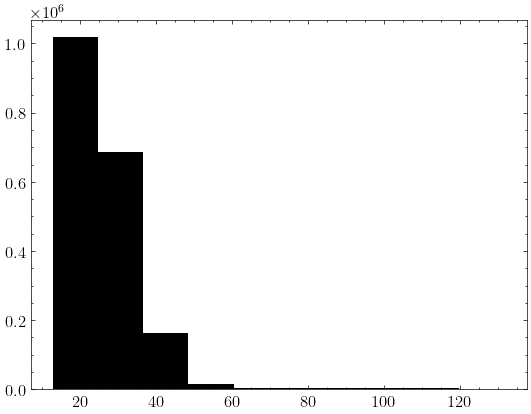

In [286]:
plt.hist(hi_1215_stis.b_dist)

In [287]:
hi_1215_stis.get_EW(np.median(hi_1215_stis.b_dist), 20.3)

Integration window: [-21, 61]
EW, 1sig: 250, 10
EW-3sig: 30
logN-3sig: 12.8


## HI 1215 (STIS)

In [288]:
hi_1025_stis = ion_transition('HI', 1025, 'H', z_sys, 'STIS')

In [289]:
hi_1025_stis.grab_ion_transition_info()

In [290]:
hi_1025_stis.grab_ion_transition_spec(spec_fits_list)

In [291]:
hi_1025_stis.cont_norm_flux(v_abs_range=[-70,70], degree=1)

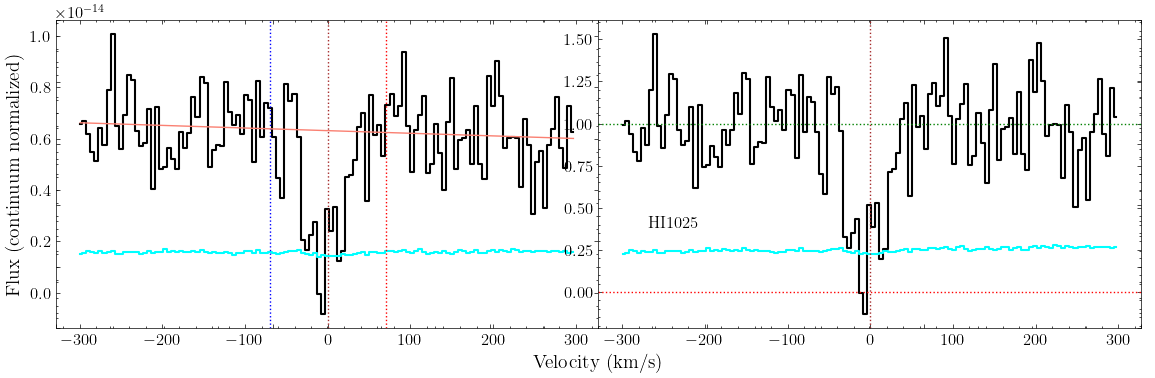

In [292]:
fig, axes = hi_1025_stis.plot_ion_transition_spec_cont()

In [293]:
hi_1025_stis.grab_ion_transition_lsf(lsf_fits_list)

In [294]:
hi_1025_stis.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c2_logT', 'it1c2_b_NT')

b_T, 1sig: 22.1, -6.9, +11.1
b_T, 3sig: <118.8
b, 1sig: 24.0, -5.6, +9.9


(array([1017661.,  686019.,  163394.,   14719.,    4672.,    2748.,
           2615.,    2622.,    3037.,    2513.]),
 array([ 12.88959984,  24.74805673,  36.60651362,  48.4649705 ,
         60.32342739,  72.18188428,  84.04034116,  95.89879805,
        107.75725493, 119.61571182, 131.47416871]),
 <BarContainer object of 10 artists>)

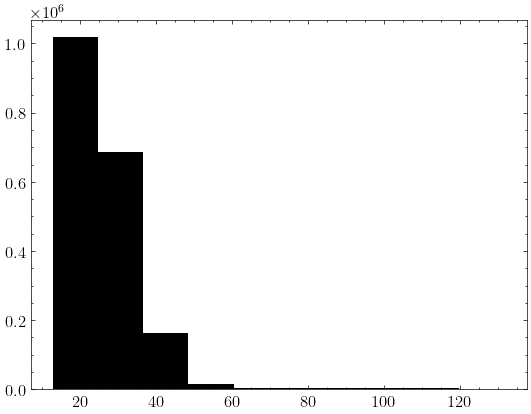

In [295]:
plt.hist(hi_1025_stis.b_dist)

In [296]:
hi_1025_stis.get_EW(np.median(hi_1025_stis.b_dist), 20.3)

Integration window: [-21, 61]
EW, 1sig: 121, 16
EW-3sig: 47
logN-3sig: 13.9


# HeI

## HeI 584

In [297]:
hei_584_fuv = ion_transition('HeI', 584, 'He', z_sys, 'FUV')

In [298]:
hei_584_fuv.grab_ion_transition_info()

In [299]:
hei_584_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[100,300]])

In [300]:
hei_584_fuv.cont_norm_flux(v_abs_range=[-80,80], degree=1)

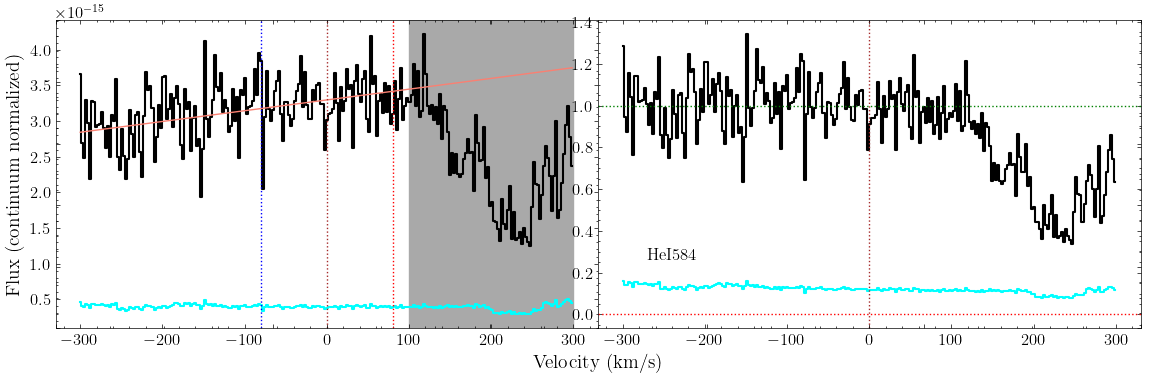

In [301]:
fig, ax = hei_584_fuv.plot_ion_transition_spec_cont()

In [302]:
hei_584_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [303]:
hei_584_fuv.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c1_logT', 'it1c1_b_NT')

b_T, 1sig: 11.1, -1.0, +1.0
b_T, 3sig: <14.0
b, 1sig: 18.1, -0.7, +0.7


(array([3.56000e+02, 9.03900e+03, 1.06556e+05, 4.15745e+05, 6.76045e+05,
        4.70778e+05, 1.71179e+05, 4.28780e+04, 7.02600e+03, 3.98000e+02]),
 array([15.19617586, 15.81520792, 16.43423997, 17.05327203, 17.67230408,
        18.29133614, 18.91036819, 19.52940025, 20.1484323 , 20.76746436,
        21.38649641]),
 <BarContainer object of 10 artists>)

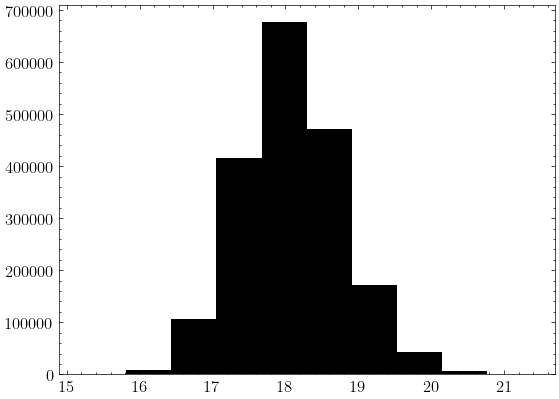

In [304]:
plt.hist(hei_584_fuv.b_dist)

In [305]:
hei_584_fuv.get_EW(np.median(hei_584_fuv.b_dist), 0)

Integration window: [-39, 39]
EW, 1sig: 0, 3
EW-3sig: 10
logN-3sig: 13.1


In [308]:
hei_584_fuv.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c2_logT', 'it1c2_b_NT')

b_T, 1sig: 11.1, -3.4, +5.6
b_T, 3sig: <59.6
b, 1sig: 14.6, -2.6, +3.6


(array([5.389620e+05, 1.177712e+06, 1.497200e+05, 1.115900e+04,
        4.292000e+03, 5.132000e+03, 5.193000e+03, 4.048000e+03,
        3.204000e+03, 5.780000e+02]),
 array([ 6.48853249, 13.05315312, 19.61777375, 26.18239438, 32.74701502,
        39.31163565, 45.87625628, 52.44087691, 59.00549754, 65.57011817,
        72.13473881]),
 <BarContainer object of 10 artists>)

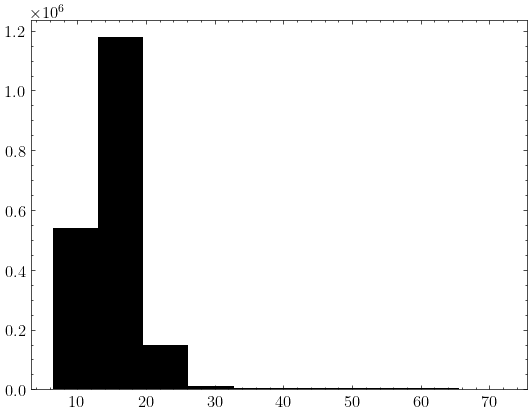

In [309]:
plt.hist(hei_584_fuv.b_dist)

In [310]:
hei_584_fuv.get_EW(np.median(hei_584_fuv.b_dist), 20.3)

Integration window: [-14, 54]
EW, 1sig: 1, 3
EW-3sig: 9
logN-3sig: 13.0


In [311]:
hei_584_fuv.get_EW_total(-39,54)

Integration window: [-39, 54]
EW, 1sig: -1, 3
EW-3sig: 10


# CII

## CII 903.9 (NUV)

In [312]:
cii_904_nuv = ion_transition('CII', 903.9, 'C', z_sys, 'NUV')

In [313]:
cii_904_nuv.grab_ion_transition_info()

In [314]:
cii_904_nuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300, -180]])

In [315]:
cii_904_nuv.cont_norm_flux(v_abs_range=[-100,100], degree=1)

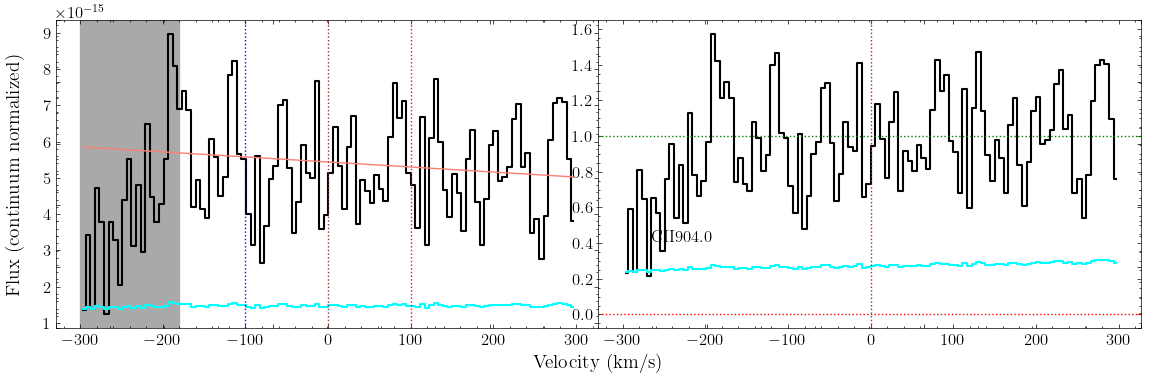

In [316]:
fig, ax = cii_904_nuv.plot_ion_transition_spec_cont()

In [317]:
cii_904_nuv.grab_ion_transition_lsf(lsf_fits_list)

In [318]:
cii_904_nuv.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c1_logT', 'it1c1_b_NT')

b_T, 1sig: 6.4, -0.5, +0.6
b_T, 3sig: <8.1
b, 1sig: 15.6, -0.7, +0.7


(array([   725.,  15402., 128406., 417006., 636067., 461651., 172933.,
         48117.,  18367.,   1326.]),
 array([12.8186465 , 13.42445675, 14.030267  , 14.63607725, 15.24188749,
        15.84769774, 16.45350799, 17.05931824, 17.66512848, 18.27093873,
        18.87674898]),
 <BarContainer object of 10 artists>)

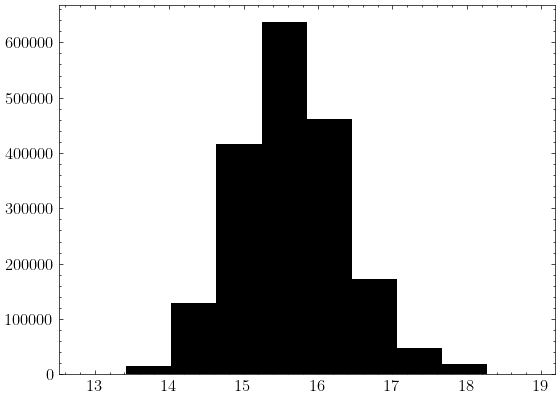

In [319]:
plt.hist(cii_904_nuv.b_dist)

In [320]:
cii_904_nuv.get_EW(np.median(cii_904_nuv.b_dist), 0)

Integration window: [-34, 34]
EW, 1sig: 5, 15
EW-3sig: 45
logN-3sig: 13.4


In [321]:
cii_904_nuv.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c2_logT', 'it1c2_b_NT')

b_T, 1sig: 6.4, -2.0, +3.2
b_T, 3sig: <34.4
b, 1sig: 11.0, -2.0, +2.4


(array([3.011990e+05, 1.423781e+06, 1.446200e+05, 6.037000e+03,
        6.267000e+03, 8.323000e+03, 5.251000e+03, 2.898000e+03,
        1.565000e+03, 5.900000e+01]),
 array([ 3.77666868,  9.05646708, 14.33626548, 19.61606388, 24.89586228,
        30.17566067, 35.45545907, 40.73525747, 46.01505587, 51.29485427,
        56.57465267]),
 <BarContainer object of 10 artists>)

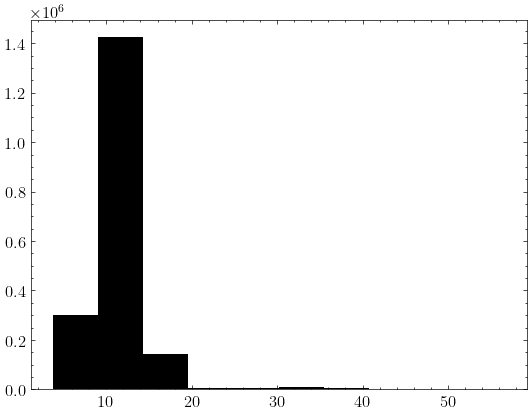

In [322]:
plt.hist(cii_904_nuv.b_dist)

In [323]:
cii_904_nuv.get_EW(np.median(cii_904_nuv.b_dist), 20.3)

Integration window: [-5, 46]
EW, 1sig: 6, 13
EW-3sig: 39
logN-3sig: 13.3


In [324]:
cii_904_nuv.get_EW_total(-34,46)

Integration window: [-34, 46]
EW, 1sig: 6, 16
EW-3sig: 49


## CII 903.6 (NUV)

In [325]:
cii_903_nuv = ion_transition('CII', 903.6, 'C', z_sys, 'NUV')

In [326]:
cii_903_nuv.grab_ion_transition_info()

In [327]:
cii_903_nuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300, -90]])

In [328]:
cii_903_nuv.cont_norm_flux(v_abs_range=[-100,100], degree=1)

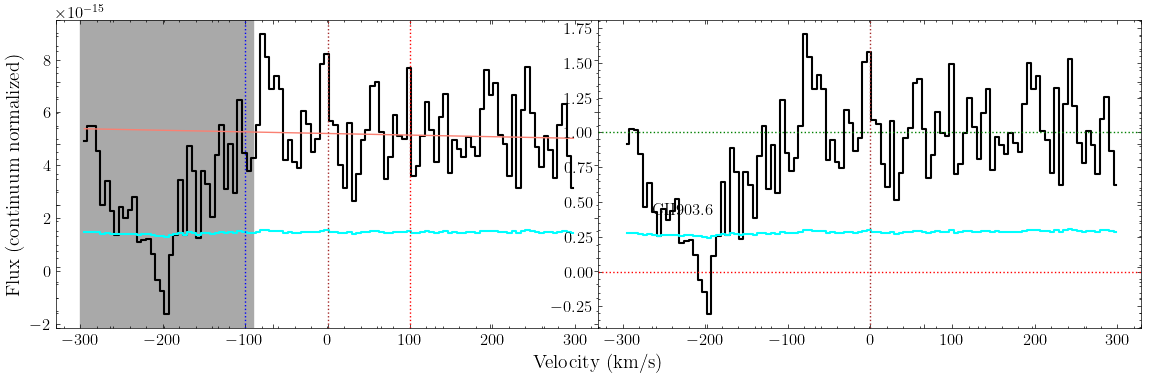

In [329]:
fig, ax = cii_903_nuv.plot_ion_transition_spec_cont()

In [330]:
cii_903_nuv.grab_ion_transition_lsf(lsf_fits_list)

In [331]:
cii_903_nuv.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c1_logT', 'it1c1_b_NT')

b_T, 1sig: 6.4, -0.5, +0.6
b_T, 3sig: <8.1
b, 1sig: 15.6, -0.7, +0.7


(array([   725.,  15402., 128406., 417006., 636067., 461651., 172933.,
         48117.,  18367.,   1326.]),
 array([12.8186465 , 13.42445675, 14.030267  , 14.63607725, 15.24188749,
        15.84769774, 16.45350799, 17.05931824, 17.66512848, 18.27093873,
        18.87674898]),
 <BarContainer object of 10 artists>)

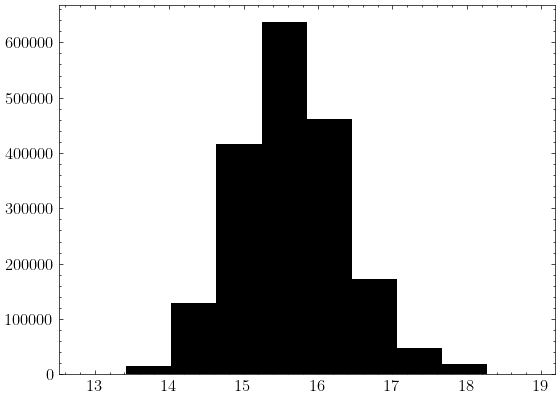

In [332]:
plt.hist(cii_903_nuv.b_dist)

In [333]:
cii_903_nuv.get_EW(np.median(cii_903_nuv.b_dist), 0)

Integration window: [-34, 34]
EW, 1sig: -12, 16
EW-3sig: 47
logN-3sig: 13.7


In [334]:
cii_903_nuv.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c2_logT', 'it1c2_b_NT')

b_T, 1sig: 6.4, -2.0, +3.2
b_T, 3sig: <34.4
b, 1sig: 11.0, -2.0, +2.4


(array([3.011990e+05, 1.423781e+06, 1.446200e+05, 6.037000e+03,
        6.267000e+03, 8.323000e+03, 5.251000e+03, 2.898000e+03,
        1.565000e+03, 5.900000e+01]),
 array([ 3.77666868,  9.05646708, 14.33626548, 19.61606388, 24.89586228,
        30.17566067, 35.45545907, 40.73525747, 46.01505587, 51.29485427,
        56.57465267]),
 <BarContainer object of 10 artists>)

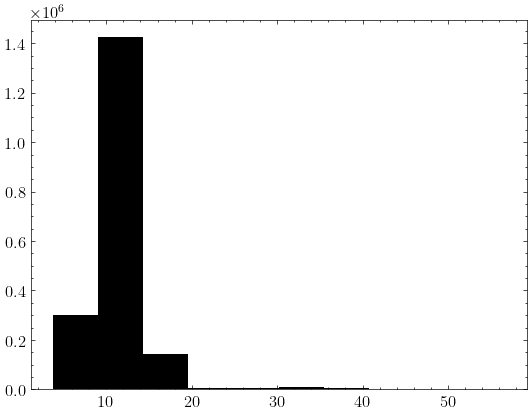

In [335]:
plt.hist(cii_903_nuv.b_dist)

In [336]:
cii_903_nuv.get_EW(np.median(cii_903_nuv.b_dist), 20.3)

Integration window: [-6, 46]
EW, 1sig: 10, 13
EW-3sig: 40
logN-3sig: 13.7


In [337]:
cii_903_nuv.get_EW_total(-34,46)

Integration window: [-34, 46]
EW, 1sig: 1, 17
EW-3sig: 51


## CII 1036 (STIS)

In [338]:
cii_1036_stis = ion_transition('CII', 1036, 'C', z_sys, 'STIS')

In [339]:
cii_1036_stis.grab_ion_transition_info()

In [340]:
cii_1036_stis.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-270],[250,300]])

In [341]:
cii_1036_stis.cont_norm_flux(v_abs_range=[-100,100], degree=1)

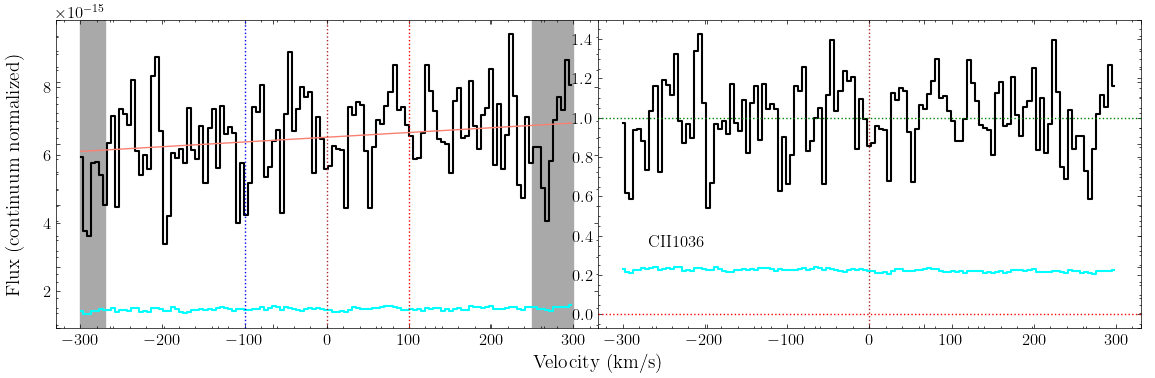

In [342]:
fig, ax = cii_1036_stis.plot_ion_transition_spec_cont()

In [343]:
cii_1036_stis.grab_ion_transition_lsf(lsf_fits_list)

In [344]:
cii_1036_stis.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c1_logT', 'it1c1_b_NT')

b_T, 1sig: 6.4, -0.5, +0.6
b_T, 3sig: <8.1
b, 1sig: 15.6, -0.7, +0.7


(array([   725.,  15402., 128406., 417006., 636067., 461651., 172933.,
         48117.,  18367.,   1326.]),
 array([12.8186465 , 13.42445675, 14.030267  , 14.63607725, 15.24188749,
        15.84769774, 16.45350799, 17.05931824, 17.66512848, 18.27093873,
        18.87674898]),
 <BarContainer object of 10 artists>)

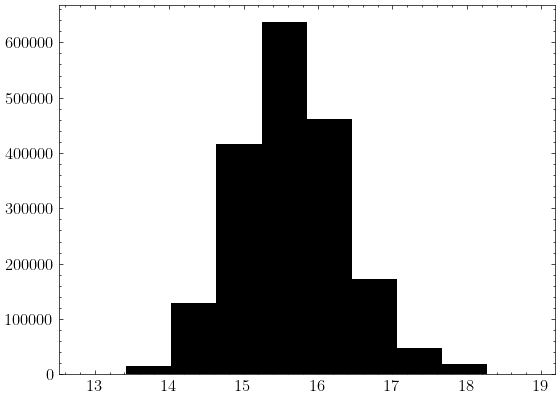

In [345]:
plt.hist(cii_1036_stis.b_dist)

In [346]:
cii_1036_stis.get_EW(np.median(cii_1036_stis.b_dist), 0)

Integration window: [-28, 28]
EW, 1sig: 2, 12
EW-3sig: 35
logN-3sig: 13.6


In [347]:
cii_1036_stis.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c2_logT', 'it1c2_b_NT')

b_T, 1sig: 6.4, -2.0, +3.2
b_T, 3sig: <34.4
b, 1sig: 11.0, -2.0, +2.4


(array([3.011990e+05, 1.423781e+06, 1.446200e+05, 6.037000e+03,
        6.267000e+03, 8.323000e+03, 5.251000e+03, 2.898000e+03,
        1.565000e+03, 5.900000e+01]),
 array([ 3.77666868,  9.05646708, 14.33626548, 19.61606388, 24.89586228,
        30.17566067, 35.45545907, 40.73525747, 46.01505587, 51.29485427,
        56.57465267]),
 <BarContainer object of 10 artists>)

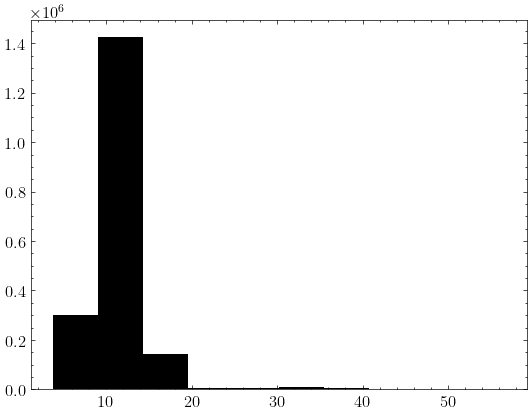

In [348]:
plt.hist(cii_1036_stis.b_dist)

In [349]:
cii_1036_stis.get_EW(np.median(cii_1036_stis.b_dist), 20.3)

Integration window: [0, 41]
EW, 1sig: 7, 10
EW-3sig: 29
logN-3sig: 13.5


In [350]:
cii_1036_stis.get_EW_total(-28,41)

Integration window: [-28, 41]
EW, 1sig: 3, 13
EW-3sig: 40


# CIII (re-c2: upper limit)

## CIII 977 (STIS)

In [351]:
ciii_977_stis = ion_transition('CIII', 977, 'C', z_sys, 'STIS')

In [352]:
ciii_977_stis.grab_ion_transition_info()

In [353]:
ciii_977_stis.grab_ion_transition_spec(spec_fits_list)

In [354]:
ciii_977_stis.cont_norm_flux(v_abs_range=[-150,100], degree=1)

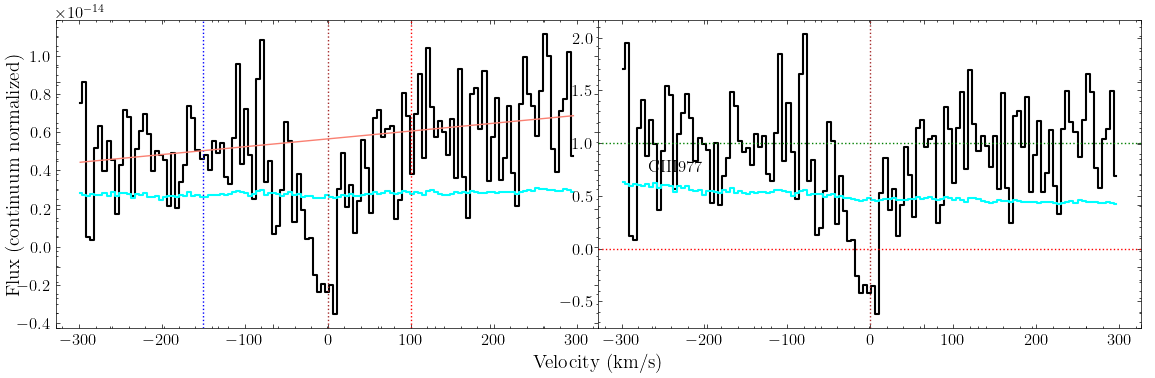

In [355]:
fig, ax = ciii_977_stis.plot_ion_transition_spec_cont()

In [356]:
ciii_977_stis.grab_ion_transition_lsf(lsf_fits_list)

In [357]:
ciii_977_stis.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c2_logT', 'it1c2_b_NT')

b_T, 1sig: 6.4, -2.0, +3.2
b_T, 3sig: <34.4
b, 1sig: 11.0, -2.0, +2.4


(array([3.011990e+05, 1.423781e+06, 1.446200e+05, 6.037000e+03,
        6.267000e+03, 8.323000e+03, 5.251000e+03, 2.898000e+03,
        1.565000e+03, 5.900000e+01]),
 array([ 3.77666868,  9.05646708, 14.33626548, 19.61606388, 24.89586228,
        30.17566067, 35.45545907, 40.73525747, 46.01505587, 51.29485427,
        56.57465267]),
 <BarContainer object of 10 artists>)

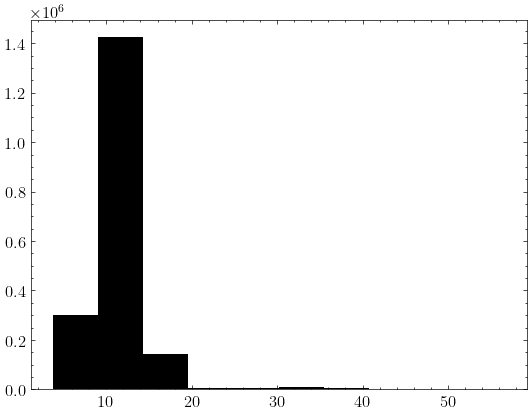

In [358]:
plt.hist(ciii_977_stis.b_dist)

In [359]:
ciii_977_stis.get_EW(np.median(ciii_977_stis.b_dist), 20.3)

Integration window: [1, 40]
EW, 1sig: 88, 20
EW-3sig: 59
logN-3sig: 13.2


# NII

## NII 1083 (STIS)

In [360]:
nii_1083_stis = ion_transition('NII', 1083, 'N', z_sys, 'STIS')

In [361]:
nii_1083_stis.grab_ion_transition_info()

In [362]:
nii_1083_stis.grab_ion_transition_spec(spec_fits_list, masks=[[-270,-85]])

In [363]:
nii_1083_stis.cont_norm_flux(v_abs_range=[-100,100], degree=1)

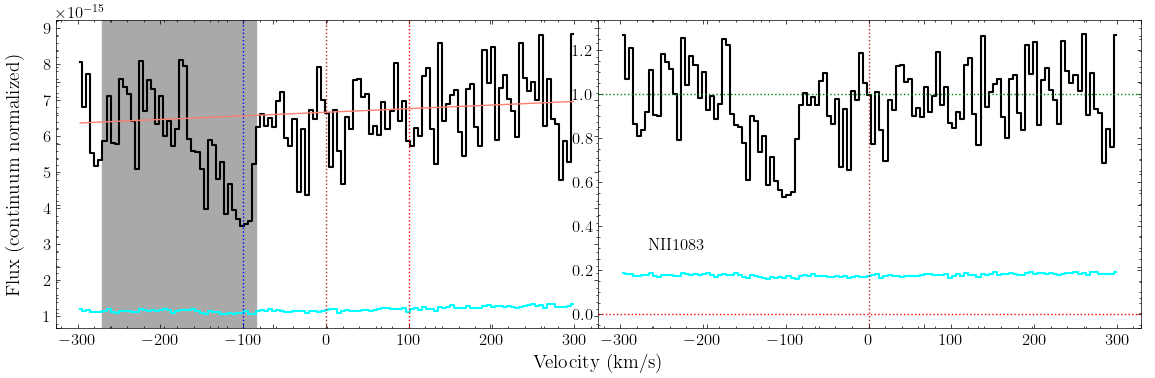

In [364]:
fig, ax = nii_1083_stis.plot_ion_transition_spec_cont()

In [365]:
nii_1083_stis.grab_ion_transition_lsf(lsf_fits_list)

In [366]:
nii_1083_stis.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c1_logT', 'it1c1_b_NT')

b_T, 1sig: 5.9, -0.5, +0.5
b_T, 3sig: <7.5
b, 1sig: 15.4, -0.7, +0.7


(array([   871.,  16665., 131023., 415240., 629257., 460787., 176725.,
         49045.,  18818.,   1569.]),
 array([12.6004755 , 13.21209657, 13.82371763, 14.43533869, 15.04695975,
        15.65858081, 16.27020187, 16.88182294, 17.493444  , 18.10506506,
        18.71668612]),
 <BarContainer object of 10 artists>)

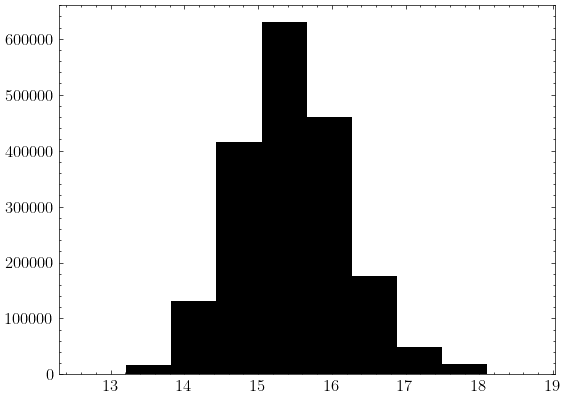

In [367]:
plt.hist(nii_1083_stis.b_dist)

In [368]:
nii_1083_stis.get_EW(np.median(nii_1083_stis.b_dist), 0)

Integration window: [-28, 28]
EW, 1sig: 14, 10
EW-3sig: 29
logN-3sig: 13.4


In [369]:
nii_1083_stis.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c2_logT', 'it1c2_b_NT')

b_T, 1sig: 5.9, -1.8, +3.0
b_T, 3sig: <31.9
b, 1sig: 10.7, -2.0, +2.5


(array([3.028870e+05, 1.406058e+06, 1.606690e+05, 6.231000e+03,
        6.502000e+03, 9.097000e+03, 4.092000e+03, 2.639000e+03,
        1.595000e+03, 2.300000e+02]),
 array([ 3.49874251,  8.69591045, 13.89307839, 19.09024634, 24.28741428,
        29.48458222, 34.68175016, 39.87891811, 45.07608605, 50.27325399,
        55.47042193]),
 <BarContainer object of 10 artists>)

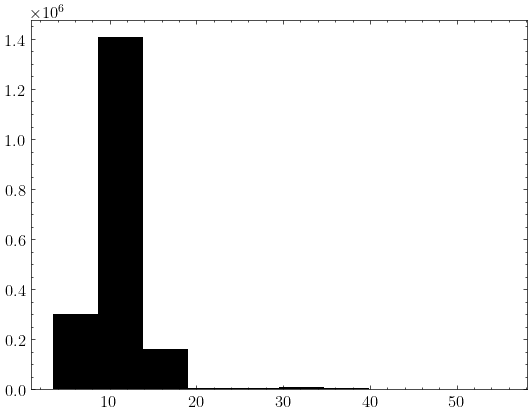

In [370]:
plt.hist(nii_1083_stis.b_dist)

In [371]:
nii_1083_stis.get_EW(np.median(nii_1083_stis.b_dist), 20.3)

Integration window: [0, 41]
EW, 1sig: 12, 9
EW-3sig: 26
logN-3sig: 13.4


In [372]:
nii_1083_stis.get_EW_total(-28,41)

Integration window: [-28, 41]
EW, 1sig: 14, 11
EW-3sig: 33


# NIV (re-c2: upper limit)

## NIV 765

In [373]:
niv_765_fuv = ion_transition('NIV', 765, 'N', z_sys, 'FUV')

In [374]:
niv_765_fuv.grab_ion_transition_info()

In [375]:
niv_765_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-195],[195,300]])

In [376]:
niv_765_fuv.cont_norm_flux(v_abs_range=[-60,60], degree=1)

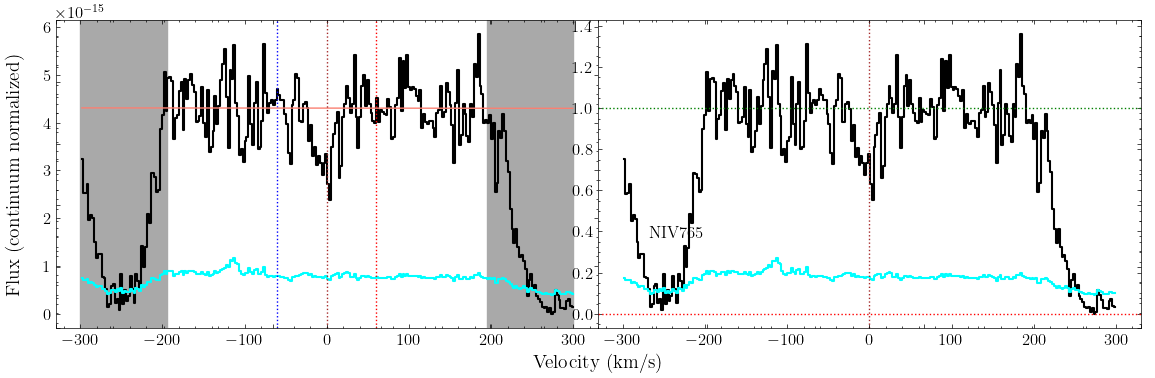

In [377]:
fig, ax = niv_765_fuv.plot_ion_transition_spec_cont()

In [378]:
niv_765_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [379]:
niv_765_fuv.init_ion_transition(init_values = np.array([[13,11,0]]), 
                             lsf_convolve = True)

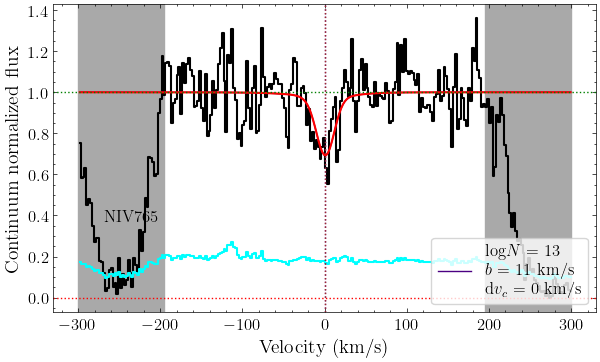

In [380]:
# Inversion back to optical depth fails if logN=14
fig, ax = niv_765_fuv.plot_ion_transition_init_fit()

In [381]:
niv_765_fuv.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c2_logT', 'it1c2_b_NT')

b_T, 1sig: 5.9, -1.8, +3.0
b_T, 3sig: <31.9
b, 1sig: 10.7, -2.0, +2.5


(array([3.028870e+05, 1.406058e+06, 1.606690e+05, 6.231000e+03,
        6.502000e+03, 9.097000e+03, 4.092000e+03, 2.639000e+03,
        1.595000e+03, 2.300000e+02]),
 array([ 3.49874251,  8.69591045, 13.89307839, 19.09024634, 24.28741428,
        29.48458222, 34.68175016, 39.87891811, 45.07608605, 50.27325399,
        55.47042193]),
 <BarContainer object of 10 artists>)

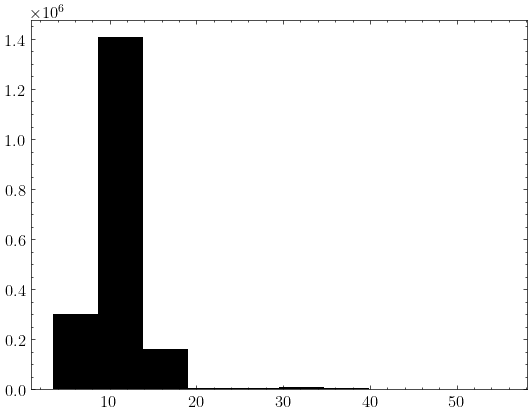

In [382]:
plt.hist(niv_765_fuv.b_dist)

In [383]:
niv_765_fuv.get_EW(np.median(niv_765_fuv.b_dist), 20.3)

Integration window: [-6, 46]
EW, 1sig: 14, 5
EW-3sig: 15
logN-3sig: 12.7


# NV

## NV 1242 (STIS)

In [384]:
nv_1242_stis = ion_transition('NV', 1242, 'N', z_sys, 'STIS')

In [385]:
nv_1242_stis.grab_ion_transition_info()

In [386]:
nv_1242_stis.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-280]])

In [387]:
nv_1242_stis.cont_norm_flux(v_abs_range=[-100,100], degree=1)

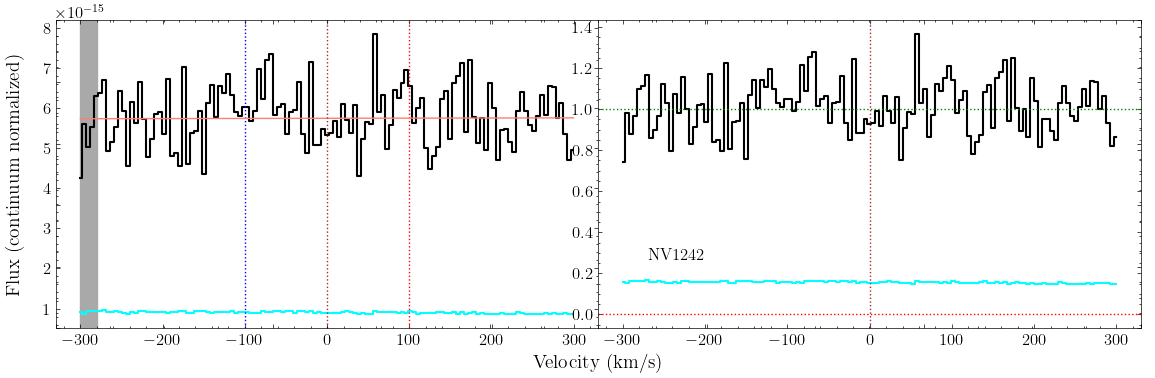

In [388]:
fig, ax = nv_1242_stis.plot_ion_transition_spec_cont()

In [389]:
nv_1242_stis.grab_ion_transition_lsf(lsf_fits_list)

In [390]:
nv_1242_stis.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c1_logT', 'it1c1_b_NT')

b_T, 1sig: 5.9, -0.5, +0.5
b_T, 3sig: <7.5
b, 1sig: 15.4, -0.7, +0.7


(array([   871.,  16665., 131023., 415240., 629257., 460787., 176725.,
         49045.,  18818.,   1569.]),
 array([12.6004755 , 13.21209657, 13.82371763, 14.43533869, 15.04695975,
        15.65858081, 16.27020187, 16.88182294, 17.493444  , 18.10506506,
        18.71668612]),
 <BarContainer object of 10 artists>)

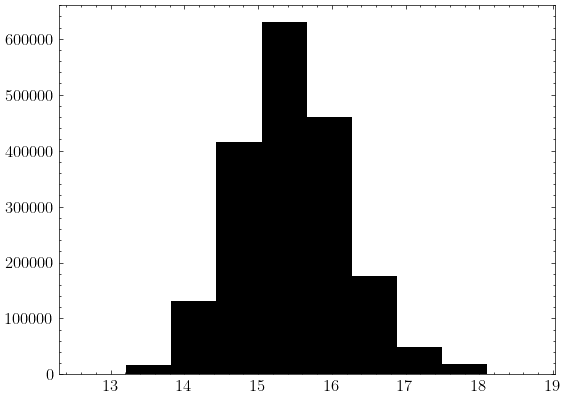

In [391]:
plt.hist(nv_1242_stis.b_dist)

In [392]:
nv_1242_stis.get_EW(np.median(nv_1242_stis.b_dist), 0)

Integration window: [-27, 27]
EW, 1sig: 7, 10
EW-3sig: 30
logN-3sig: 13.5


In [393]:
nv_1242_stis.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c2_logT', 'it1c2_b_NT')

b_T, 1sig: 5.9, -1.8, +3.0
b_T, 3sig: <31.9
b, 1sig: 10.7, -2.0, +2.5


(array([3.028870e+05, 1.406058e+06, 1.606690e+05, 6.231000e+03,
        6.502000e+03, 9.097000e+03, 4.092000e+03, 2.639000e+03,
        1.595000e+03, 2.300000e+02]),
 array([ 3.49874251,  8.69591045, 13.89307839, 19.09024634, 24.28741428,
        29.48458222, 34.68175016, 39.87891811, 45.07608605, 50.27325399,
        55.47042193]),
 <BarContainer object of 10 artists>)

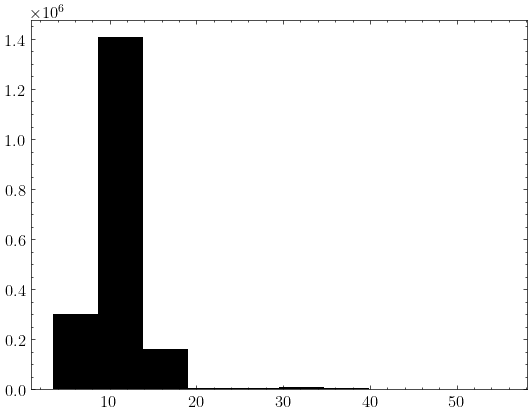

In [394]:
plt.hist(nv_1242_stis.b_dist)

In [395]:
nv_1242_stis.get_EW(np.median(nv_1242_stis.b_dist), 20.3)

Integration window: [0, 40]
EW, 1sig: 2, 8
EW-3sig: 25
logN-3sig: 13.4


In [396]:
nv_1242_stis.get_EW_total(-27,40)

Integration window: [-27, 40]
EW, 1sig: 7, 11
EW-3sig: 34


# OII

## OII 834

In [397]:
oii_834_fuv = ion_transition('OII', 834, 'O', z_sys, 'FUV')

In [398]:
oii_834_fuv.grab_ion_transition_info()

In [399]:
oii_834_fuv.grab_ion_transition_spec(spec_fits_list)

In [400]:
oii_834_fuv.cont_norm_flux(v_abs_range=[-100,100], degree=1)

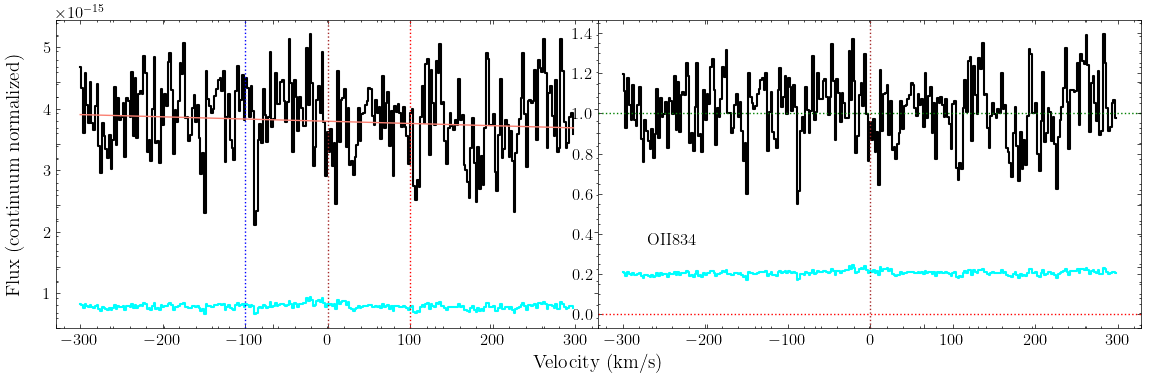

In [401]:
fig, ax = oii_834_fuv.plot_ion_transition_spec_cont()

In [402]:
oii_834_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [403]:
oii_834_fuv.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c1_logT', 'it1c1_b_NT')

b_T, 1sig: 5.5, -0.5, +0.5
b_T, 3sig: <7.0
b, 1sig: 15.3, -0.7, +0.8


(array([   975.,  18042., 134786., 416022., 625117., 458252., 176829.,
         49452.,  18867.,   1658.]),
 array([12.43482414, 13.05222164, 13.66961914, 14.28701664, 14.90441414,
        15.52181165, 16.13920915, 16.75660665, 17.37400415, 17.99140165,
        18.60879915]),
 <BarContainer object of 10 artists>)

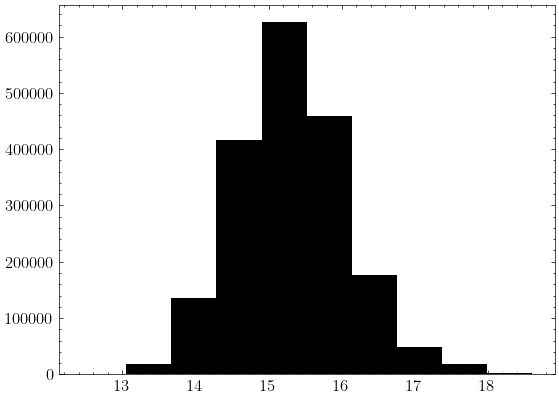

In [404]:
plt.hist(oii_834_fuv.b_dist)

In [405]:
oii_834_fuv.get_EW(np.median(oii_834_fuv.b_dist), 0)

Integration window: [-32, 32]
EW, 1sig: -1, 7
EW-3sig: 21
logN-3sig: 13.5


In [406]:
oii_834_fuv.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c2_logT', 'it1c2_b_NT')

b_T, 1sig: 5.5, -1.7, +2.8
b_T, 3sig: <29.8
b, 1sig: 10.4, -2.0, +2.5


(array([3.096200e+05, 1.383247e+06, 1.766070e+05, 6.632000e+03,
        6.823000e+03, 9.358000e+03, 3.371000e+03, 2.404000e+03,
        1.655000e+03, 2.830000e+02]),
 array([ 3.27417346,  8.4097646 , 13.54535574, 18.68094687, 23.81653801,
        28.95212915, 34.08772029, 39.22331143, 44.35890257, 49.4944937 ,
        54.63008484]),
 <BarContainer object of 10 artists>)

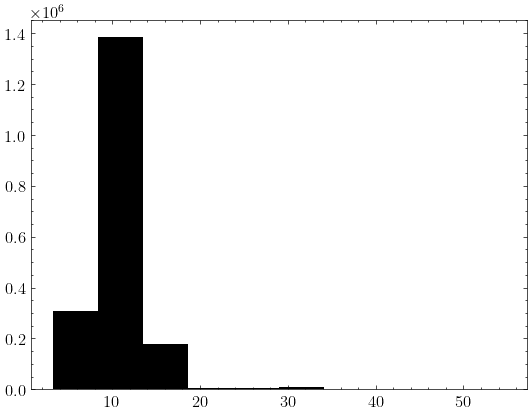

In [407]:
plt.hist(oii_834_fuv.b_dist)

In [408]:
oii_834_fuv.get_EW(np.median(oii_834_fuv.b_dist), 20.3)

Integration window: [-5, 45]
EW, 1sig: 9, 6
EW-3sig: 18
logN-3sig: 13.4


In [409]:
oii_834_fuv.get_EW_total(-32,45)

Integration window: [-32, 45]
EW, 1sig: 2, 8
EW-3sig: 23


# NeVI

## NeVI 558

In [410]:
nevi_558_fuv = ion_transition('NeVI', 558, 'Ne', z_sys, 'FUV')

In [411]:
nevi_558_fuv.grab_ion_transition_info()

In [412]:
nevi_558_fuv.grab_ion_transition_spec(spec_fits_list)

In [413]:
nevi_558_fuv.cont_norm_flux(v_abs_range=[-100,100], degree=1)

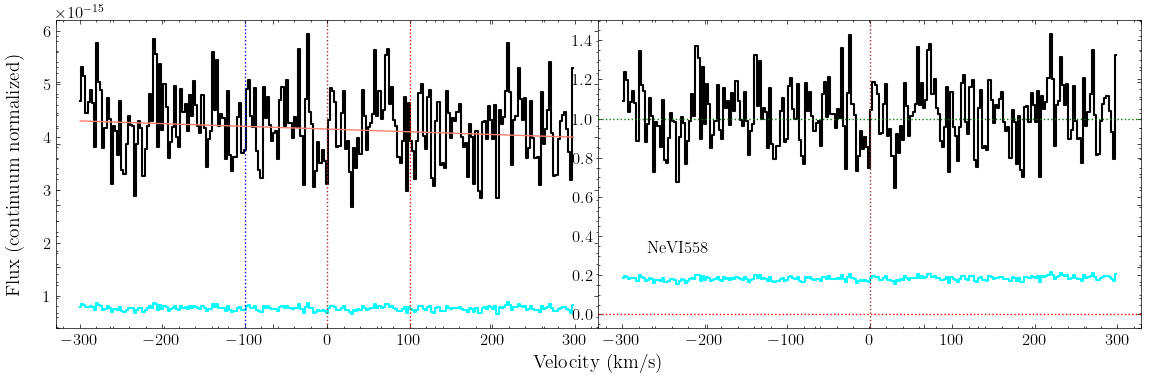

In [414]:
fig, ax = nevi_558_fuv.plot_ion_transition_spec_cont()

In [415]:
nevi_558_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [418]:
nevi_558_fuv.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c1_logT', 'it1c1_b_NT')

b_T, 1sig: 4.9, -0.4, +0.4
b_T, 3sig: <6.3
b, 1sig: 15.1, -0.7, +0.8


(array([  1172.,  20913., 141736., 421275., 620387., 449466., 175356.,
         49316.,  18739.,   1640.]),
 array([12.1886361 , 12.81636105, 13.444086  , 14.07181094, 14.69953589,
        15.32726084, 15.95498579, 16.58271073, 17.21043568, 17.83816063,
        18.46588558]),
 <BarContainer object of 10 artists>)

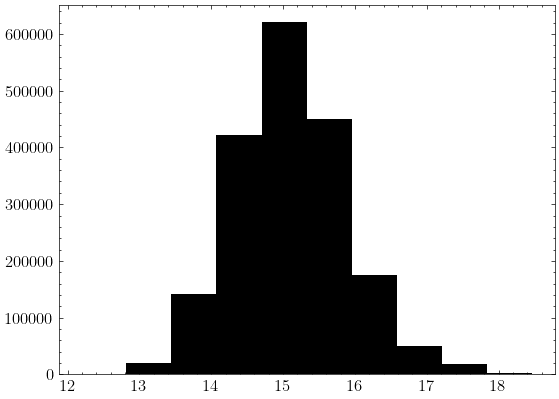

In [419]:
plt.hist(nevi_558_fuv.b_dist)

In [420]:
nevi_558_fuv.get_EW(np.median(nevi_558_fuv.b_dist), 0)

Integration window: [-35, 35]
EW, 1sig: 2, 4
EW-3sig: 13
logN-3sig: 13.8


In [423]:
nevi_558_fuv.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c2_logT', 'it1c2_b_NT')

b_T, 1sig: 4.9, -1.5, +2.5
b_T, 3sig: <26.6
b, 1sig: 10.0, -2.1, +2.6


(array([3.282630e+05, 1.333339e+06, 2.074030e+05, 7.589000e+03,
        8.049000e+03, 7.807000e+03, 3.262000e+03, 2.117000e+03,
        1.651000e+03, 5.200000e+02]),
 array([ 2.91495003,  7.96124889, 13.00754775, 18.0538466 , 23.10014546,
        28.14644432, 33.19274318, 38.23904204, 43.2853409 , 48.33163976,
        53.37793862]),
 <BarContainer object of 10 artists>)

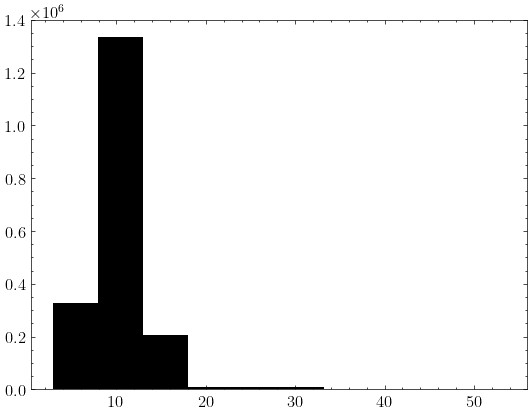

In [424]:
plt.hist(nevi_558_fuv.b_dist)

In [425]:
nevi_558_fuv.get_EW(np.median(nevi_558_fuv.b_dist), 20.3)

Integration window: [-8, 48]
EW, 1sig: 4, 4
EW-3sig: 11
logN-3sig: 13.7


In [426]:
nevi_558_fuv.get_EW_total(-35,48)

Integration window: [-35, 48]
EW, 1sig: 3, 5
EW-3sig: 14


# NeVIII

## NeVIII 780

In [427]:
neviii_780_fuv = ion_transition('NeVIII', 780, 'Ne', z_sys, 'FUV')

In [428]:
neviii_780_fuv.grab_ion_transition_info()

In [429]:
neviii_780_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-200,-50]])

In [430]:
neviii_780_fuv.cont_norm_flux(v_abs_range=[-100,100], degree=1)

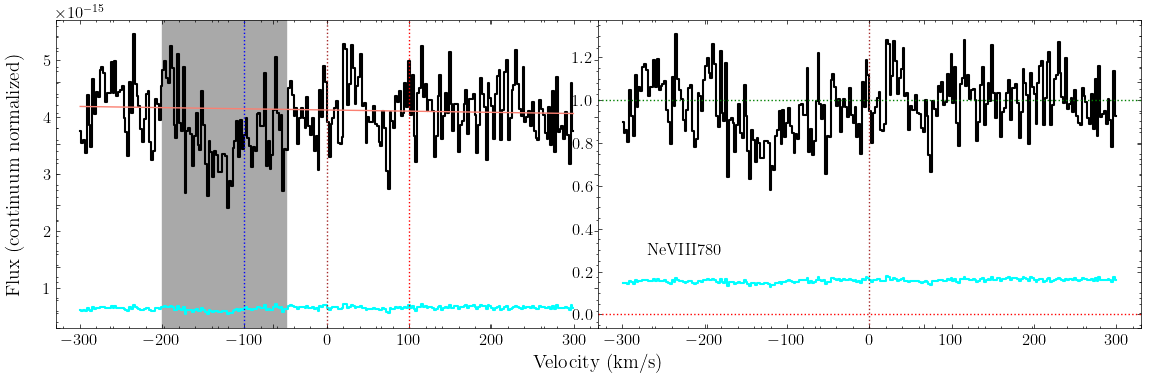

In [431]:
fig, ax = neviii_780_fuv.plot_ion_transition_spec_cont()

In [432]:
neviii_780_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [433]:
neviii_780_fuv.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c1_logT', 'it1c1_b_NT')

b_T, 1sig: 4.9, -0.4, +0.4
b_T, 3sig: <6.3
b, 1sig: 15.1, -0.7, +0.8


(array([  1172.,  20913., 141736., 421275., 620387., 449466., 175356.,
         49316.,  18739.,   1640.]),
 array([12.1886361 , 12.81636105, 13.444086  , 14.07181094, 14.69953589,
        15.32726084, 15.95498579, 16.58271073, 17.21043568, 17.83816063,
        18.46588558]),
 <BarContainer object of 10 artists>)

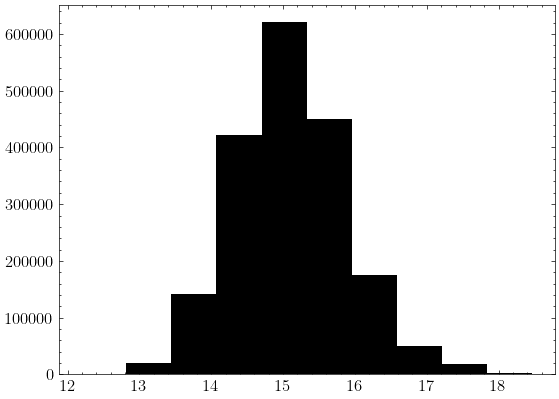

In [434]:
plt.hist(neviii_780_fuv.b_dist)

In [435]:
neviii_780_fuv.get_EW(np.median(neviii_780_fuv.b_dist), 0)

Integration window: [-33, 33]
EW, 1sig: 1, 5
EW-3sig: 15
logN-3sig: 13.8


In [436]:
neviii_780_fuv.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c2_logT', 'it1c2_b_NT')

b_T, 1sig: 4.9, -1.5, +2.5
b_T, 3sig: <26.6
b, 1sig: 10.0, -2.1, +2.6


(array([3.282630e+05, 1.333339e+06, 2.074030e+05, 7.589000e+03,
        8.049000e+03, 7.807000e+03, 3.262000e+03, 2.117000e+03,
        1.651000e+03, 5.200000e+02]),
 array([ 2.91495003,  7.96124889, 13.00754775, 18.0538466 , 23.10014546,
        28.14644432, 33.19274318, 38.23904204, 43.2853409 , 48.33163976,
        53.37793862]),
 <BarContainer object of 10 artists>)

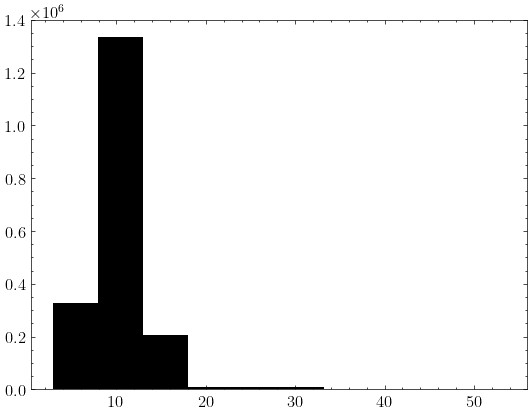

In [437]:
plt.hist(neviii_780_fuv.b_dist)

In [438]:
neviii_780_fuv.get_EW(np.median(neviii_780_fuv.b_dist), 20.3)

Integration window: [-5, 46]
EW, 1sig: -7, 4
EW-3sig: 13
logN-3sig: 13.7


In [439]:
neviii_780_fuv.get_EW_total(-33,46)

Integration window: [-33, 46]
EW, 1sig: -3, 6
EW-3sig: 17


# MgII

## MgII 2796 (HIRES)

In [440]:
mgii_2796_hires = ion_transition('MgII', 2796, 'Mg', z_sys, 'HIRES')

In [441]:
mgii_2796_hires.grab_ion_transition_info()

In [442]:
mgii_2796_hires.grab_ion_transition_spec(spec_fits_list)

In [443]:
mgii_2796_hires.cont_norm_flux(v_abs_range=[-100,100], degree=1)

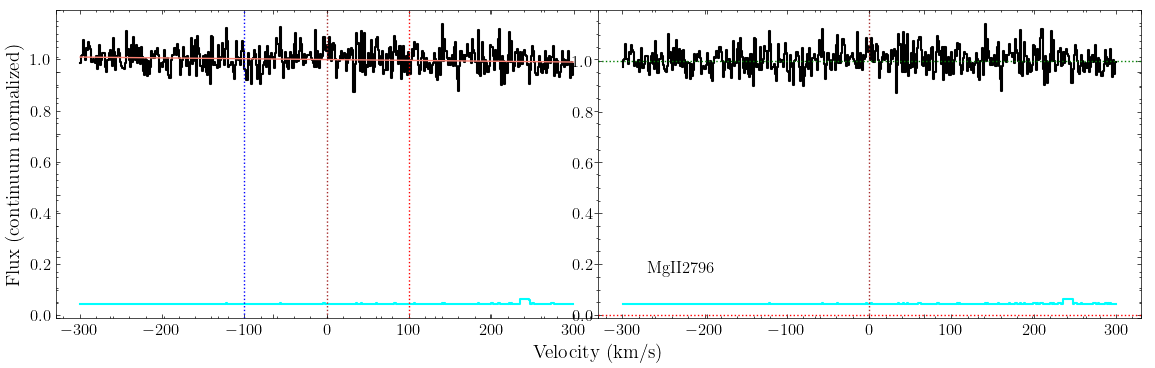

In [444]:
fig, ax = mgii_2796_hires.plot_ion_transition_spec_cont()

In [445]:
mgii_2796_hires.grab_ion_transition_lsf(lsf_fits_list)

In [446]:
mgii_2796_hires.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c1_logT', 'it1c1_b_NT')

b_T, 1sig: 4.5, -0.4, +0.4
b_T, 3sig: <5.7
b, 1sig: 14.9, -0.8, +0.8


(array([   879.,  17930., 130456., 405532., 622563., 464975., 185725.,
         51221.,  19111.,   1608.]),
 array([11.94335147, 12.58740776, 13.23146405, 13.87552034, 14.51957662,
        15.16363291, 15.8076892 , 16.45174549, 17.09580178, 17.73985807,
        18.38391435]),
 <BarContainer object of 10 artists>)

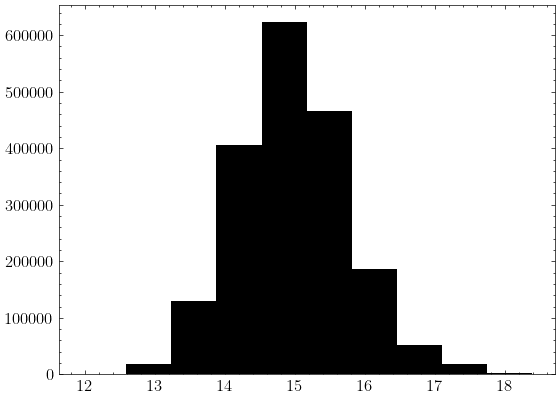

In [447]:
plt.hist(mgii_2796_hires.b_dist)

In [448]:
mgii_2796_hires.get_EW(np.median(mgii_2796_hires.b_dist), 0)

Integration window: [-25, 25]
EW, 1sig: -8, 3
EW-3sig: 10
logN-3sig: 11.4


In [449]:
mgii_2796_hires.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c2_logT', 'it1c2_b_NT')

b_T, 1sig: 4.5, -1.4, +2.3
b_T, 3sig: <24.2
b, 1sig: 9.7, -2.3, +2.7


(array([3.510440e+05, 1.285656e+06, 2.320960e+05, 8.479000e+03,
        8.828000e+03, 6.446000e+03, 3.136000e+03, 1.946000e+03,
        1.772000e+03, 5.970000e+02]),
 array([ 2.65603514,  7.65425117, 12.65246721, 17.65068325, 22.64889929,
        27.64711533, 32.64533136, 37.6435474 , 42.64176344, 47.63997948,
        52.63819552]),
 <BarContainer object of 10 artists>)

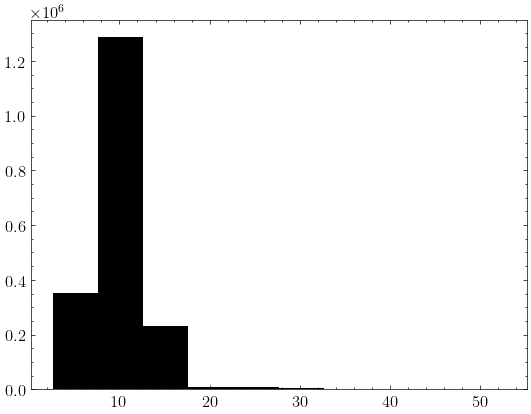

In [450]:
plt.hist(mgii_2796_hires.b_dist)

In [451]:
mgii_2796_hires.get_EW(np.median(mgii_2796_hires.b_dist), 20.3)

Integration window: [4, 36]
EW, 1sig: -2, 3
EW-3sig: 8
logN-3sig: 11.3


In [452]:
mgii_2796_hires.get_EW_total(-25,36)

Integration window: [-25, 36]
EW, 1sig: -8, 4
EW-3sig: 11


# MgX

## MgX 624

In [453]:
mgx_624_fuv = ion_transition('MgX', 624, 'Mg', z_sys, 'FUV')

In [454]:
mgx_624_fuv.grab_ion_transition_info()

In [455]:
mgx_624_fuv.grab_ion_transition_spec(spec_fits_list)

In [456]:
mgx_624_fuv.cont_norm_flux(v_abs_range=[-100,100], degree=1)

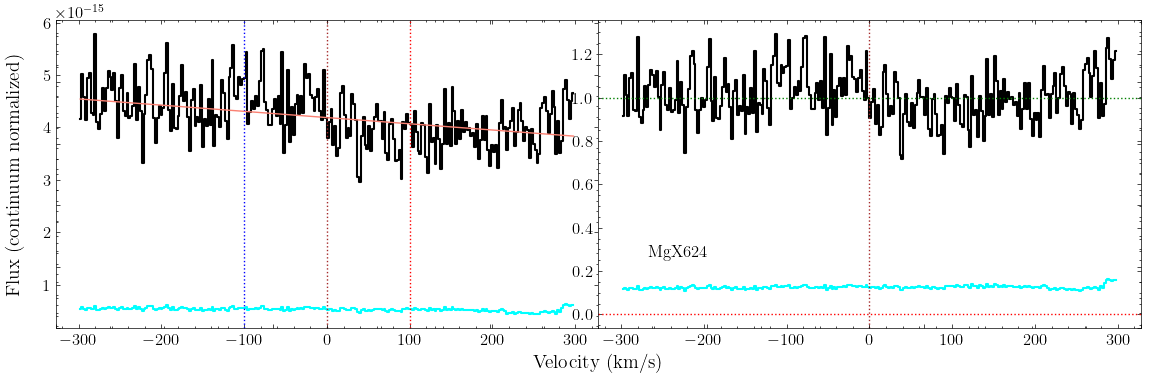

In [457]:
fig, ax = mgx_624_fuv.plot_ion_transition_spec_cont()

In [458]:
mgx_624_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [459]:
mgx_624_fuv.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c1_logT', 'it1c1_b_NT')

b_T, 1sig: 4.5, -0.4, +0.4
b_T, 3sig: <5.7
b, 1sig: 14.9, -0.8, +0.8


(array([   879.,  17930., 130456., 405532., 622563., 464975., 185725.,
         51221.,  19111.,   1608.]),
 array([11.94335147, 12.58740776, 13.23146405, 13.87552034, 14.51957662,
        15.16363291, 15.8076892 , 16.45174549, 17.09580178, 17.73985807,
        18.38391435]),
 <BarContainer object of 10 artists>)

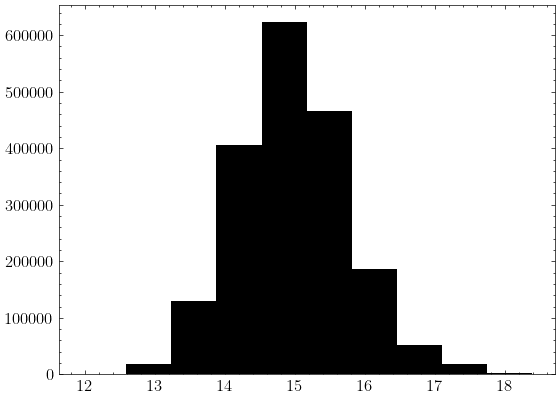

In [460]:
plt.hist(mgx_624_fuv.b_dist)

In [461]:
mgx_624_fuv.get_EW(np.median(mgx_624_fuv.b_dist), 0)

Integration window: [-33, 33]
EW, 1sig: -5, 3
EW-3sig: 10
logN-3sig: 13.9


In [462]:
mgx_624_fuv.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c2_logT', 'it1c2_b_NT')

b_T, 1sig: 4.5, -1.4, +2.3
b_T, 3sig: <24.2
b, 1sig: 9.7, -2.3, +2.7


(array([3.510440e+05, 1.285656e+06, 2.320960e+05, 8.479000e+03,
        8.828000e+03, 6.446000e+03, 3.136000e+03, 1.946000e+03,
        1.772000e+03, 5.970000e+02]),
 array([ 2.65603514,  7.65425117, 12.65246721, 17.65068325, 22.64889929,
        27.64711533, 32.64533136, 37.6435474 , 42.64176344, 47.63997948,
        52.63819552]),
 <BarContainer object of 10 artists>)

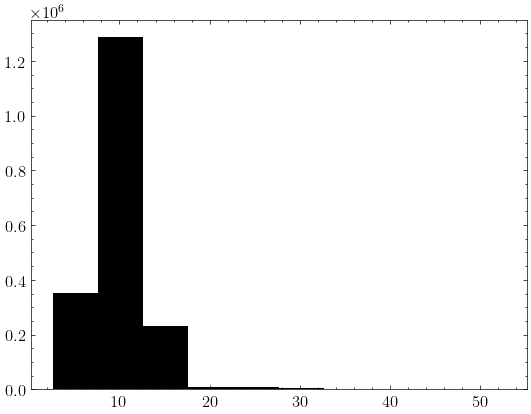

In [463]:
plt.hist(mgx_624_fuv.b_dist)

In [464]:
mgx_624_fuv.get_EW(np.median(mgx_624_fuv.b_dist), 20.3)

Integration window: [-5, 46]
EW, 1sig: 3, 3
EW-3sig: 8
logN-3sig: 13.8


In [465]:
mgx_624_fuv.get_EW_total(-33,46)

Integration window: [-33, 46]
EW, 1sig: -2, 3
EW-3sig: 10


# AlII

## AlII 1670 (HIRES)

In [466]:
alii_1670_hires = ion_transition('AlII', 1670, 'Al', z_sys, 'HIRES')

In [467]:
alii_1670_hires.grab_ion_transition_info()

In [468]:
alii_1670_hires.grab_ion_transition_spec(spec_fits_list, masks=[[-150, -120]])

In [469]:
alii_1670_hires.cont_norm_flux(v_abs_range=[-100,100], degree=1)

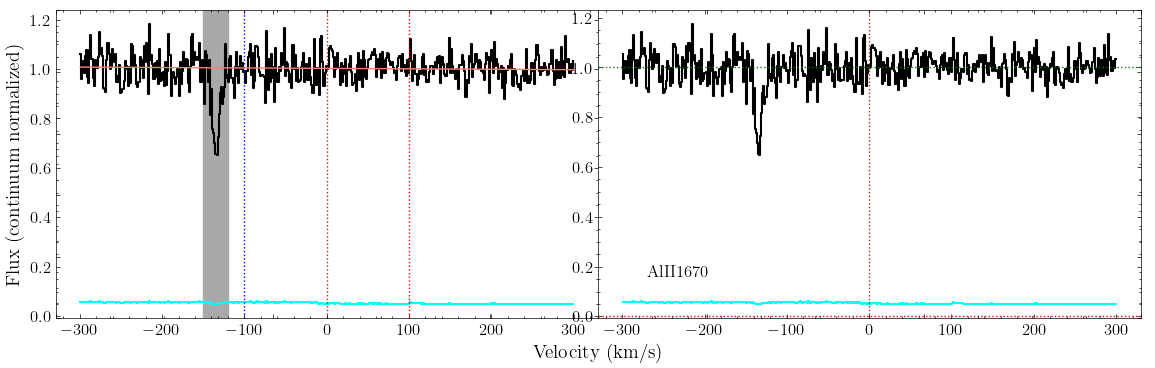

In [470]:
fig, ax = alii_1670_hires.plot_ion_transition_spec_cont()

In [471]:
alii_1670_hires.grab_ion_transition_lsf(lsf_fits_list)

In [472]:
alii_1670_hires.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c1_logT', 'it1c1_b_NT')

b_T, 1sig: 4.3, -0.4, +0.4
b_T, 3sig: <5.4
b, 1sig: 14.9, -0.8, +0.8


(array([   733.,  16686., 125489., 399616., 625572., 471356., 188507.,
         51505.,  19027.,   1509.]),
 array([11.8182436 , 12.4721794 , 13.1261152 , 13.780051  , 14.43398679,
        15.08792259, 15.74185839, 16.39579419, 17.04972999, 17.70366579,
        18.35760158]),
 <BarContainer object of 10 artists>)

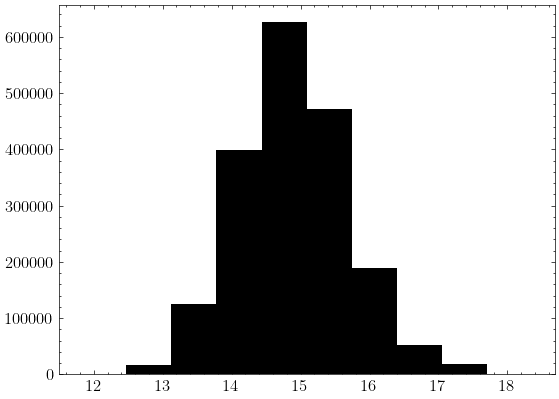

In [473]:
plt.hist(alii_1670_hires.b_dist)

In [474]:
alii_1670_hires.get_EW(np.median(alii_1670_hires.b_dist), 0)

Integration window: [-25, 25]
EW, 1sig: -1, 2
EW-3sig: 7
logN-3sig: 11.2


In [475]:
alii_1670_hires.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c2_logT', 'it1c2_b_NT')

b_T, 1sig: 4.3, -1.3, +2.1
b_T, 3sig: <23.0
b, 1sig: 9.6, -2.3, +2.7


(array([3.655360e+05, 1.258381e+06, 2.447770e+05, 9.265000e+03,
        8.506000e+03, 6.201000e+03, 3.020000e+03, 1.870000e+03,
        1.790000e+03, 6.540000e+02]),
 array([ 2.52085991,  7.50115714, 12.48145437, 17.4617516 , 22.44204884,
        27.42234607, 32.4026433 , 37.38294053, 42.36323776, 47.34353499,
        52.32383222]),
 <BarContainer object of 10 artists>)

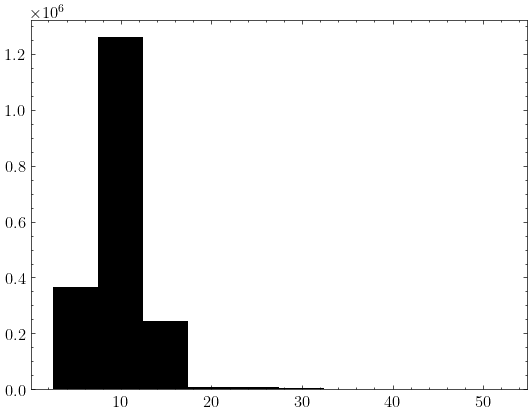

In [476]:
plt.hist(alii_1670_hires.b_dist)

In [477]:
alii_1670_hires.get_EW(np.median(alii_1670_hires.b_dist), 20.3)

Integration window: [5, 36]
EW, 1sig: 0, 2
EW-3sig: 5
logN-3sig: 11.1


In [478]:
alii_1670_hires.get_EW_total(-25,36)

Integration window: [-25, 36]
EW, 1sig: 0, 3
EW-3sig: 8


# AlIII

## AlIII 1862 (HIRES)

In [479]:
aliii_1862_hires = ion_transition('AlIII', 1862, 'Al', z_sys, 'HIRES')

In [480]:
aliii_1862_hires.grab_ion_transition_info()

In [481]:
aliii_1862_hires.grab_ion_transition_spec(spec_fits_list)

In [482]:
aliii_1862_hires.cont_norm_flux(v_abs_range=[-100,100], degree=1)

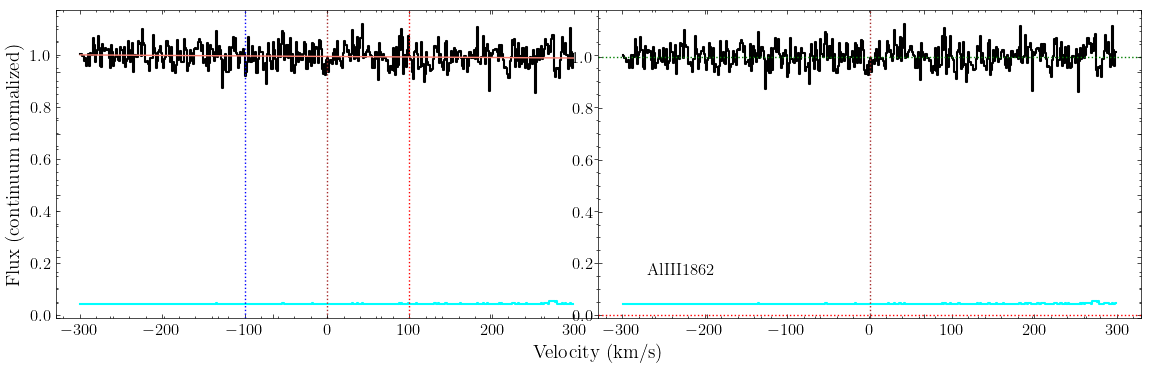

In [483]:
fig, ax = aliii_1862_hires.plot_ion_transition_spec_cont()

In [484]:
aliii_1862_hires.grab_ion_transition_lsf(lsf_fits_list)

In [485]:
aliii_1862_hires.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c1_logT', 'it1c1_b_NT')

b_T, 1sig: 4.3, -0.4, +0.4
b_T, 3sig: <5.4
b, 1sig: 14.9, -0.8, +0.8


(array([   733.,  16686., 125489., 399616., 625572., 471356., 188507.,
         51505.,  19027.,   1509.]),
 array([11.8182436 , 12.4721794 , 13.1261152 , 13.780051  , 14.43398679,
        15.08792259, 15.74185839, 16.39579419, 17.04972999, 17.70366579,
        18.35760158]),
 <BarContainer object of 10 artists>)

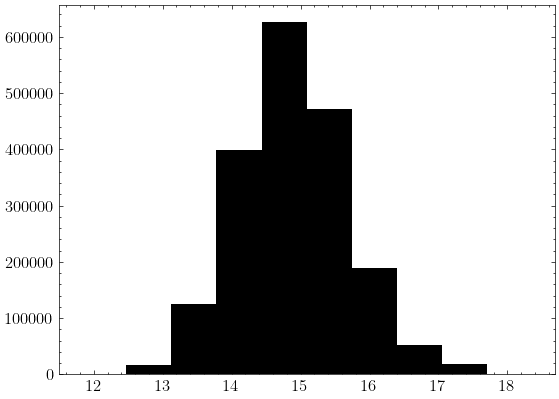

In [486]:
plt.hist(aliii_1862_hires.b_dist)

In [487]:
aliii_1862_hires.get_EW(np.median(aliii_1862_hires.b_dist), 0)

Integration window: [-25, 25]
EW, 1sig: 1, 2
EW-3sig: 6
logN-3sig: 11.9


In [488]:
aliii_1862_hires.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c2_logT', 'it1c2_b_NT')

b_T, 1sig: 4.3, -1.3, +2.1
b_T, 3sig: <23.0
b, 1sig: 9.6, -2.3, +2.7


(array([3.655360e+05, 1.258381e+06, 2.447770e+05, 9.265000e+03,
        8.506000e+03, 6.201000e+03, 3.020000e+03, 1.870000e+03,
        1.790000e+03, 6.540000e+02]),
 array([ 2.52085991,  7.50115714, 12.48145437, 17.4617516 , 22.44204884,
        27.42234607, 32.4026433 , 37.38294053, 42.36323776, 47.34353499,
        52.32383222]),
 <BarContainer object of 10 artists>)

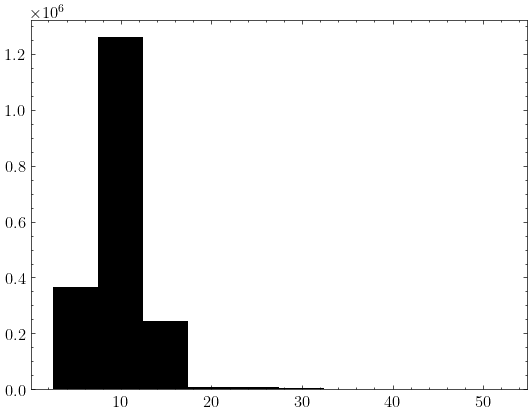

In [489]:
plt.hist(aliii_1862_hires.b_dist)

In [490]:
aliii_1862_hires.get_EW(np.median(aliii_1862_hires.b_dist), 20.3)

Integration window: [4, 36]
EW, 1sig: -2, 2
EW-3sig: 5
logN-3sig: 11.8


In [491]:
aliii_1862_hires.get_EW_total(-25,36)

Integration window: [-25, 36]
EW, 1sig: 0, 2
EW-3sig: 7


## AlIII 1854 (HIRES)

In [492]:
aliii_1854_hires = ion_transition('AlIII', 1854, 'Al', z_sys, 'HIRES')

In [493]:
aliii_1854_hires.grab_ion_transition_info()

In [494]:
aliii_1854_hires.grab_ion_transition_spec(spec_fits_list)

In [495]:
aliii_1854_hires.cont_norm_flux(v_abs_range=[-100,100], degree=1)

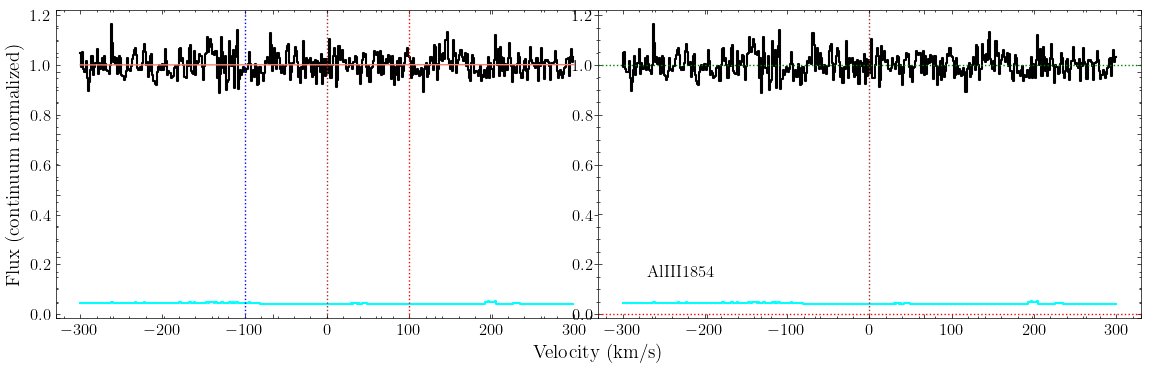

In [496]:
fig, ax = aliii_1854_hires.plot_ion_transition_spec_cont()

In [497]:
aliii_1854_hires.grab_ion_transition_lsf(lsf_fits_list)

In [498]:
tau_conv = -np.log(comp_model_spec_gen(aliii_1854_hires.v, np.array([[13, 14.9, 0]]), 
                                        aliii_1854_hires.wav0_rest, aliii_1854_hires.f, aliii_1854_hires.gamma, aliii_1854_hires.A,
                                        True,
                                        aliii_1854_hires.lsf, aliii_1854_hires.v_lsf)[1])

tau_fwhm_conv = 0.5*np.max(tau_conv)

tau_2_v_conv = interpolate.interp1d(x=tau_conv[aliii_1854_hires.v>0], y=aliii_1854_hires.v[aliii_1854_hires.v>0], fill_value='extrapolate')

fwhm_conv = 2*tau_2_v_conv([tau_fwhm_conv])[0]

In [499]:
tau_unconv = -np.log(comp_model_spec_gen(aliii_1854_hires.v, np.array([[13, 14.9, 0]]), 
                                        aliii_1854_hires.wav0_rest, aliii_1854_hires.f, aliii_1854_hires.gamma, aliii_1854_hires.A,
                                        False,
                                        aliii_1854_hires.lsf, aliii_1854_hires.v_lsf)[1])

tau_fwhm_unconv = 0.5*np.max(tau_unconv)

tau_2_v_unconv = interpolate.interp1d(x=tau_unconv[aliii_1854_hires.v>0], y=aliii_1854_hires.v[aliii_1854_hires.v>0], fill_value='extrapolate')

fwhm_unconv = 2*tau_2_v_unconv([tau_fwhm_unconv])[0]

In [500]:
fwhm_conv, fwhm_unconv

(24.904219898312068, 24.84922406829148)

(-100.0, 100.0)

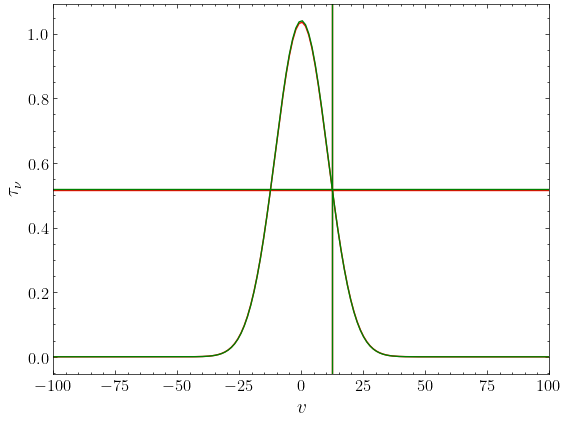

In [501]:
plt.plot(aliii_1854_hires.v, tau_conv, color='red')
plt.axhline(0.5*np.max(tau_conv), color='red')
plt.axvline(fwhm_conv/2, color='red')
plt.plot(aliii_1854_hires.v, tau_unconv, color='green')
plt.axhline(0.5*np.max(tau_unconv), color='green')
plt.axvline(fwhm_unconv/2, color='green')

plt.xlabel(r'$v$')
plt.ylabel(r'$\tau_\nu$')
plt.xlim(-100, 100)

In [502]:
aliii_1854_hires.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c1_logT', 'it1c1_b_NT')

b_T, 1sig: 4.3, -0.4, +0.4
b_T, 3sig: <5.4
b, 1sig: 14.9, -0.8, +0.8


(array([   733.,  16686., 125489., 399616., 625572., 471356., 188507.,
         51505.,  19027.,   1509.]),
 array([11.8182436 , 12.4721794 , 13.1261152 , 13.780051  , 14.43398679,
        15.08792259, 15.74185839, 16.39579419, 17.04972999, 17.70366579,
        18.35760158]),
 <BarContainer object of 10 artists>)

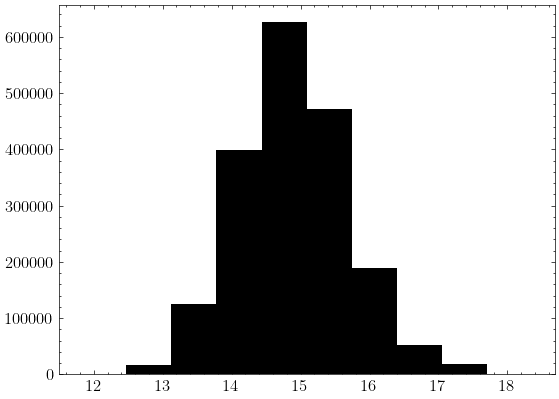

In [503]:
plt.hist(aliii_1854_hires.b_dist)

In [504]:
aliii_1854_hires.get_EW(np.median(aliii_1854_hires.b_dist), 0)

Integration window: [-25, 25]
EW, 1sig: 0, 2
EW-3sig: 6
logN-3sig: 11.5


In [505]:
aliii_1854_hires.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c2_logT', 'it1c2_b_NT')

b_T, 1sig: 4.3, -1.3, +2.1
b_T, 3sig: <23.0
b, 1sig: 9.6, -2.3, +2.7


(array([3.655360e+05, 1.258381e+06, 2.447770e+05, 9.265000e+03,
        8.506000e+03, 6.201000e+03, 3.020000e+03, 1.870000e+03,
        1.790000e+03, 6.540000e+02]),
 array([ 2.52085991,  7.50115714, 12.48145437, 17.4617516 , 22.44204884,
        27.42234607, 32.4026433 , 37.38294053, 42.36323776, 47.34353499,
        52.32383222]),
 <BarContainer object of 10 artists>)

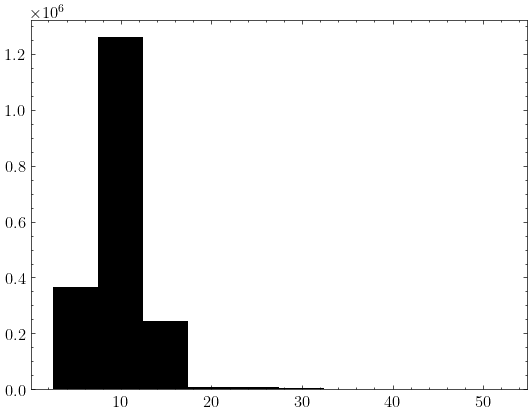

In [506]:
plt.hist(aliii_1854_hires.b_dist)

In [507]:
aliii_1854_hires.get_EW(np.median(aliii_1854_hires.b_dist), 20.3)

Integration window: [4, 36]
EW, 1sig: -1, 2
EW-3sig: 5
logN-3sig: 11.5


In [508]:
aliii_1854_hires.get_EW_total(-25,36)

Integration window: [-25, 36]
EW, 1sig: 0, 2
EW-3sig: 7


# SiII

## SiII 1260 (STIS)

In [509]:
siii_1260_stis = ion_transition('SiII', 1260, 'Si', z_sys, 'STIS')

In [510]:
siii_1260_stis.grab_ion_transition_info()

In [511]:
siii_1260_stis.grab_ion_transition_spec(spec_fits_list)

In [512]:
siii_1260_stis.cont_norm_flux(v_abs_range=[-100,100], degree=1)

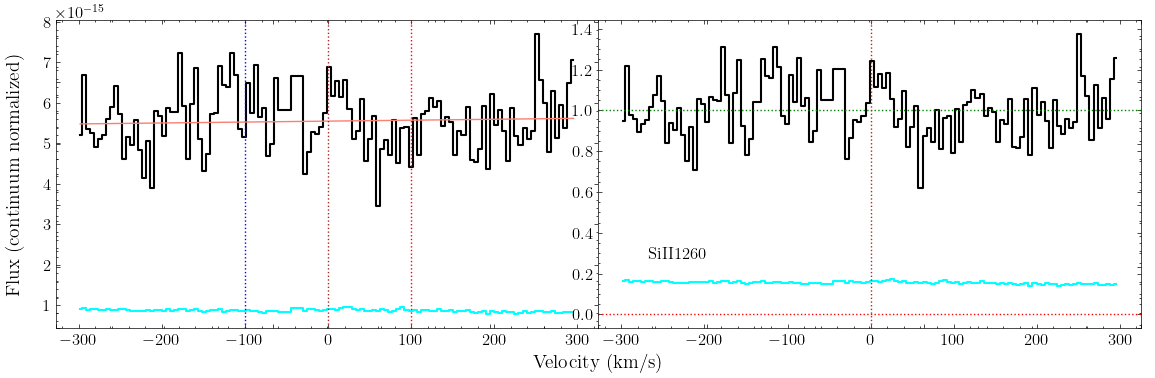

In [513]:
fig, ax = siii_1260_stis.plot_ion_transition_spec_cont()

In [514]:
siii_1260_stis.grab_ion_transition_lsf(lsf_fits_list)

In [515]:
siii_1260_stis.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c1_logT', 'it1c1_b_NT')

b_T, 1sig: 4.2, -0.4, +0.4
b_T, 3sig: <5.3
b, 1sig: 14.8, -0.8, +0.8


(array([   700.,  16267., 123899., 397057., 626466., 474013., 189511.,
         51662.,  18936.,   1489.]),
 array([11.77326587, 12.43075932, 13.08825278, 13.74574623, 14.40323969,
        15.06073314, 15.71822659, 16.37572005, 17.0332135 , 17.69070696,
        18.34820041]),
 <BarContainer object of 10 artists>)

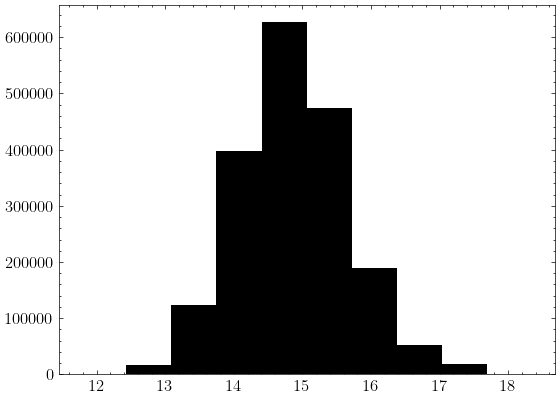

In [516]:
plt.hist(siii_1260_stis.b_dist)

In [517]:
siii_1260_stis.get_EW(np.median(siii_1260_stis.b_dist), 0)

Integration window: [-25, 25]
EW, 1sig: -8, 10
EW-3sig: 30
logN-3sig: 12.3


In [518]:
siii_1260_stis.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c2_logT', 'it1c2_b_NT')

b_T, 1sig: 4.2, -1.3, +2.1
b_T, 3sig: <22.5
b, 1sig: 9.5, -2.4, +2.8


(array([3.710890e+05, 1.248059e+06, 2.495150e+05, 9.602000e+03,
        8.235000e+03, 6.171000e+03, 3.008000e+03, 1.863000e+03,
        1.801000e+03, 6.570000e+02]),
 array([ 2.47082044,  7.44528882, 12.4197572 , 17.39422558, 22.36869396,
        27.34316234, 32.31763072, 37.2920991 , 42.26656748, 47.24103586,
        52.21550424]),
 <BarContainer object of 10 artists>)

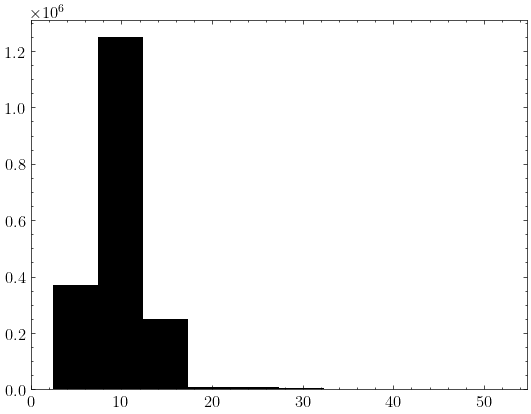

In [519]:
plt.hist(siii_1260_stis.b_dist)

In [520]:
siii_1260_stis.get_EW(np.median(siii_1260_stis.b_dist), 20.3)

Integration window: [4, 37]
EW, 1sig: -12, 8
EW-3sig: 25
logN-3sig: 12.2


In [521]:
siii_1260_stis.get_EW_total(-25,37)

Integration window: [-25, 37]
EW, 1sig: -12, 12
EW-3sig: 35





## SiII 1193 (STIS)

In [522]:
siii_1193_stis = ion_transition('SiII', 1193, 'Si', z_sys, 'STIS')

In [523]:
siii_1193_stis.grab_ion_transition_info()

In [524]:
siii_1193_stis.grab_ion_transition_spec(spec_fits_list, masks=[[260,300]])

In [525]:
siii_1193_stis.cont_norm_flux(v_abs_range=[-100,100], degree=1)

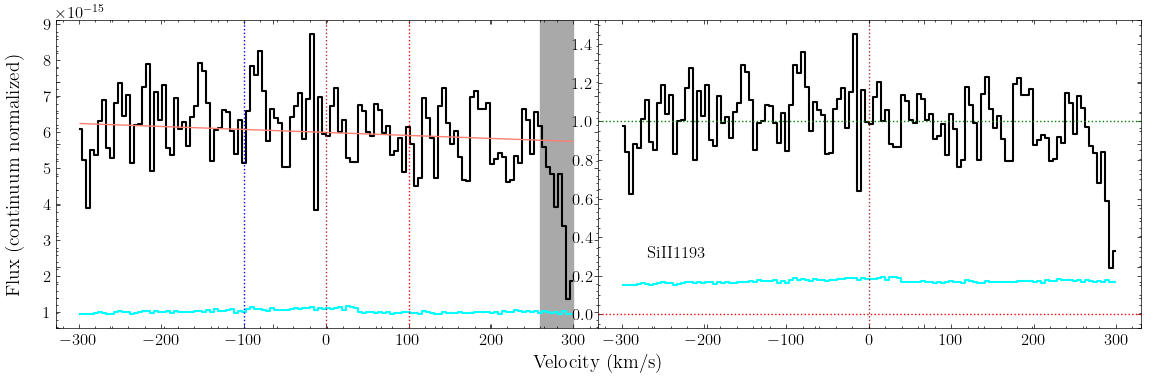

In [526]:
fig, ax = siii_1193_stis.plot_ion_transition_spec_cont()

In [527]:
siii_1193_stis.grab_ion_transition_lsf(lsf_fits_list)

In [528]:
siii_1193_stis.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c1_logT', 'it1c1_b_NT')

b_T, 1sig: 4.2, -0.4, +0.4
b_T, 3sig: <5.3
b, 1sig: 14.8, -0.8, +0.8


(array([   700.,  16267., 123899., 397057., 626466., 474013., 189511.,
         51662.,  18936.,   1489.]),
 array([11.77326587, 12.43075932, 13.08825278, 13.74574623, 14.40323969,
        15.06073314, 15.71822659, 16.37572005, 17.0332135 , 17.69070696,
        18.34820041]),
 <BarContainer object of 10 artists>)

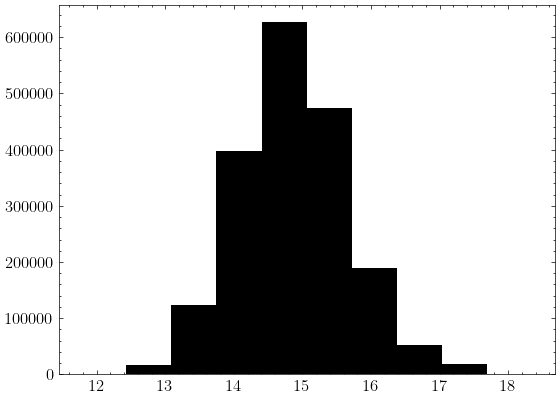

In [529]:
plt.hist(siii_1193_stis.b_dist)

In [530]:
siii_1193_stis.get_EW(np.median(siii_1193_stis.b_dist), 0)

Integration window: [-26, 26]
EW, 1sig: -14, 11
EW-3sig: 32
logN-3sig: 12.7


In [531]:
siii_1193_stis.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c2_logT', 'it1c2_b_NT')

b_T, 1sig: 4.2, -1.3, +2.1
b_T, 3sig: <22.5
b, 1sig: 9.5, -2.4, +2.8


(array([3.710890e+05, 1.248059e+06, 2.495150e+05, 9.602000e+03,
        8.235000e+03, 6.171000e+03, 3.008000e+03, 1.863000e+03,
        1.801000e+03, 6.570000e+02]),
 array([ 2.47082044,  7.44528882, 12.4197572 , 17.39422558, 22.36869396,
        27.34316234, 32.31763072, 37.2920991 , 42.26656748, 47.24103586,
        52.21550424]),
 <BarContainer object of 10 artists>)

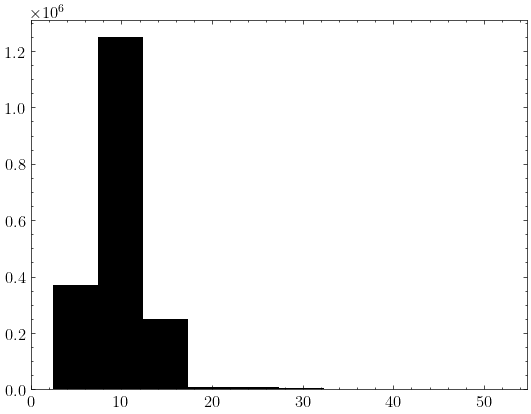

In [532]:
plt.hist(siii_1193_stis.b_dist)

In [533]:
siii_1193_stis.get_EW(np.median(siii_1193_stis.b_dist), 20.3)

Integration window: [3, 38]
EW, 1sig: -3, 9
EW-3sig: 27
logN-3sig: 12.6


In [534]:
siii_1193_stis.get_EW_total(-26,38)

Integration window: [-26, 38]
EW, 1sig: -10, 13
EW-3sig: 38


## SiII 1190 (STIS)

In [535]:
siii_1190_stis = ion_transition('SiII', 1190, 'Si', z_sys, 'STIS')

In [536]:
siii_1190_stis.grab_ion_transition_info()

In [537]:
siii_1190_stis.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-220]])

In [538]:
siii_1190_stis.cont_norm_flux(v_abs_range=[-100,100], degree=1)

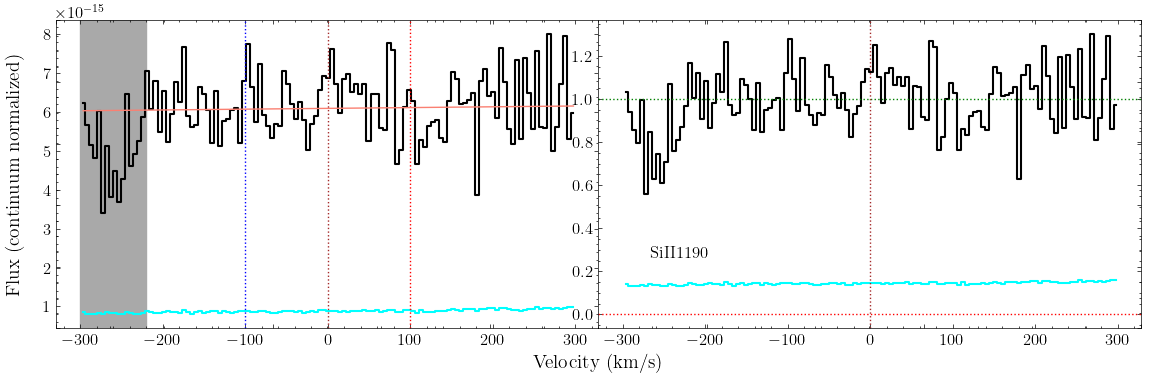

In [539]:
fig, ax = siii_1190_stis.plot_ion_transition_spec_cont()

In [540]:
siii_1190_stis.grab_ion_transition_lsf(lsf_fits_list)

In [541]:
siii_1190_stis.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c1_logT', 'it1c1_b_NT')

b_T, 1sig: 4.2, -0.4, +0.4
b_T, 3sig: <5.3
b, 1sig: 14.8, -0.8, +0.8


(array([   700.,  16267., 123899., 397057., 626466., 474013., 189511.,
         51662.,  18936.,   1489.]),
 array([11.77326587, 12.43075932, 13.08825278, 13.74574623, 14.40323969,
        15.06073314, 15.71822659, 16.37572005, 17.0332135 , 17.69070696,
        18.34820041]),
 <BarContainer object of 10 artists>)

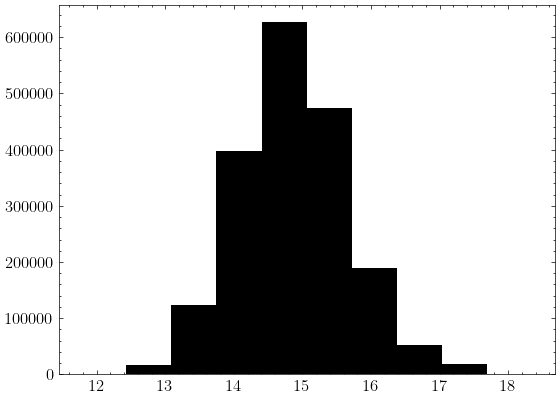

In [542]:
plt.hist(siii_1190_stis.b_dist)

In [543]:
siii_1190_stis.get_EW(np.median(siii_1190_stis.b_dist), 0)

Integration window: [-27, 27]
EW, 1sig: -10, 9
EW-3sig: 26
logN-3sig: 12.9


In [544]:
siii_1190_stis.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c2_logT', 'it1c2_b_NT')

b_T, 1sig: 4.2, -1.3, +2.1
b_T, 3sig: <22.5
b, 1sig: 9.5, -2.4, +2.8


(array([3.710890e+05, 1.248059e+06, 2.495150e+05, 9.602000e+03,
        8.235000e+03, 6.171000e+03, 3.008000e+03, 1.863000e+03,
        1.801000e+03, 6.570000e+02]),
 array([ 2.47082044,  7.44528882, 12.4197572 , 17.39422558, 22.36869396,
        27.34316234, 32.31763072, 37.2920991 , 42.26656748, 47.24103586,
        52.21550424]),
 <BarContainer object of 10 artists>)

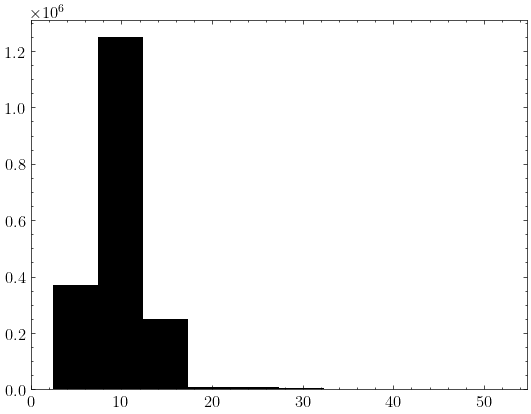

In [545]:
plt.hist(siii_1190_stis.b_dist)

In [546]:
siii_1190_stis.get_EW(np.median(siii_1190_stis.b_dist), 20.3)

Integration window: [2, 39]
EW, 1sig: -13, 7
EW-3sig: 20
logN-3sig: 12.8


In [547]:
siii_1190_stis.get_EW_total(-27,39)

Integration window: [-27, 39]
EW, 1sig: -14, 10
EW-3sig: 29


# SiIII

## SiIII 1206 (STIS)

In [548]:
siiii_1206_stis = ion_transition('SiIII', 1206, 'Si', z_sys, 'STIS')

In [549]:
siiii_1206_stis.grab_ion_transition_info()

In [550]:
siiii_1206_stis.grab_ion_transition_spec(spec_fits_list)

In [551]:
siiii_1206_stis.cont_norm_flux(v_abs_range=[-100,100], degree=1)

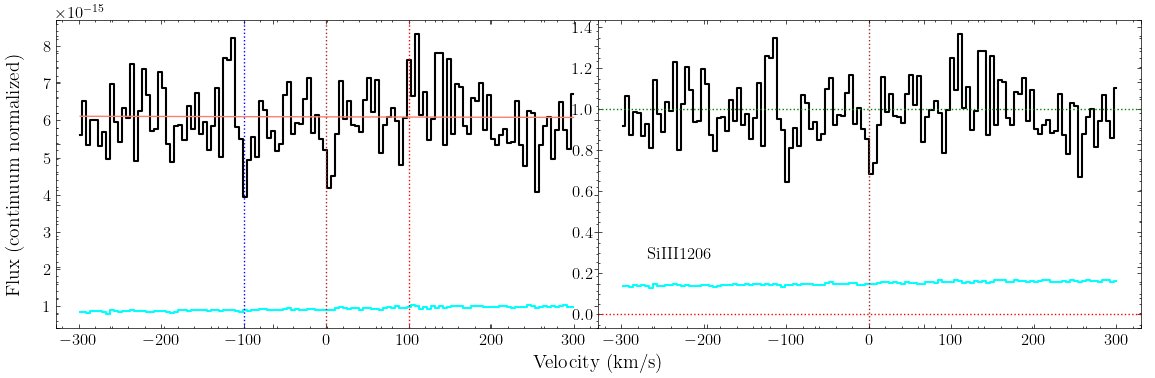

In [552]:
fig, ax = siiii_1206_stis.plot_ion_transition_spec_cont()

In [553]:
siiii_1206_stis.grab_ion_transition_lsf(lsf_fits_list)

In [554]:
siiii_1206_stis.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c1_logT', 'it1c1_b_NT')

b_T, 1sig: 4.2, -0.4, +0.4
b_T, 3sig: <5.3
b, 1sig: 14.8, -0.8, +0.8


(array([   700.,  16267., 123899., 397057., 626466., 474013., 189511.,
         51662.,  18936.,   1489.]),
 array([11.77326587, 12.43075932, 13.08825278, 13.74574623, 14.40323969,
        15.06073314, 15.71822659, 16.37572005, 17.0332135 , 17.69070696,
        18.34820041]),
 <BarContainer object of 10 artists>)

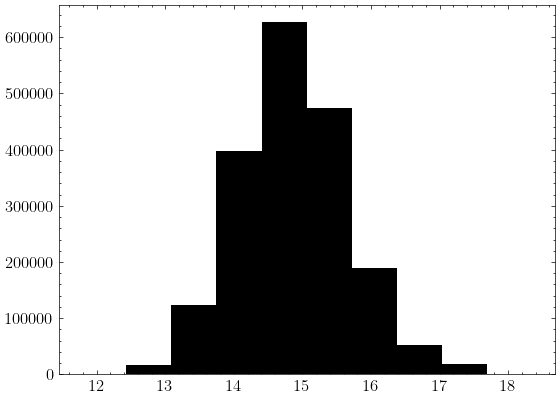

In [555]:
plt.hist(siiii_1206_stis.b_dist)

In [556]:
siiii_1206_stis.get_EW(np.median(siiii_1206_stis.b_dist), 0)

Integration window: [-25, 25]
EW, 1sig: 12, 9
EW-3sig: 26
logN-3sig: 12.1


In [557]:
siiii_1206_stis.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c2_logT', 'it1c2_b_NT')

b_T, 1sig: 4.2, -1.3, +2.1
b_T, 3sig: <22.5
b, 1sig: 9.5, -2.4, +2.8


(array([3.710890e+05, 1.248059e+06, 2.495150e+05, 9.602000e+03,
        8.235000e+03, 6.171000e+03, 3.008000e+03, 1.863000e+03,
        1.801000e+03, 6.570000e+02]),
 array([ 2.47082044,  7.44528882, 12.4197572 , 17.39422558, 22.36869396,
        27.34316234, 32.31763072, 37.2920991 , 42.26656748, 47.24103586,
        52.21550424]),
 <BarContainer object of 10 artists>)

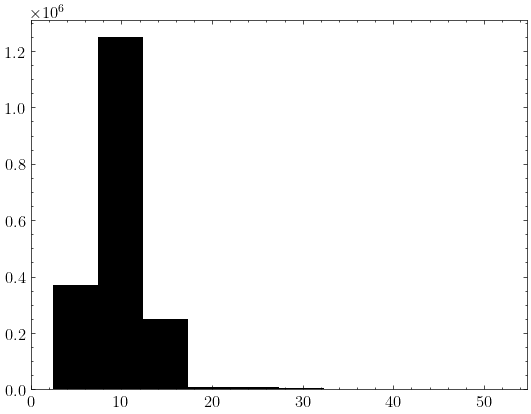

In [558]:
plt.hist(siiii_1206_stis.b_dist)

In [559]:
siiii_1206_stis.get_EW(np.median(siiii_1206_stis.b_dist), 20.3)

Integration window: [5, 36]
EW, 1sig: 2, 7
EW-3sig: 20
logN-3sig: 12.0


In [560]:
siiii_1206_stis.get_EW_total(-25,36)

Integration window: [-25, 36]
EW, 1sig: 11, 10
EW-3sig: 29


# SIV

## SIV 748

In [561]:
siv_1393_fuv = ion_transition('SIV', 748, 'S', z_sys, 'FUV')

In [562]:
siv_1393_fuv.grab_ion_transition_info()

In [563]:
siv_1393_fuv.grab_ion_transition_spec(spec_fits_list)

In [564]:
siv_1393_fuv.cont_norm_flux(v_abs_range=[-100,100], degree=1)

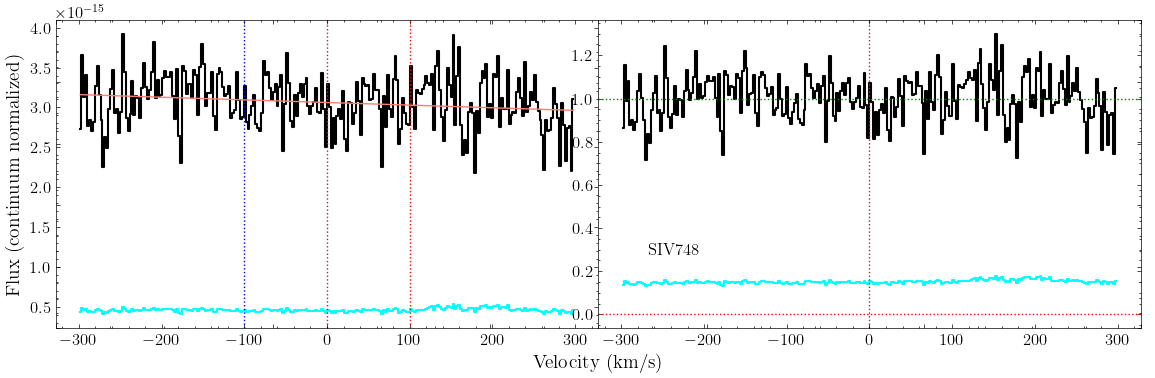

In [565]:
fig, ax = siv_1393_fuv.plot_ion_transition_spec_cont()

In [566]:
siv_1393_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [567]:
siv_1393_fuv.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c1_logT', 'it1c1_b_NT')

b_T, 1sig: 3.9, -0.3, +0.3
b_T, 3sig: <5.0
b, 1sig: 14.8, -0.8, +0.8


(array([6.07000e+02, 1.49300e+04, 1.18942e+05, 3.90348e+05, 6.28660e+05,
        4.81361e+05, 1.93008e+05, 5.20070e+04, 1.86990e+04, 1.43800e+03]),
 array([11.63592516, 12.30430126, 12.97267735, 13.64105344, 14.30942953,
        14.97780562, 15.64618171, 16.31455781, 16.9829339 , 17.65130999,
        18.31968608]),
 <BarContainer object of 10 artists>)

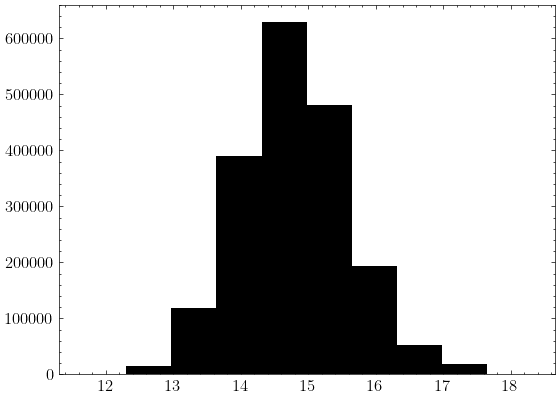

In [568]:
plt.hist(siv_1393_fuv.b_dist)

In [569]:
siv_1393_fuv.get_EW(np.median(siv_1393_fuv.b_dist), 0)

Integration window: [-33, 33]
EW, 1sig: 4, 4
EW-3sig: 13
logN-3sig: 12.8


In [570]:
siv_1393_fuv.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c2_logT', 'it1c2_b_NT')

b_T, 1sig: 3.9, -1.2, +2.0
b_T, 3sig: <21.1
b, 1sig: 9.4, -2.5, +2.8


(array([3.875750e+05, 1.216197e+06, 2.647690e+05, 1.059900e+04,
        7.463000e+03, 6.185000e+03, 2.881000e+03, 1.781000e+03,
        1.861000e+03, 6.890000e+02]),
 array([ 2.31260348,  7.26993288, 12.22726227, 17.18459167, 22.14192106,
        27.09925046, 32.05657985, 37.01390925, 41.97123864, 46.92856804,
        51.88589744]),
 <BarContainer object of 10 artists>)

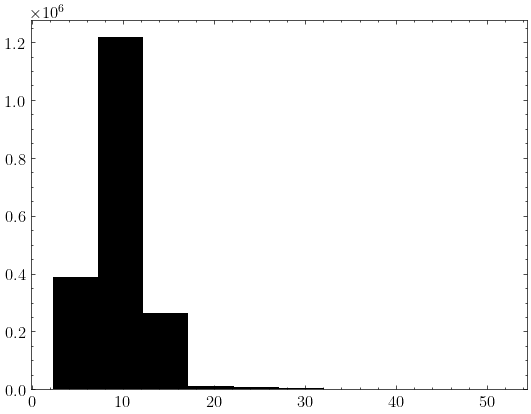

In [571]:
plt.hist(siv_1393_fuv.b_dist)

In [572]:
siv_1393_fuv.get_EW(np.median(siv_1393_fuv.b_dist), 20.3)

Integration window: [-4, 45]
EW, 1sig: 7, 4
EW-3sig: 11
logN-3sig: 12.7


In [573]:
siv_1393_fuv.get_EW_total(-33,45)

Integration window: [-33, 45]
EW, 1sig: 5, 5
EW-3sig: 15


# SV

## SV 786

In [574]:
sv_786_fuv = ion_transition('SV', 786, 'S', z_sys, 'FUV')

In [575]:
sv_786_fuv.grab_ion_transition_info()

In [576]:
sv_786_fuv.grab_ion_transition_spec(spec_fits_list)

In [577]:
sv_786_fuv.cont_norm_flux(v_abs_range=[-100,100], degree=1)

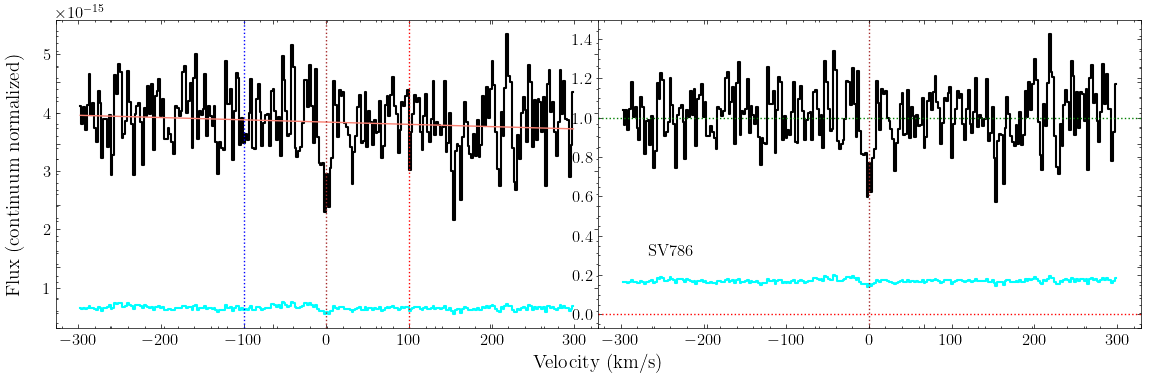

In [578]:
fig, ax = sv_786_fuv.plot_ion_transition_spec_cont()

In [579]:
sv_786_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [580]:
sv_786_fuv.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c1_logT', 'it1c1_b_NT')

b_T, 1sig: 3.9, -0.3, +0.3
b_T, 3sig: <5.0
b, 1sig: 14.8, -0.8, +0.8


(array([6.07000e+02, 1.49300e+04, 1.18942e+05, 3.90348e+05, 6.28660e+05,
        4.81361e+05, 1.93008e+05, 5.20070e+04, 1.86990e+04, 1.43800e+03]),
 array([11.63592516, 12.30430126, 12.97267735, 13.64105344, 14.30942953,
        14.97780562, 15.64618171, 16.31455781, 16.9829339 , 17.65130999,
        18.31968608]),
 <BarContainer object of 10 artists>)

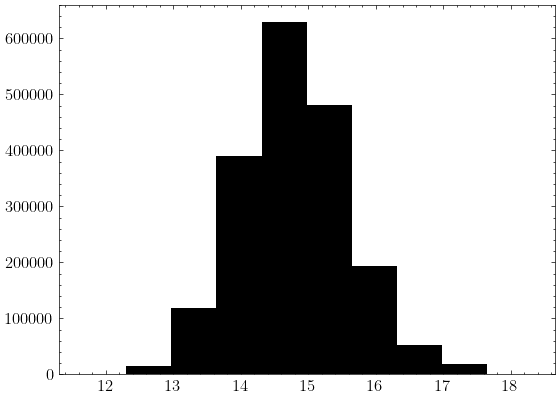

In [581]:
plt.hist(sv_786_fuv.b_dist)

In [582]:
sv_786_fuv.get_EW(np.median(sv_786_fuv.b_dist), 0)

Integration window: [-32, 32]
EW, 1sig: 5, 5
EW-3sig: 16
logN-3sig: 12.4


In [583]:
sv_786_fuv.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c2_logT', 'it1c2_b_NT')

b_T, 1sig: 3.9, -1.2, +2.0
b_T, 3sig: <21.1
b, 1sig: 9.4, -2.5, +2.8


(array([3.875750e+05, 1.216197e+06, 2.647690e+05, 1.059900e+04,
        7.463000e+03, 6.185000e+03, 2.881000e+03, 1.781000e+03,
        1.861000e+03, 6.890000e+02]),
 array([ 2.31260348,  7.26993288, 12.22726227, 17.18459167, 22.14192106,
        27.09925046, 32.05657985, 37.01390925, 41.97123864, 46.92856804,
        51.88589744]),
 <BarContainer object of 10 artists>)

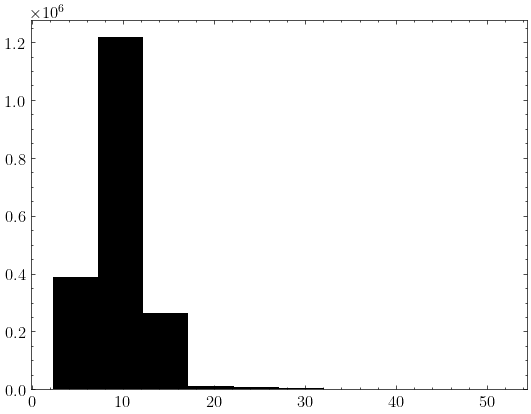

In [584]:
plt.hist(sv_786_fuv.b_dist)

In [585]:
sv_786_fuv.get_EW(np.median(sv_786_fuv.b_dist), 20.3)

Integration window: [-3, 44]
EW, 1sig: 7, 4
EW-3sig: 13
logN-3sig: 12.3


In [586]:
sv_786_fuv.get_EW_total(-32,44)

Integration window: [-32, 44]
EW, 1sig: 6, 6
EW-3sig: 17


# SVI

## SVI 944 (NUV)

In [587]:
svi_944_nuv = ion_transition('SVI', 944, 'S', z_sys, 'NUV')

In [588]:
svi_944_nuv.grab_ion_transition_info()

In [589]:
svi_944_nuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-260]])

In [590]:
svi_944_nuv.cont_norm_flux(v_abs_range=[-100,100], degree=1)

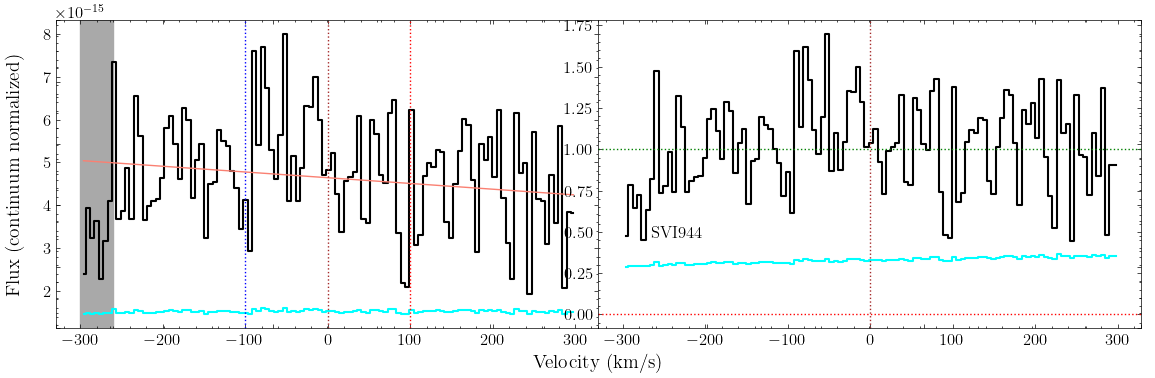

In [591]:
fig, ax = svi_944_nuv.plot_ion_transition_spec_cont()

In [592]:
svi_944_nuv.grab_ion_transition_lsf(lsf_fits_list)

In [593]:
svi_944_nuv.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c1_logT', 'it1c1_b_NT')

b_T, 1sig: 3.9, -0.3, +0.3
b_T, 3sig: <5.0
b, 1sig: 14.8, -0.8, +0.8


(array([6.07000e+02, 1.49300e+04, 1.18942e+05, 3.90348e+05, 6.28660e+05,
        4.81361e+05, 1.93008e+05, 5.20070e+04, 1.86990e+04, 1.43800e+03]),
 array([11.63592516, 12.30430126, 12.97267735, 13.64105344, 14.30942953,
        14.97780562, 15.64618171, 16.31455781, 16.9829339 , 17.65130999,
        18.31968608]),
 <BarContainer object of 10 artists>)

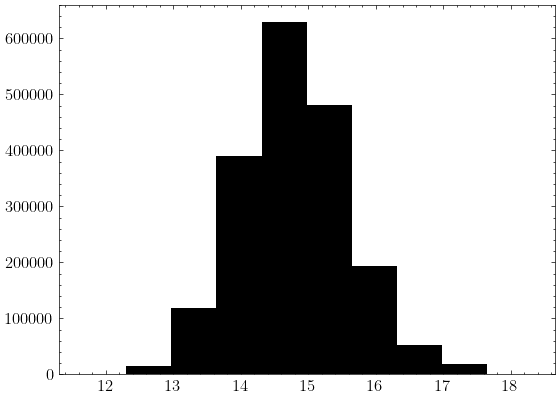

In [594]:
plt.hist(svi_944_nuv.b_dist)

In [595]:
svi_944_nuv.get_EW(np.median(svi_944_nuv.b_dist), 0)

Integration window: [-32, 32]
EW, 1sig: -23, 18
EW-3sig: 55
logN-3sig: 13.6


In [596]:
svi_944_nuv.logN_3sig

13.63607807296155

In [597]:
svi_944_nuv.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c2_logT', 'it1c2_b_NT')

b_T, 1sig: 3.9, -1.2, +2.0
b_T, 3sig: <21.1
b, 1sig: 9.4, -2.5, +2.8


(array([3.875750e+05, 1.216197e+06, 2.647690e+05, 1.059900e+04,
        7.463000e+03, 6.185000e+03, 2.881000e+03, 1.781000e+03,
        1.861000e+03, 6.890000e+02]),
 array([ 2.31260348,  7.26993288, 12.22726227, 17.18459167, 22.14192106,
        27.09925046, 32.05657985, 37.01390925, 41.97123864, 46.92856804,
        51.88589744]),
 <BarContainer object of 10 artists>)

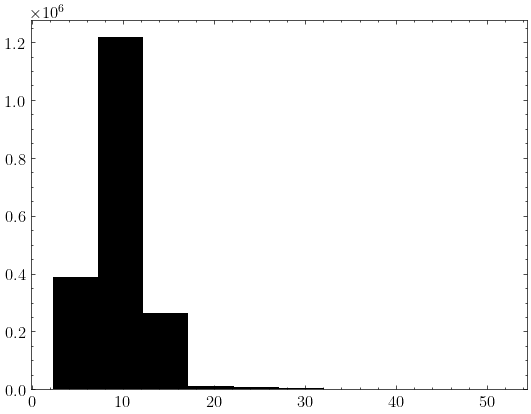

In [598]:
plt.hist(svi_944_nuv.b_dist)

In [599]:
svi_944_nuv.get_EW(np.median(svi_944_nuv.b_dist), 20.3)

Integration window: [-3, 43]
EW, 1sig: 2, 14
EW-3sig: 43
logN-3sig: 13.6


In [600]:
svi_944_nuv.logN_3sig

13.577527221947035

In [601]:
svi_944_nuv.get_EW_total(-32,43)

Integration window: [-32, 43]
EW, 1sig: -23, 20
EW-3sig: 60


# FeII

## FeII 2600 (HIRES)

In [602]:
feii_2600_hires = ion_transition('FeII', 2600, 'Fe', z_sys, 'HIRES')

In [603]:
feii_2600_hires.grab_ion_transition_info()

In [604]:
feii_2600_hires.grab_ion_transition_spec(spec_fits_list)

In [605]:
feii_2600_hires.cont_norm_flux(v_abs_range=[-100,100], degree=1)

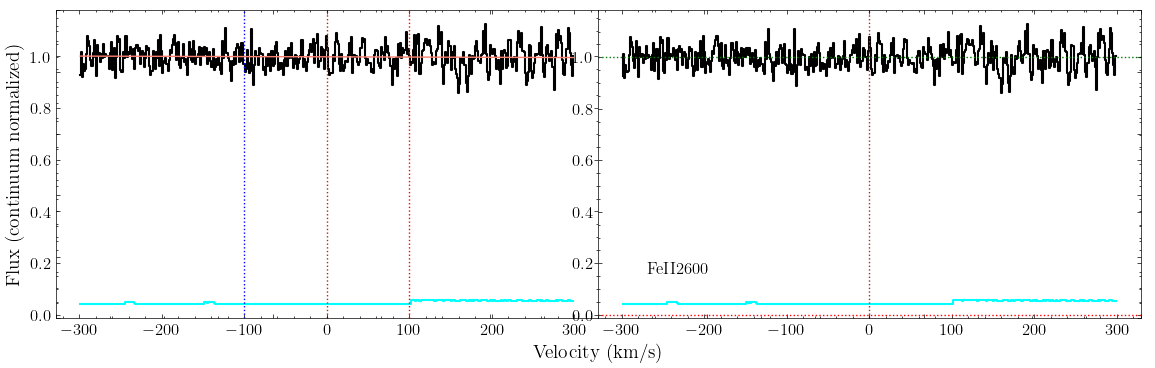

In [606]:
fig, ax = feii_2600_hires.plot_ion_transition_spec_cont()

In [607]:
feii_2600_hires.grab_ion_transition_lsf(lsf_fits_list)

In [608]:
feii_2600_hires.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c1_logT', 'it1c1_b_NT')

b_T, 1sig: 3.0, -0.3, +0.3
b_T, 3sig: <3.8
b, 1sig: 14.5, -0.8, +0.8


(array([3.77000e+02, 1.08210e+04, 9.99030e+04, 3.62707e+05, 6.31295e+05,
        5.11655e+05, 2.08793e+05, 5.48310e+04, 1.84630e+04, 1.15500e+03]),
 array([11.18254845, 11.88765302, 12.5927576 , 13.29786217, 14.00296675,
        14.70807132, 15.4131759 , 16.11828047, 16.82338505, 17.52848962,
        18.2335942 ]),
 <BarContainer object of 10 artists>)

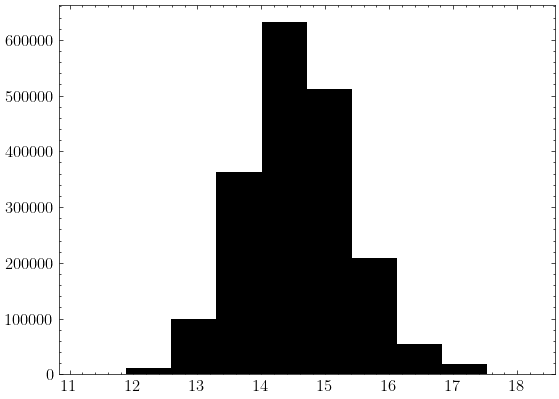

In [609]:
plt.hist(feii_2600_hires.b_dist)

(array([3.10000e+02, 5.09400e+03, 4.83550e+04, 2.61433e+05, 6.31523e+05,
        6.28644e+05, 2.69986e+05, 4.97860e+04, 4.56500e+03, 3.04000e+02]),
 array([1.72762465, 1.97423937, 2.22085408, 2.4674688 , 2.71408352,
        2.96069824, 3.20731296, 3.45392767, 3.70054239, 3.94715711,
        4.19377183]),
 <BarContainer object of 10 artists>)

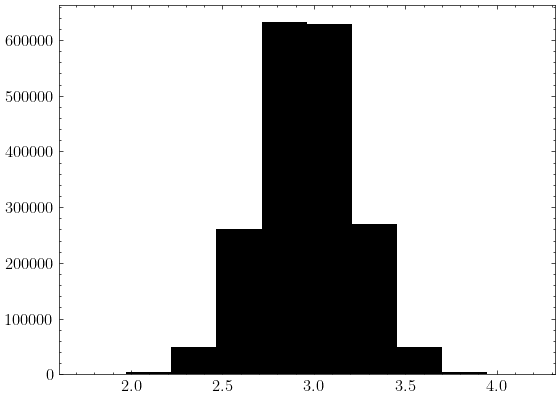

In [610]:
plt.hist(feii_2600_hires.b_T_dist)

In [611]:
feii_2600_hires.get_EW(np.median(feii_2600_hires.b_dist), 0)

Integration window: [-24, 24]
EW, 1sig: -2, 3
EW-3sig: 9
logN-3sig: 11.8


In [612]:
feii_2600_hires.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c2_logT', 'it1c2_b_NT')

b_T, 1sig: 3.0, -0.9, +1.5
b_T, 3sig: <16.0
b, 1sig: 9.0, -3.0, +3.0


(array([4.377260e+05, 1.107027e+06, 3.233940e+05, 1.410400e+04,
        4.417000e+03, 6.469000e+03, 2.370000e+03, 1.635000e+03,
        1.930000e+03, 9.280000e+02]),
 array([ 1.75221347,  6.66508809, 11.57796271, 16.49083733, 21.40371196,
        26.31658658, 31.2294612 , 36.14233583, 41.05521045, 45.96808507,
        50.88095969]),
 <BarContainer object of 10 artists>)

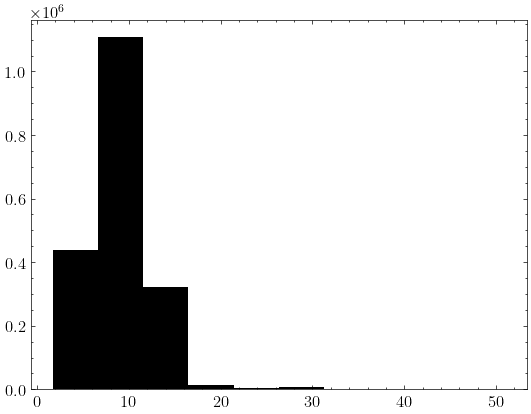

In [613]:
plt.hist(feii_2600_hires.b_dist)

(array([1118266.,  583266.,  165970.,   16104.,    3402.,    2273.,
           2581.,    2232.,    2842.,    3064.]),
 array([ 1.72558157,  3.27751099,  4.8294404 ,  6.38136982,  7.93329924,
         9.48522866, 11.03715807, 12.58908749, 14.14101691, 15.69294632,
        17.24487574]),
 <BarContainer object of 10 artists>)

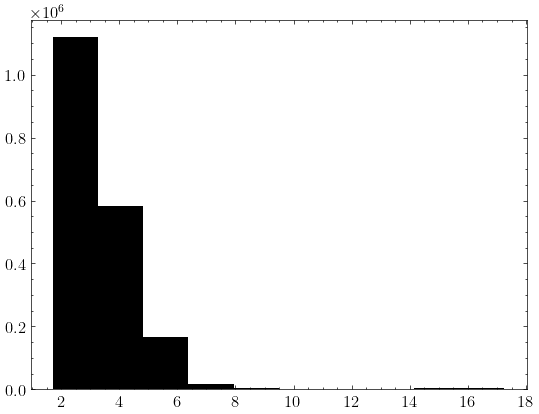

In [614]:
plt.hist(feii_2600_hires.b_T_dist)

In [615]:
feii_2600_hires.get_EW(np.median(feii_2600_hires.b_dist), 20.3)

Integration window: [5, 35]
EW, 1sig: -1, 2
EW-3sig: 7
logN-3sig: 11.7


In [616]:
feii_2600_hires.get_EW_total(-24,35)

Integration window: [-24, 35]
EW, 1sig: -3, 3
EW-3sig: 10


## FeII 2382 (HIRES)

In [634]:
feii_2382_hires = ion_transition('FeII', 2382, 'Fe', z_sys, 'HIRES')

In [635]:
feii_2382_hires.grab_ion_transition_info()

In [636]:
feii_2382_hires.grab_ion_transition_spec(spec_fits_list)

In [637]:
feii_2382_hires.cont_norm_flux(v_abs_range=[-100,100], degree=1)

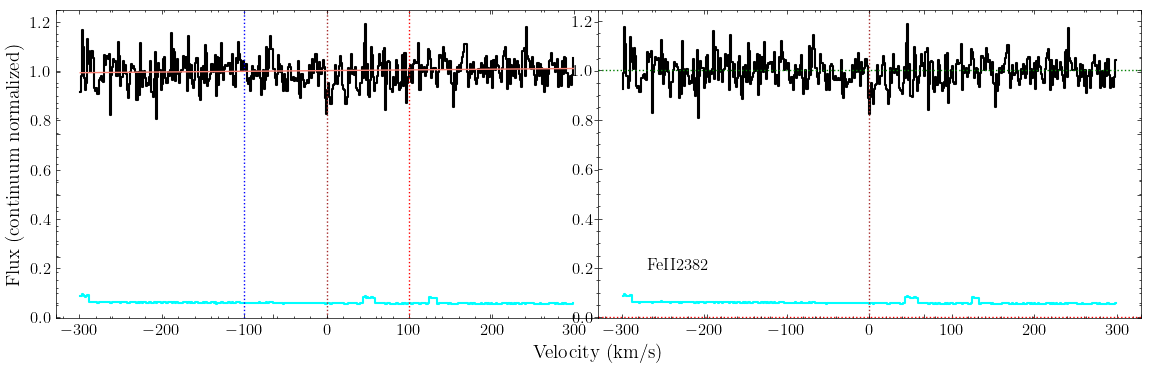

In [638]:
fig, ax = feii_2382_hires.plot_ion_transition_spec_cont()

In [639]:
feii_2382_hires.grab_ion_transition_lsf(lsf_fits_list)

In [640]:
feii_2382_hires.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c1_logT', 'it1c1_b_NT')

b_T, 1sig: 3.0, -0.3, +0.3
b, 1sig: 14.5, -0.8, +0.8


(array([3.77000e+02, 1.08210e+04, 9.99030e+04, 3.62707e+05, 6.31295e+05,
        5.11655e+05, 2.08793e+05, 5.48310e+04, 1.84630e+04, 1.15500e+03]),
 array([11.18254845, 11.88765302, 12.5927576 , 13.29786217, 14.00296675,
        14.70807132, 15.4131759 , 16.11828047, 16.82338505, 17.52848962,
        18.2335942 ]),
 <BarContainer object of 10 artists>)

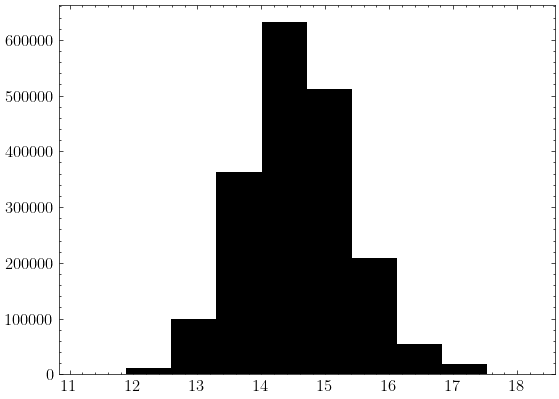

In [641]:
plt.hist(feii_2382_hires.b_dist)

In [642]:
feii_2382_hires.get_EW(np.median(feii_2382_hires.b_dist), 0)

Integration window: [-24, 24]
EW, 1sig: 10, 4
EW-3sig: 11
logN-3sig: 11.8


In [643]:
feii_2382_hires.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c2_logT', 'it1c2_b_NT')

b_T, 1sig: 3.0, -0.9, +1.5
b, 1sig: 9.0, -3.0, +3.0


(array([4.377260e+05, 1.107027e+06, 3.233940e+05, 1.410400e+04,
        4.417000e+03, 6.469000e+03, 2.370000e+03, 1.635000e+03,
        1.930000e+03, 9.280000e+02]),
 array([ 1.75221347,  6.66508809, 11.57796271, 16.49083733, 21.40371196,
        26.31658658, 31.2294612 , 36.14233583, 41.05521045, 45.96808507,
        50.88095969]),
 <BarContainer object of 10 artists>)

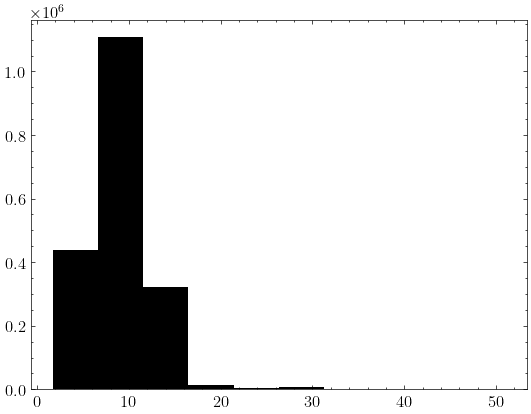

In [644]:
plt.hist(feii_2382_hires.b_dist)

In [645]:
feii_2382_hires.get_EW(np.median(feii_2382_hires.b_dist), 20.3)

Integration window: [5, 35]
EW, 1sig: 7, 3
EW-3sig: 8
logN-3sig: 11.7


In [646]:
feii_2382_hires.get_EW_total(-24,35)

Integration window: [-24, 35]
EW, 1sig: 13, 4
EW-3sig: 12


## FeII 2344 (HIRES)

In [647]:
feii_2344_hires = ion_transition('FeII', 2344, 'Fe', z_sys, 'HIRES')

In [648]:
feii_2344_hires.grab_ion_transition_info()

In [649]:
feii_2344_hires.grab_ion_transition_spec(spec_fits_list)

In [650]:
feii_2344_hires.cont_norm_flux(v_abs_range=[-100,100], degree=1)

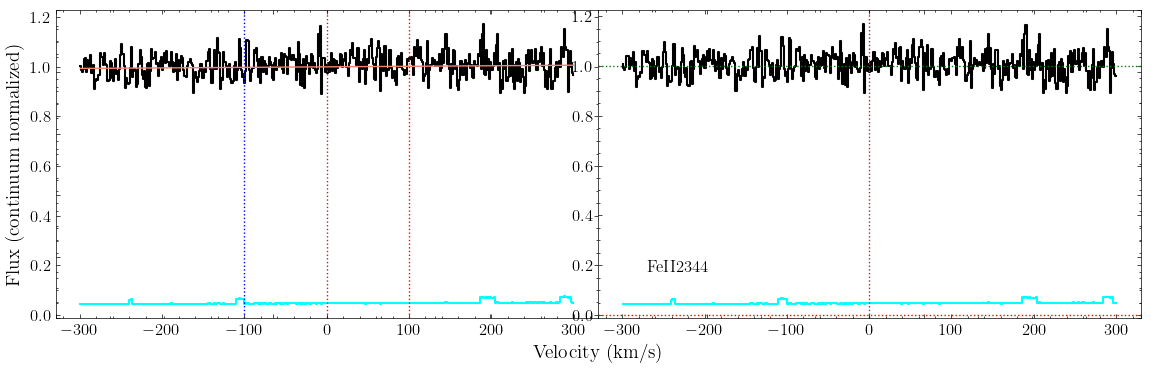

In [651]:
fig, ax = feii_2344_hires.plot_ion_transition_spec_cont()

In [652]:
feii_2344_hires.grab_ion_transition_lsf(lsf_fits_list)

In [653]:
feii_2344_hires.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c1_logT', 'it1c1_b_NT')

b_T, 1sig: 3.0, -0.3, +0.3
b, 1sig: 14.5, -0.8, +0.8


(array([3.77000e+02, 1.08210e+04, 9.99030e+04, 3.62707e+05, 6.31295e+05,
        5.11655e+05, 2.08793e+05, 5.48310e+04, 1.84630e+04, 1.15500e+03]),
 array([11.18254845, 11.88765302, 12.5927576 , 13.29786217, 14.00296675,
        14.70807132, 15.4131759 , 16.11828047, 16.82338505, 17.52848962,
        18.2335942 ]),
 <BarContainer object of 10 artists>)

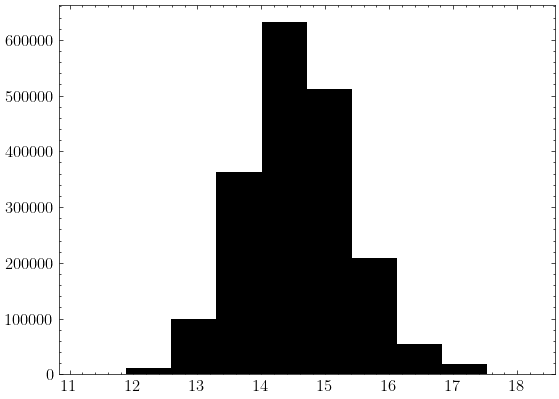

In [654]:
plt.hist(feii_2344_hires.b_dist)

In [655]:
feii_2344_hires.get_EW(np.median(feii_2344_hires.b_dist), 0)

Integration window: [-24, 24]
EW, 1sig: -7, 3
EW-3sig: 9
logN-3sig: 12.2


In [656]:
feii_2344_hires.gen_b_dist(hi_ciii_civ_niv_oiii_oiv_TNT, 'it1c2_logT', 'it1c2_b_NT')

b_T, 1sig: 3.0, -0.9, +1.5
b, 1sig: 9.0, -3.0, +3.0


(array([4.377260e+05, 1.107027e+06, 3.233940e+05, 1.410400e+04,
        4.417000e+03, 6.469000e+03, 2.370000e+03, 1.635000e+03,
        1.930000e+03, 9.280000e+02]),
 array([ 1.75221347,  6.66508809, 11.57796271, 16.49083733, 21.40371196,
        26.31658658, 31.2294612 , 36.14233583, 41.05521045, 45.96808507,
        50.88095969]),
 <BarContainer object of 10 artists>)

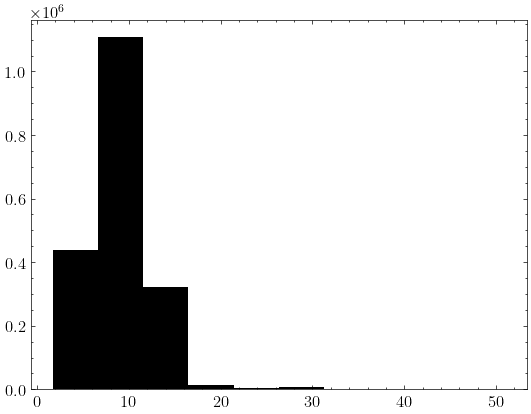

In [657]:
plt.hist(feii_2344_hires.b_dist)

In [658]:
feii_2344_hires.get_EW(np.median(feii_2344_hires.b_dist), 20.3)

Integration window: [5, 35]
EW, 1sig: -5, 2
EW-3sig: 7
logN-3sig: 12.1


In [659]:
feii_2344_hires.get_EW_total(-24,35)

Integration window: [-24, 35]
EW, 1sig: -9, 3
EW-3sig: 9
